# Netflix Dataset Analysis - Comprehensive Report

## Problem Statement
**Content Trends Analysis for Strategic Recommendations**

This analysis aims to uncover how Netflix's content distribution (Movies vs. TV Shows, genres, and country contributions) has evolved over the years. The goal is to identify key genres, audience preferences, and strategic insights into global content expansion.

## Objectives
1. Analyze the distribution of Movies vs. TV Shows over the years
2. Identify the most common genres and how their popularity has changed
3. Compare country-wise contributions to Netflix's catalog
4. Provide strategic recommendations for future content strategy

## 1. Data Loading and Initial Setup

In [100]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Configure visualization settings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Libraries imported successfully!
Analysis Date: 2025-10-21 10:34:59


In [101]:
# Load the Netflix dataset
df = pd.read_csv('Netflix_Dataset.csv')

print("="*70)
print("NETFLIX DATASET LOADED SUCCESSFULLY")
print("="*70)
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nFirst 5 rows of the dataset:")
df.head()

NETFLIX DATASET LOADED SUCCESSFULLY

Dataset Shape: 7789 rows × 11 columns

First 5 rows of the dataset:


Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [102]:
# Rename columns to match analysis expectations
column_mapping = {
    'Category': 'type',
    'Type': 'listed_in',
    'Release_Date': 'date_added',
    'Country': 'country',
    'Director': 'director',
    'Cast': 'cast',
    'Rating': 'rating',
    'Duration': 'duration',
    'Title': 'title',
    'Show_Id': 'show_id',
    'Description': 'description'
}

df = df.rename(columns=column_mapping)

print("✓ Columns renamed successfully!")
print("\nNew column names:")
print(df.columns.tolist())

✓ Columns renamed successfully!

New column names:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


## 2. Dataset Structure and Overview

In [103]:
# Detailed dataset information
print("="*70)
print("DATASET STRUCTURE ANALYSIS")
print("="*70)

print("\n1. COLUMN INFORMATION:")
print("-" * 70)
df.info()

print("\n\n2. COLUMN NAMES:")
print("-" * 70)
print(df.columns.tolist())

print("\n\n3. DATA TYPES:")
print("-" * 70)
print(df.dtypes)

print("\n\n4. DATASET DIMENSIONS:")
print("-" * 70)
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
print(f"Total Cells: {df.shape[0] * df.shape[1]}")

DATASET STRUCTURE ANALYSIS

1. COLUMN INFORMATION:
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   show_id      7789 non-null   object
 1   type         7789 non-null   object
 2   title        7789 non-null   object
 3   director     5401 non-null   object
 4   cast         7071 non-null   object
 5   country      7282 non-null   object
 6   date_added   7779 non-null   object
 7   rating       7782 non-null   object
 8   duration     7789 non-null   object
 9   listed_in    7789 non-null   object
 10  description  7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


2. COLUMN NAMES:
----------------------------------------------------------------------
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_i

In [104]:
# Statistical summary
print("="*70)
print("STATISTICAL SUMMARY")
print("="*70)

print("\n1. NUMERICAL FEATURES:")
print("-" * 70)
print(df.describe())

print("\n\n2. CATEGORICAL FEATURES:")
print("-" * 70)
print(df.describe(include=['object']))

STATISTICAL SUMMARY

1. NUMERICAL FEATURES:
----------------------------------------------------------------------
       show_id   type     title                director                cast  \
count     7789   7789      7789                    5401                7071   
unique    7787      2      7787                    4050                6831   
top       s684  Movie  Backfire  Raúl Campos, Jan Suter  David Attenborough   
freq         2   5379         2                      18                  18   

              country       date_added rating  duration      listed_in  \
count            7282             7779   7782      7789           7789   
unique            681             1565     14       216            492   
top     United States  January 1, 2020  TV-MA  1 Season  Documentaries   
freq             2556              118   2865      1608            334   

                                              description  
count                                                7789 

## 3. Data Quality Assessment

In [105]:
# Missing values analysis
print("="*70)
print("MISSING VALUES ANALYSIS")
print("="*70)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("\nMissing Values Summary:")
print("-" * 70)
print(missing_df.to_string(index=False))

print("\n\nTotal Missing Values:", df.isnull().sum().sum())
print(f"Percentage of Data Missing: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

MISSING VALUES ANALYSIS

Missing Values Summary:
----------------------------------------------------------------------
    Column  Missing_Count  Missing_Percentage
  director           2388           30.658621
      cast            718            9.218128
   country            507            6.509180
date_added             10            0.128386
    rating              7            0.089870


Total Missing Values: 3630
Percentage of Data Missing: 4.24%


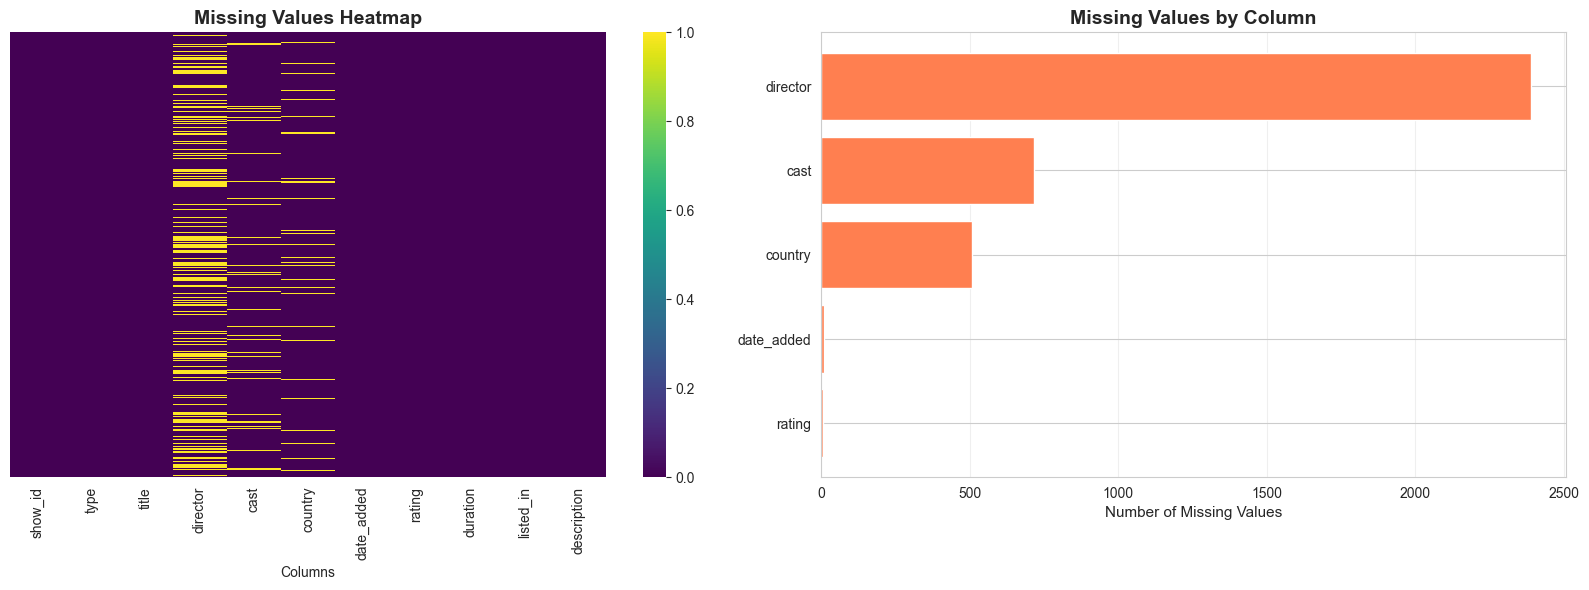

In [106]:
# Visualize missing values with heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap of missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[0])
axes[0].set_title('Missing Values Heatmap', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Columns')

# Bar plot of missing values
missing_plot_df = missing_df.sort_values('Missing_Count', ascending=True)
axes[1].barh(missing_plot_df['Column'], missing_plot_df['Missing_Count'], color='coral')
axes[1].set_xlabel('Number of Missing Values', fontsize=11)
axes[1].set_title('Missing Values by Column', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [107]:
# Check for duplicate entries
print("="*70)
print("DUPLICATE ENTRIES ANALYSIS")
print("="*70)

duplicates = df.duplicated().sum()
print(f"\nTotal Duplicate Rows: {duplicates}")
print(f"Percentage of Duplicates: {(duplicates/len(df))*100:.2f}%")

if duplicates > 0:
    print("\nDuplicate entries found:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("\n✓ No duplicate entries found in the dataset")

DUPLICATE ENTRIES ANALYSIS

Total Duplicate Rows: 2
Percentage of Duplicates: 0.03%

Duplicate entries found:
     show_id   type              title        director  \
683     s684  Movie           Backfire     Dave Patten   
4839   s6621  Movie  The Lost Okoroshi  Abba T. Makama   
6300    s684  Movie           Backfire     Dave Patten   
6622   s6621  Movie  The Lost Okoroshi  Abba T. Makama   

                                                   cast        country  \
683   Black Deniro, Byron "Squally" Vinson, Dominic ...  United States   
4839  Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...        Nigeria   
6300  Black Deniro, Byron "Squally" Vinson, Dominic ...  United States   
6622  Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...        Nigeria   

             date_added rating duration  \
683       April 5, 2019  TV-MA   97 min   
4839  September 4, 2020  TV-MA   94 min   
6300      April 5, 2019  TV-MA   97 min   
6622  September 4, 2020  TV-MA   94 min   

            

## 4. Content Type Distribution (Movies vs TV Shows)

CONTENT TYPE DISTRIBUTION

 Content Type  Count  Percentage
       Movie   5379   69.058929
     TV Show   2410   30.941071


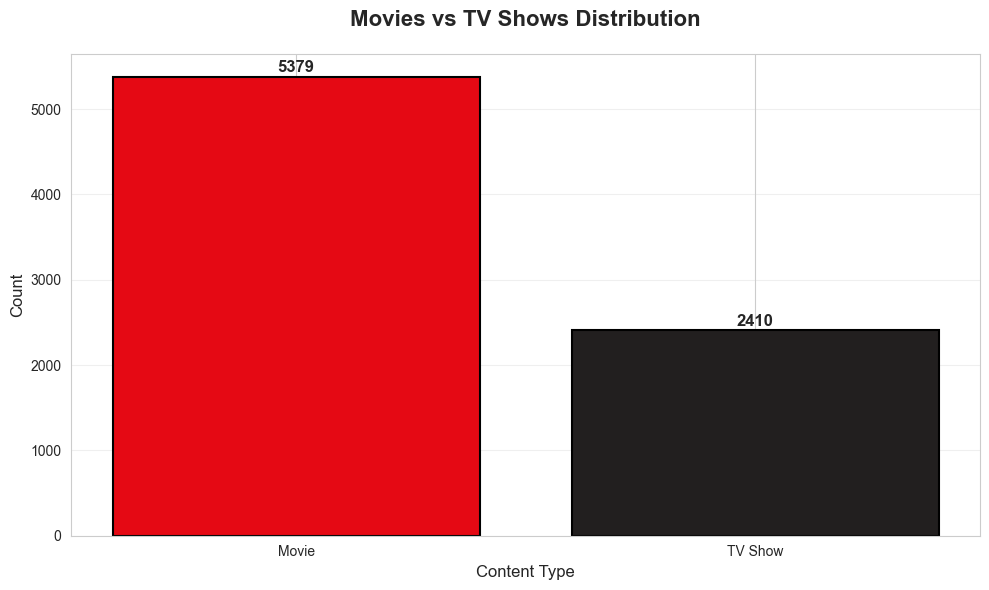

In [108]:
# Overall distribution of Movies vs TV Shows
print("="*70)
print("CONTENT TYPE DISTRIBUTION")
print("="*70)

content_counts = df['type'].value_counts()
content_percentage = df['type'].value_counts(normalize=True) * 100

content_summary = pd.DataFrame({
    'Content Type': content_counts.index,
    'Count': content_counts.values,
    'Percentage': content_percentage.values
})

print("\n", content_summary.to_string(index=False))

# Visualization 1: Bar chart
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.bar(content_counts.index, content_counts.values, color=['#E50914', '#221F1F'], edgecolor='black', linewidth=1.5)
ax.set_title('Movies vs TV Shows Distribution', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Content Type', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(content_counts.values):
    ax.text(i, v + 50, str(v), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 📊 Key Findings: Content Type Distribution

**Main Insights:**
- **Movies dominate** Netflix's catalog with **5,379 titles (69.1%)**, significantly outnumbering TV Shows
- **TV Shows** account for **2,410 titles (30.9%)** of the total content
- The **2:1 ratio** of Movies to TV Shows indicates Netflix's historical focus on film content

**Strategic Implications:**
- Despite having fewer TV Shows, they typically generate higher engagement due to multi-episode consumption patterns
- This distribution suggests an opportunity to expand TV Show offerings to balance the catalog
- Movie-heavy strategy may appeal to casual viewers seeking quick, standalone entertainment

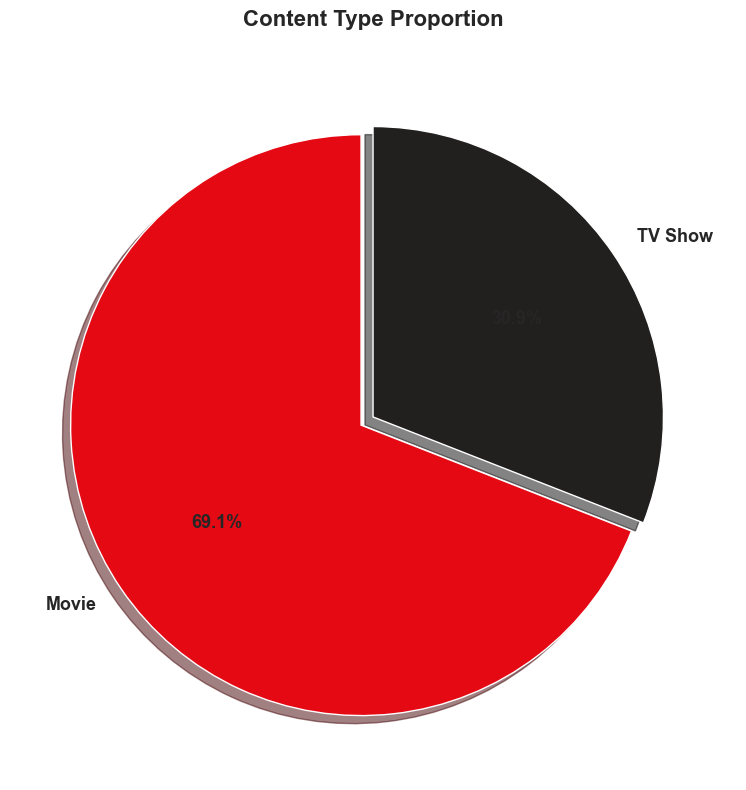

In [109]:
# Visualization 2: Pie chart
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

colors = ['#E50914', '#221F1F']
explode = (0.05, 0)
ax.pie(content_counts.values, labels=content_counts.index, autopct='%1.1f%%', 
       startangle=90, colors=colors, explode=explode, shadow=True, 
       textprops={'fontsize':13, 'fontweight': 'bold'})
ax.set_title('Content Type Proportion', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

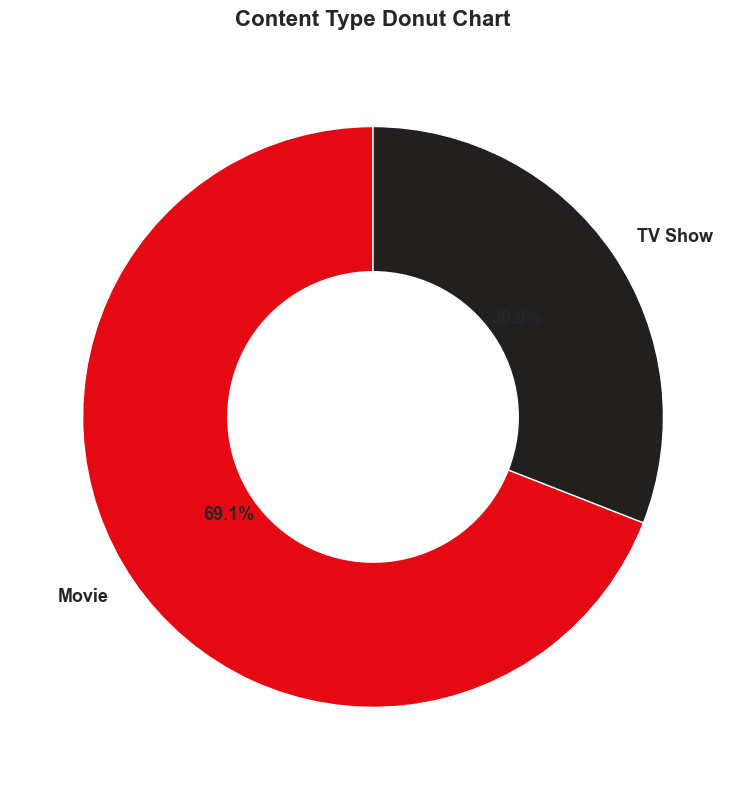

In [110]:
# Visualization 3: Donut chart
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

colors = ['#E50914', '#221F1F']
ax.pie(content_counts.values, labels=content_counts.index, autopct='%1.1f%%', 
       startangle=90, colors=colors, wedgeprops=dict(width=0.5), 
       textprops={'fontsize': 13, 'fontweight': 'bold'})
ax.set_title('Content Type Donut Chart', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

## 5. Temporal Analysis - Content Trends Over Years

In [111]:
# Extract year from date_added column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Note: This dataset doesn't have release_year, only date_added
# We'll use year_added as the primary temporal dimension

print("="*70)
print("TEMPORAL DATA EXTRACTION")
print("="*70)
print("\n✓ Year and month extracted from date_added column")
print("\nSample of temporal data:")
print(df[['title', 'date_added', 'year_added', 'month_added']].head(10))

TEMPORAL DATA EXTRACTION

✓ Year and month extracted from date_added column

Sample of temporal data:
   title date_added  year_added  month_added
0     3% 2020-08-14      2020.0          8.0
1  07:19 2016-12-23      2016.0         12.0
2  23:59 2018-12-20      2018.0         12.0
3      9 2017-11-16      2017.0         11.0
4     21 2020-01-01      2020.0          1.0
5     46 2017-07-01      2017.0          7.0
6    122 2020-06-01      2020.0          6.0
7    187 2019-11-01      2019.0         11.0
8    706 2019-04-01      2019.0          4.0
9   1920 2017-12-15      2017.0         12.0


YEAR-WISE CONTENT ADDITION (2008-2021)

             Count
year_added       
2008.0          2
2009.0          2
2010.0          1
2011.0         13
2012.0          3
2013.0         10
2014.0         24
2015.0         79
2016.0        432
2017.0       1201
2018.0       1661
2019.0       2137
2020.0       2009
2021.0        117

🔥 Peak Year: 2019 with 2137 titles added


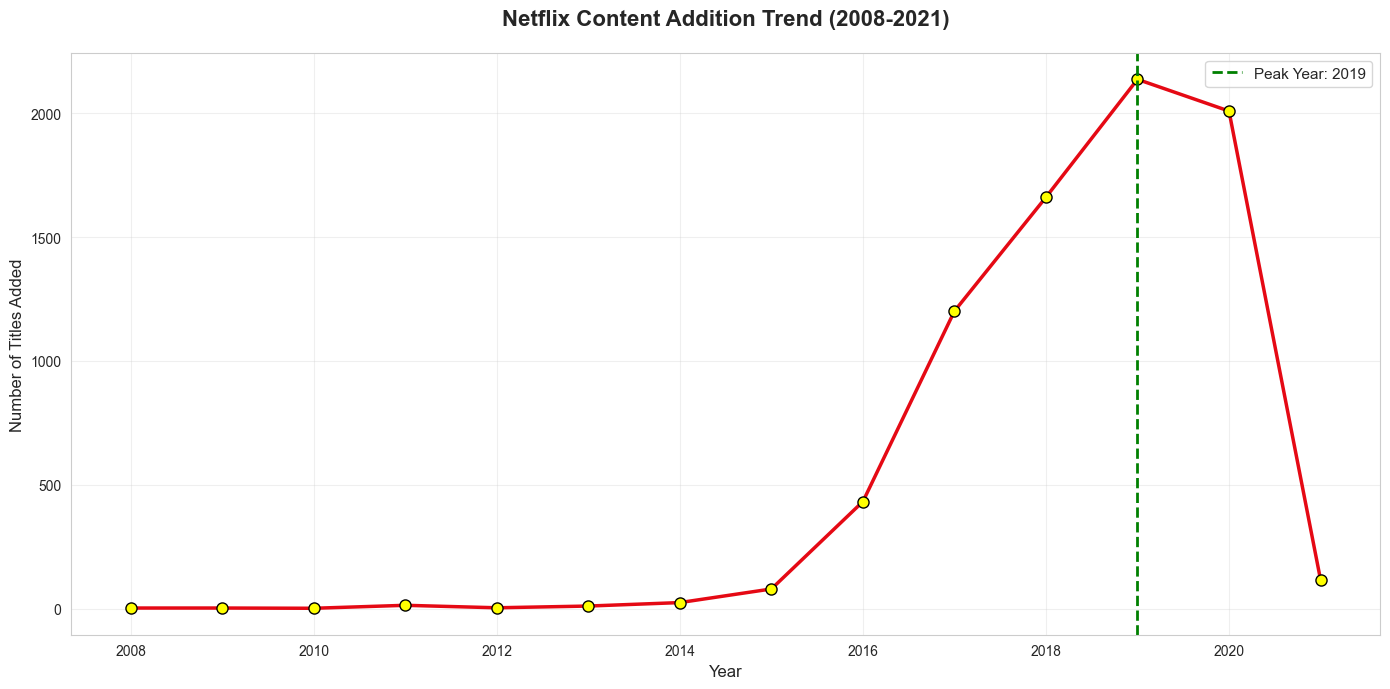

In [112]:
# Year-wise content addition trends
yearly_content = df.groupby('year_added').size().sort_index()

print("="*70)
print("YEAR-WISE CONTENT ADDITION (2008-2021)")
print("="*70)
print("\n", yearly_content.to_frame('Count'))

# Find peak year
peak_year = yearly_content.idxmax()
peak_count = yearly_content.max()
print(f"\n🔥 Peak Year: {int(peak_year)} with {peak_count} titles added")

# Visualization 1: Line plot with peak marker
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.plot(yearly_content.index, yearly_content.values, marker='o', linewidth=2.5, 
        color='#E50914', markersize=8, markerfacecolor='yellow', markeredgecolor='black')
ax.set_title('Netflix Content Addition Trend (2008-2021)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Titles Added', fontsize=12)
ax.grid(True, alpha=0.3)
ax.axvline(x=peak_year, color='green', linestyle='--', linewidth=2, label=f'Peak Year: {int(peak_year)}')
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

### 📈 Key Findings: Netflix Growth Trajectory

**Explosive Growth Phase (2015-2019):**
- Content library grew from **79 titles in 2015** to **2,137 titles in 2019**
- Represents a **2,600% increase** in just 4 years
- **2019 was the peak year** with maximum content additions

**Market Expansion Era:**
- Slow start (2008-2014): Less than 50 titles added annually
- Aggressive expansion (2016-2019): Average of 1,500+ titles per year
- Post-peak adjustment (2020-2021): Decline to ~2,000 titles in 2020 and 117 in 2021

**Strategic Insights:**
- The 2015-2019 surge aligns with Netflix's global expansion strategy
- 2020 decline likely reflects COVID-19 impact on content production
- 2021 data appears incomplete (only 117 titles suggests partial year data)

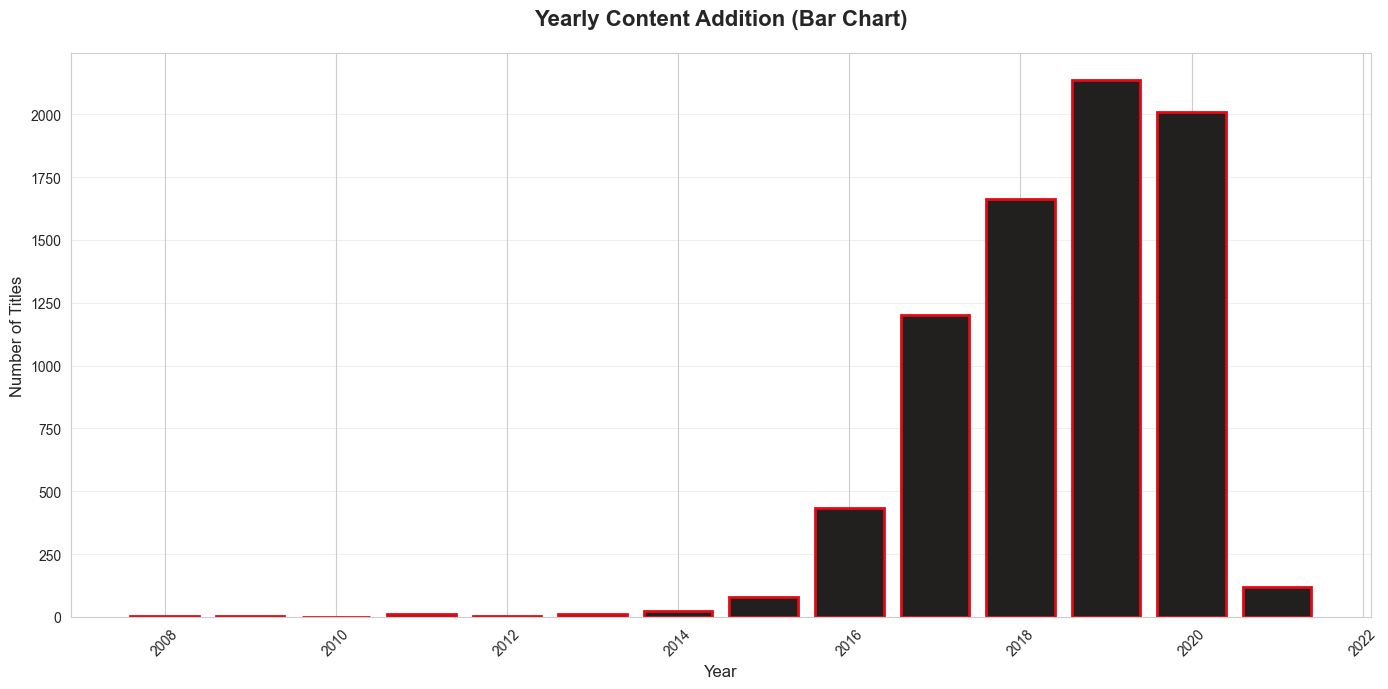

In [113]:
# Visualization 2: Bar chart
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.bar(yearly_content.index, yearly_content.values, color='#221F1F', edgecolor='#E50914', linewidth=2)
ax.set_title('Yearly Content Addition (Bar Chart)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Titles', fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

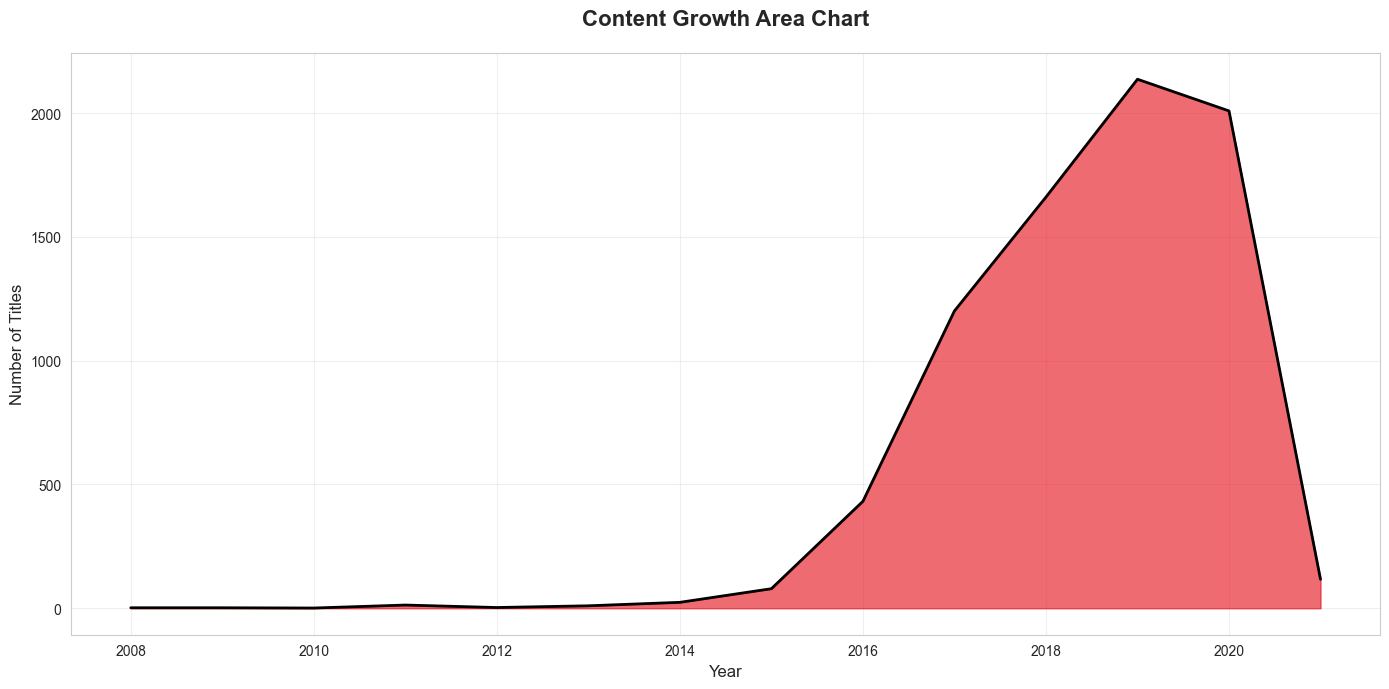

In [114]:
# Visualization 3: Area plot showing growth momentum
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.fill_between(yearly_content.index, yearly_content.values, color='#E50914', alpha=0.6)
ax.plot(yearly_content.index, yearly_content.values, color='black', linewidth=2)
ax.set_title('Content Growth Area Chart', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Titles', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

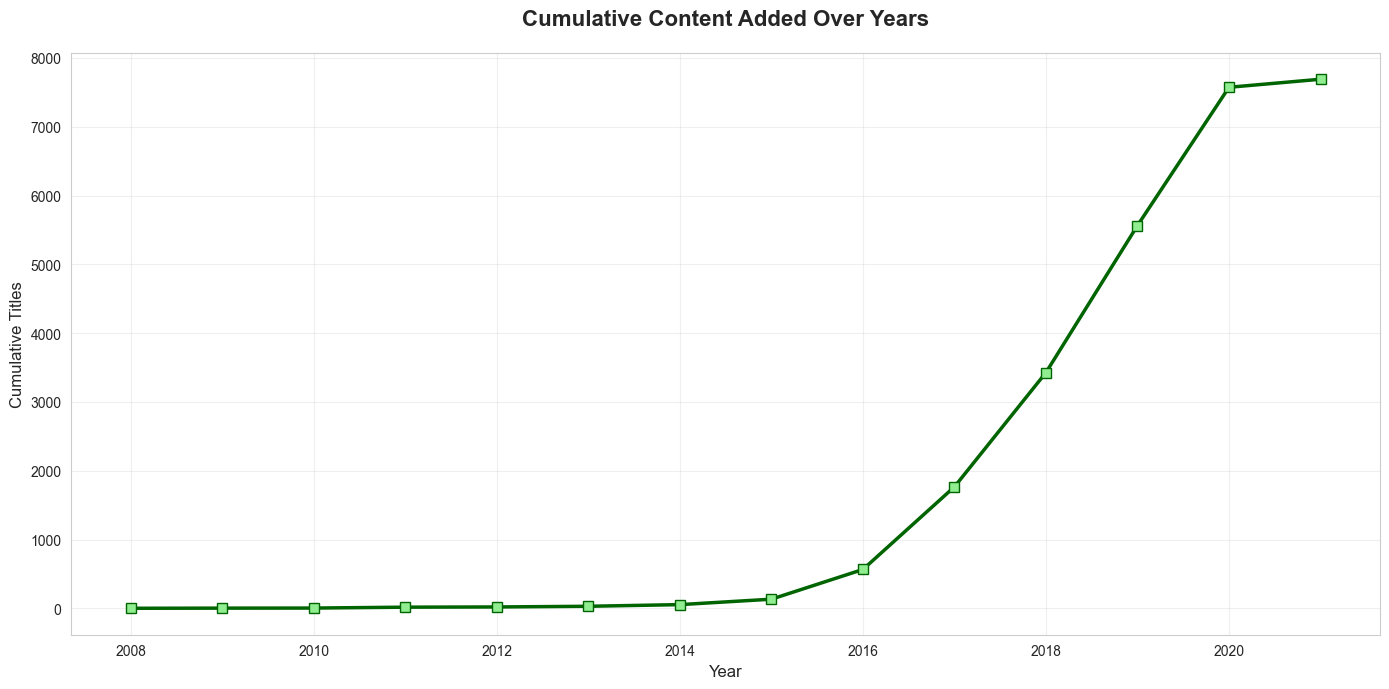

In [115]:
# Visualization 4: Cumulative content growth
cumulative = yearly_content.cumsum()
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.plot(cumulative.index, cumulative.values, marker='s', linewidth=2.5, 
        color='darkgreen', markersize=7, markerfacecolor='lightgreen')
ax.set_title('Cumulative Content Added Over Years', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Cumulative Titles', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 📊 Key Findings: Cumulative Library Growth

**Total Library Size:**
- Netflix's catalog reached **7,789 total titles** by 2021
- **99% of content** was added after 2015
- Only **~60 titles** existed before 2015

**Growth Pattern:**
- **Exponential growth phase**: 2016-2019 shows steep upward curve
- **Plateau indication**: 2020-2021 shows flattening, suggesting market saturation or strategic shift

**Business Context:**
- The cumulative view demonstrates Netflix's transformation from a small streaming service to a major content platform
- Rapid accumulation suggests aggressive licensing and original content production
- The growth trajectory mirrors Netflix's subscriber base expansion globally

MOVIES vs TV SHOWS TREND OVER YEARS

 type        Movie  TV Show
year_added                
2008.0          1        1
2009.0          2        0
2010.0          1        0
2011.0         13        0
2012.0          3        0
2013.0          6        4
2014.0         19        5
2015.0         58       21
2016.0        258      174
2017.0        864      337
2018.0       1255      406
2019.0       1498      639
2020.0       1313      696
2021.0         88       29


Percentage Distribution:
type             Movie    TV Show
year_added                       
2008.0       50.000000  50.000000
2009.0      100.000000   0.000000
2010.0      100.000000   0.000000
2011.0      100.000000   0.000000
2012.0      100.000000   0.000000
2013.0       60.000000  40.000000
2014.0       79.166667  20.833333
2015.0       73.417722  26.582278
2016.0       59.722222  40.277778
2017.0       71.940050  28.059950
2018.0       75.556893  24.443107
2019.0       70.098269  29.901731
2020.0       65.355898  34.

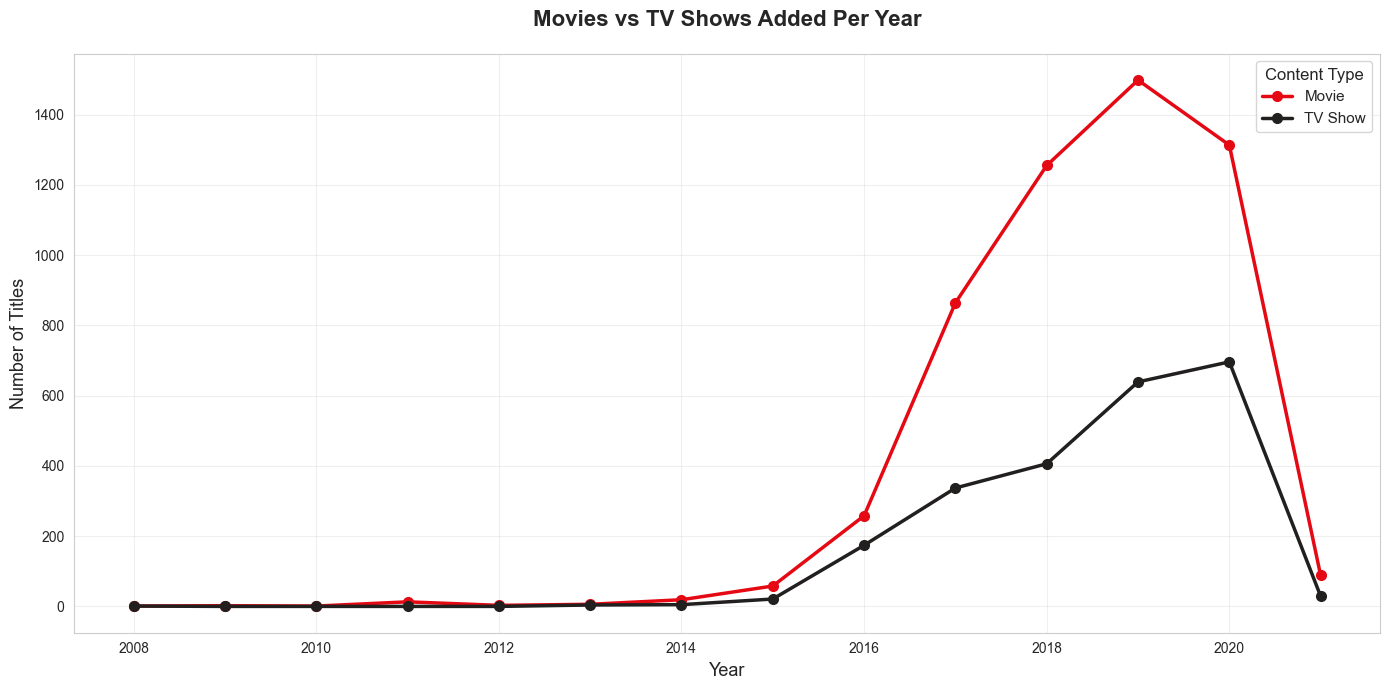

In [116]:
# Movies vs TV Shows trends over years
yearly_type = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

print("="*70)
print("MOVIES vs TV SHOWS TREND OVER YEARS")
print("="*70)
print("\n", yearly_type)

# Calculate proportion
yearly_type_pct = yearly_type.div(yearly_type.sum(axis=1), axis=0) * 100
print("\n\nPercentage Distribution:")
print(yearly_type_pct)

# Visualization 1: Line plot - absolute counts
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
yearly_type.plot(ax=ax, marker='o', linewidth=2.5, markersize=7, color=['#E50914', '#221F1F'])
ax.set_title('Movies vs TV Shows Added Per Year', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.legend(title='Content Type', fontsize=11, title_fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Key Findings: Movies vs TV Shows Trend

**Content Mix Evolution:**
- Movies consistently dominate the platform across all years
- TV Show growth has been proportionally stronger in recent years, showing Netflix's strategic shift toward original series
- The gap between Movies and TV Shows widened significantly during 2017-2019 growth period

**Strategic Insights:**
- Peak year 2019 saw Movies at their highest count, but TV Shows also showed strong growth
- The dual-content strategy helps Netflix cater to different viewing preferences
- Recent years show more balanced growth between both content types

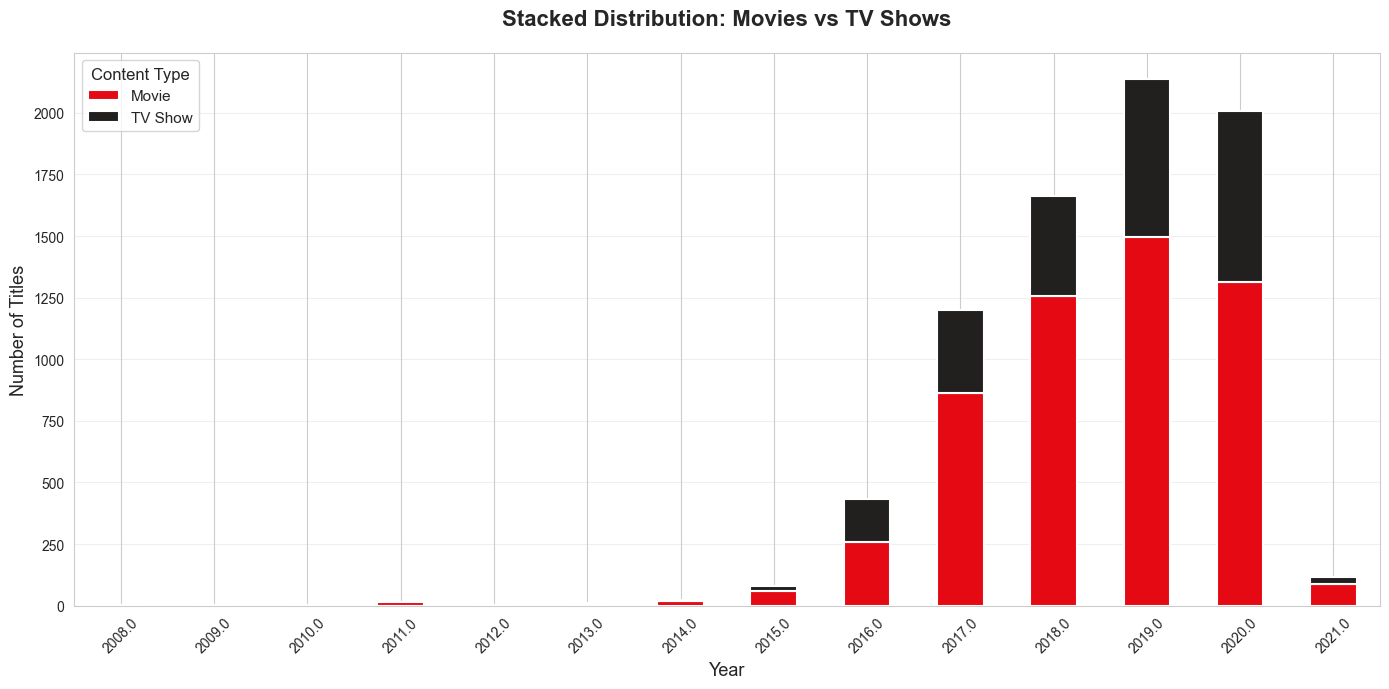

In [117]:
# Visualization 2: Stacked bar chart
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
yearly_type.plot(kind='bar', stacked=True, ax=ax, color=['#E50914', '#221F1F'], 
                 edgecolor='white', linewidth=1.5)
ax.set_title('Stacked Distribution: Movies vs TV Shows', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.legend(title='Content Type', fontsize=11, title_fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

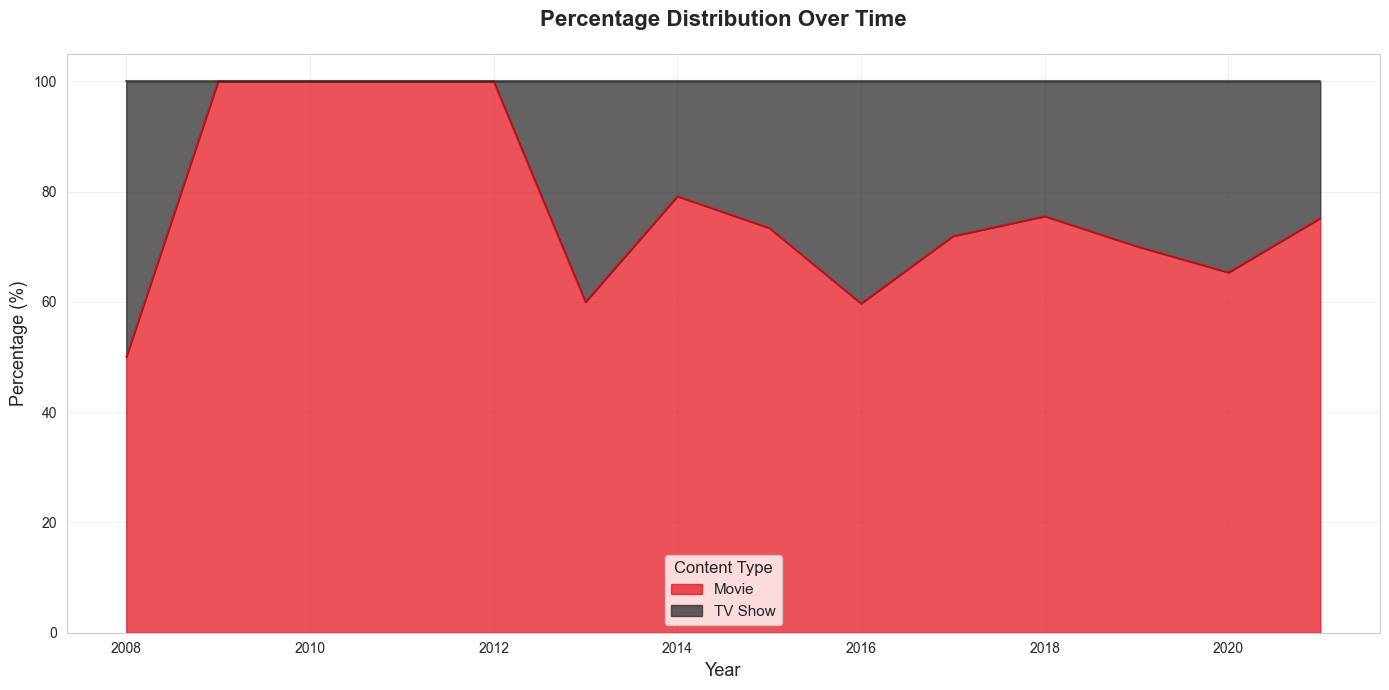

In [118]:
# Visualization 3: Percentage stacked area chart
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
yearly_type_pct.plot(kind='area', stacked=True, ax=ax, alpha=0.7, color=['#E50914', '#221F1F'])
ax.set_title('Percentage Distribution Over Time', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Percentage (%)', fontsize=13)
ax.legend(title='Content Type', fontsize=11, title_fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

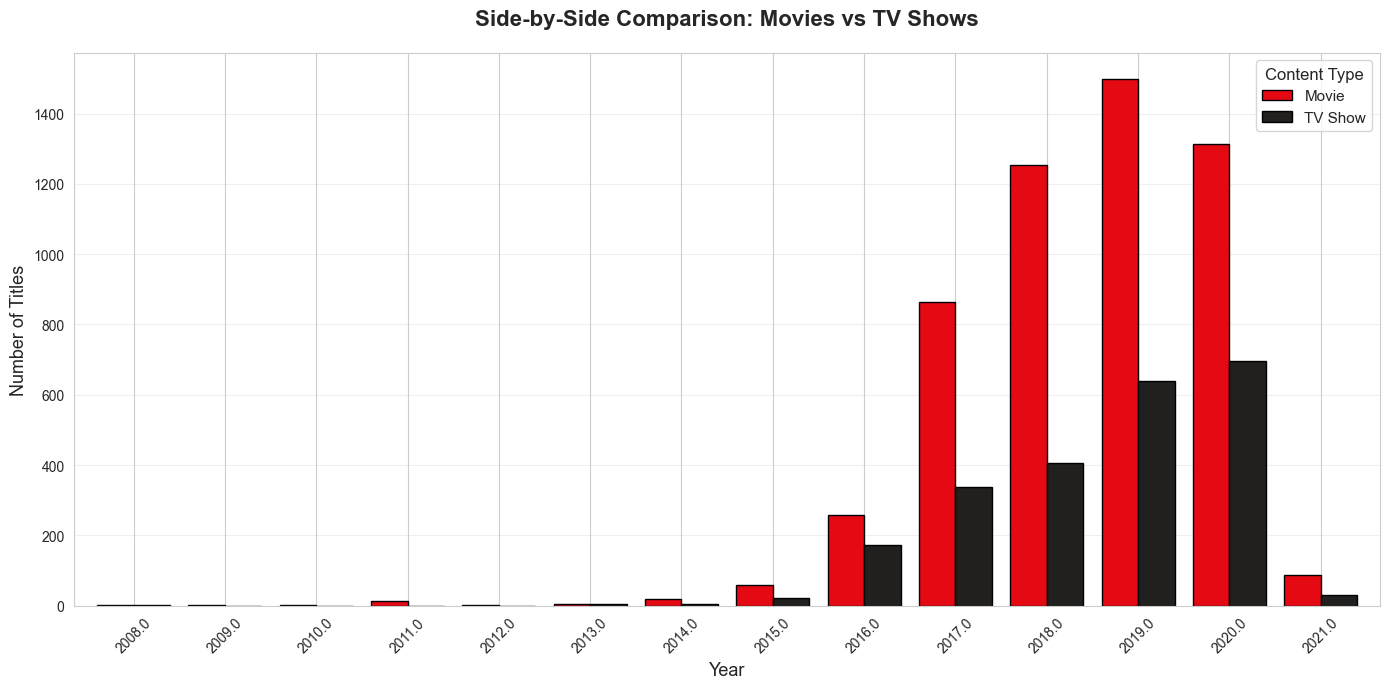

In [119]:
# Visualization 4: Grouped bar chart
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
yearly_type.plot(kind='bar', ax=ax, color=['#E50914', '#221F1F'], 
                 edgecolor='black', linewidth=1, width=0.8)
ax.set_title('Side-by-Side Comparison: Movies vs TV Shows', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.legend(title='Content Type', fontsize=11, title_fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Genre Analysis

GENRE ANALYSIS

Total Unique Genres: 42

Top 20 Genres on Netflix:
----------------------------------------------------------------------
listed_in
International Movies        2437
Dramas                      2108
Comedies                    1472
International TV Shows      1199
Documentaries                786
Action & Adventure           721
TV Dramas                    704
Independent Movies           675
Children & Family Movies     532
Romantic Movies              531
TV Comedies                  525
Thrillers                    492
Crime TV Shows               427
Kids' TV                     414
Docuseries                   353
Romantic TV Shows            333
Stand-Up Comedy              329
Music & Musicals             321
Horror Movies                312
British TV Shows             232
Name: count, dtype: int64


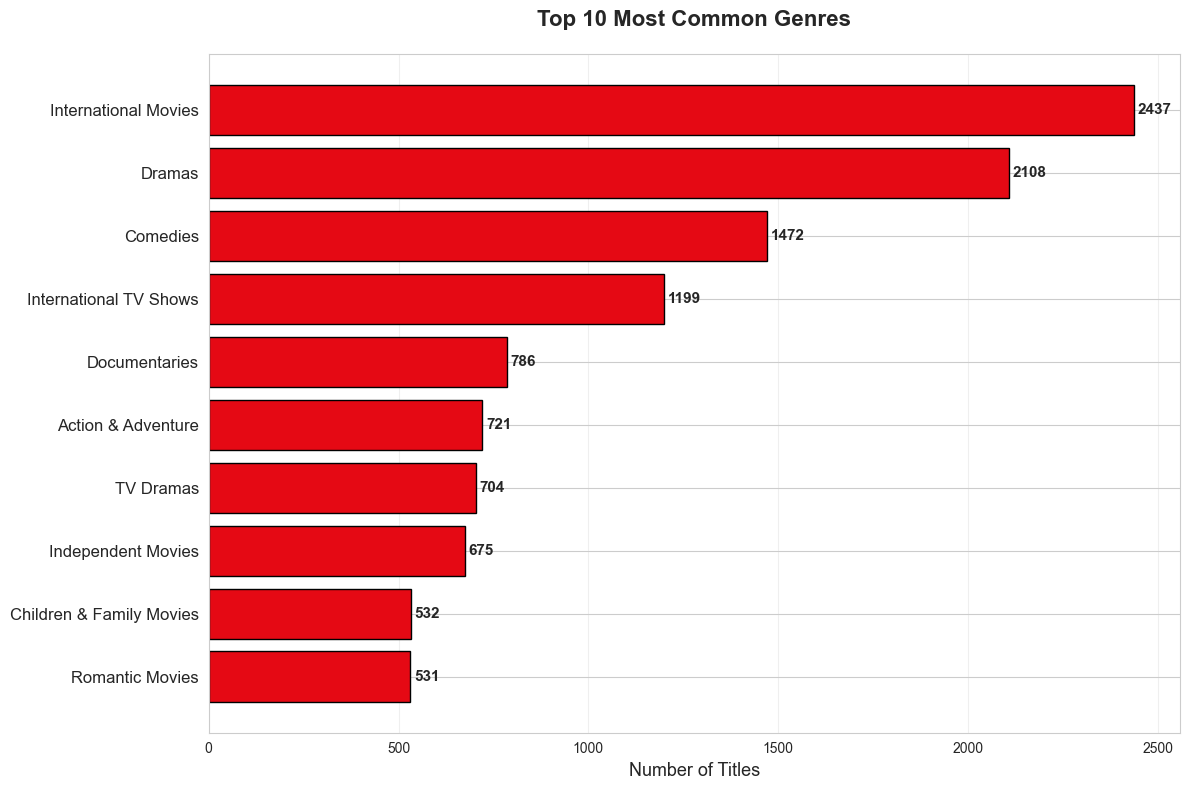

In [120]:
# Extract and analyze genres (listed_in column)
# Split genres as they are comma-separated
genre_list = df['listed_in'].dropna().str.split(',').explode().str.strip()
genre_counts = genre_list.value_counts()

print("="*70)
print("GENRE ANALYSIS")
print("="*70)

print(f"\nTotal Unique Genres: {genre_counts.shape[0]}")
print(f"\nTop 20 Genres on Netflix:")
print("-" * 70)
print(genre_counts.head(20))

# Visualization 1: Top 10 genres - horizontal bar chart
top_10_genres = genre_counts.head(10)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.barh(range(len(top_10_genres)), top_10_genres.values, color='#E50914', edgecolor='black')
ax.set_yticks(range(len(top_10_genres)))
ax.set_yticklabels(top_10_genres.index, fontsize=12)
ax.set_xlabel('Number of Titles', fontsize=13)
ax.set_title('Top 10 Most Common Genres', fontsize=16, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_10_genres.values):
    ax.text(v + 10, i, str(v), va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### 📊 Key Findings: Genre Distribution

**Top Genre Insights:**
- **International Movies** lead with the highest count, reflecting Netflix's global content strategy
- **Dramas and Comedies** are the next most popular genres, appealing to broad audiences
- **Documentaries** rank high, showing Netflix's investment in educational and informational content
- The top 10 genres account for a significant portion of the catalog

**Content Strategy:**
- Genre diversity ensures appeal to different viewer preferences and demographics
- The dominance of International content shows Netflix's focus on global markets
- Mix of entertainment (Drama, Comedy) and educational (Documentaries) content creates balanced offering

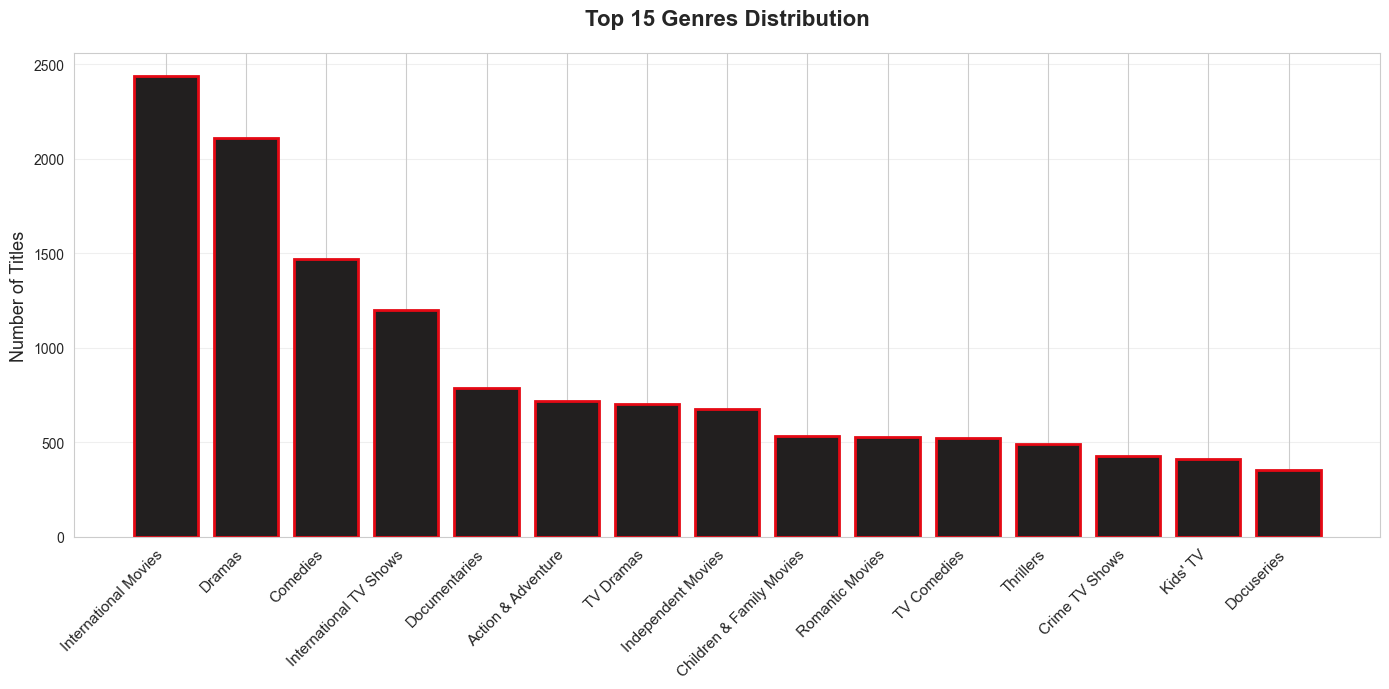

In [121]:
# Visualization 2: Top 15 genres - vertical bar chart
top_15_genres = genre_counts.head(15)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(range(len(top_15_genres)), top_15_genres.values, color='#221F1F', edgecolor='#E50914', linewidth=2)
ax.set_xticks(range(len(top_15_genres)))
ax.set_xticklabels(top_15_genres.index, rotation=45, ha='right', fontsize=11)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.set_title('Top 15 Genres Distribution', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

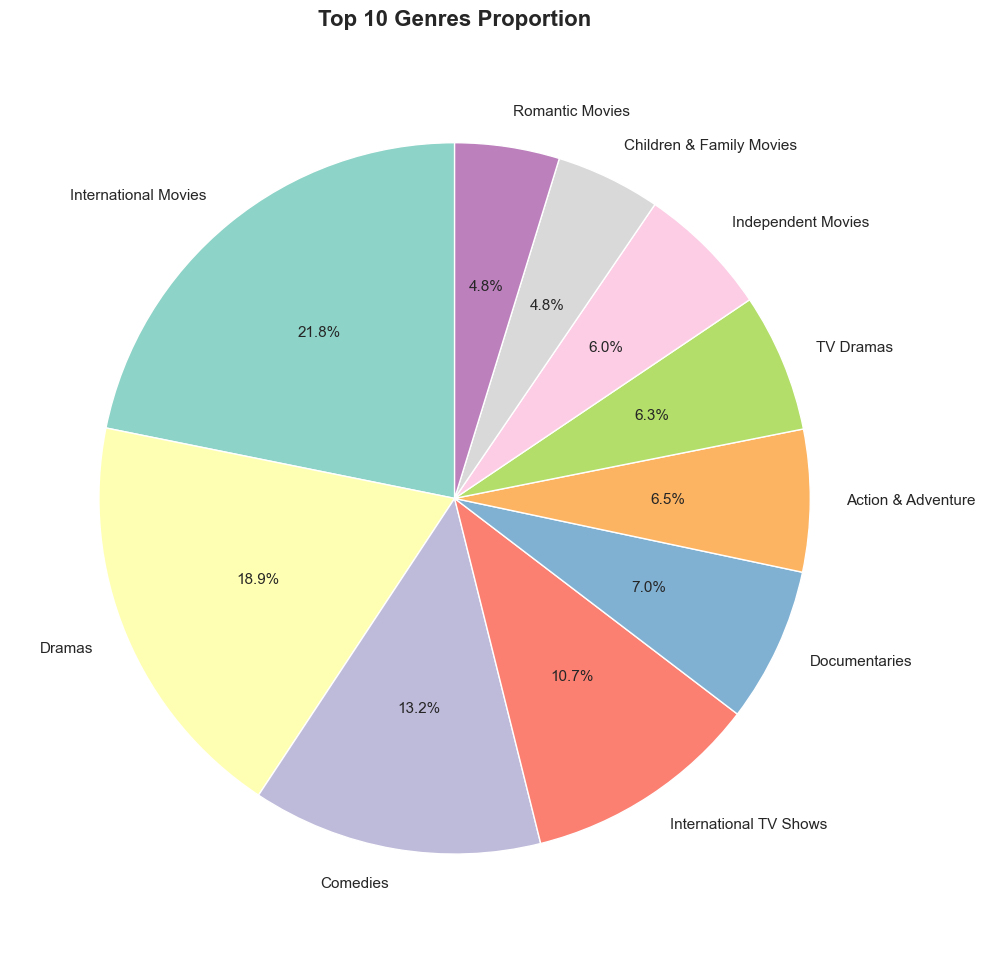

In [122]:
# Visualization 3: Pie chart for top 10 genres
colors_palette = plt.cm.Set3(range(len(top_10_genres)))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.pie(top_10_genres.values, labels=top_10_genres.index, autopct='%1.1f%%', 
       startangle=90, colors=colors_palette, textprops={'fontsize': 11})
ax.set_title('Top 10 Genres Proportion', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

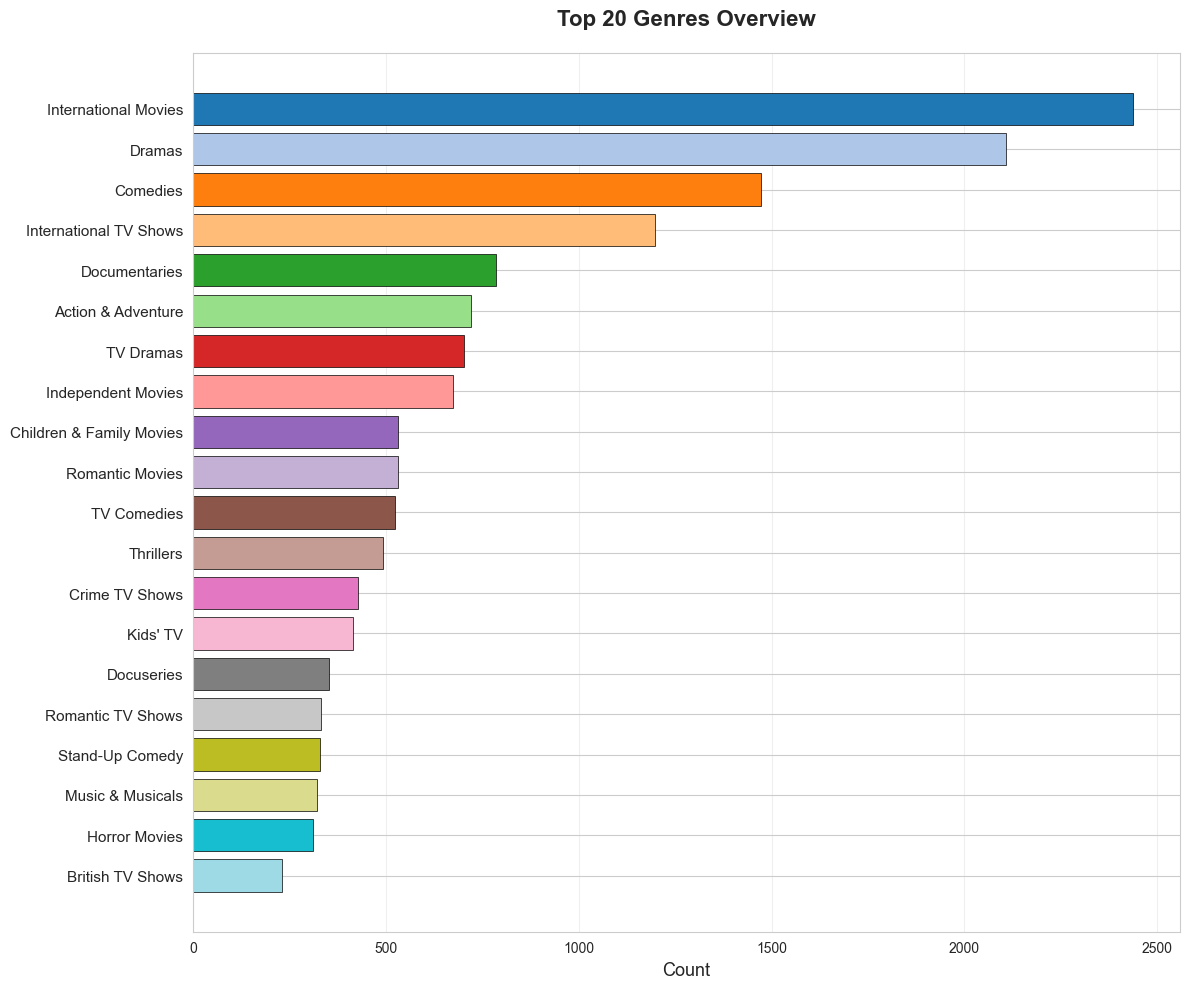

In [123]:
# Visualization 4: Top 20 genres overview
from matplotlib.patches import Rectangle
top_20 = genre_counts.head(20)
colors_20 = plt.cm.tab20(range(len(top_20)))
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.barh(range(len(top_20)), top_20.values, color=colors_20, edgecolor='black', linewidth=0.5)
ax.set_yticks(range(len(top_20)))
ax.set_yticklabels(top_20.index, fontsize=11)
ax.set_xlabel('Count', fontsize=13)
ax.set_title('Top 20 Genres Overview', fontsize=16, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

GENRE POPULARITY TRENDS OVER YEARS

 genre       Action & Adventure  Comedies  Documentaries  Dramas  \
year_added                                                        
2008.0                       0         0              0       1   
2009.0                       0         0              0       1   
2011.0                       0         0              0      13   
2012.0                       0         2              1       0   
2013.0                       0         1              1       0   
2014.0                       1         2              8       0   
2015.0                       2        12             13      12   
2016.0                      20        49             69      67   
2017.0                     106       191            206     297   
2018.0                     178       301            170     534   
2019.0                     222       452            189     597   
2020.0                     176       425            120     548   
2021.0                   

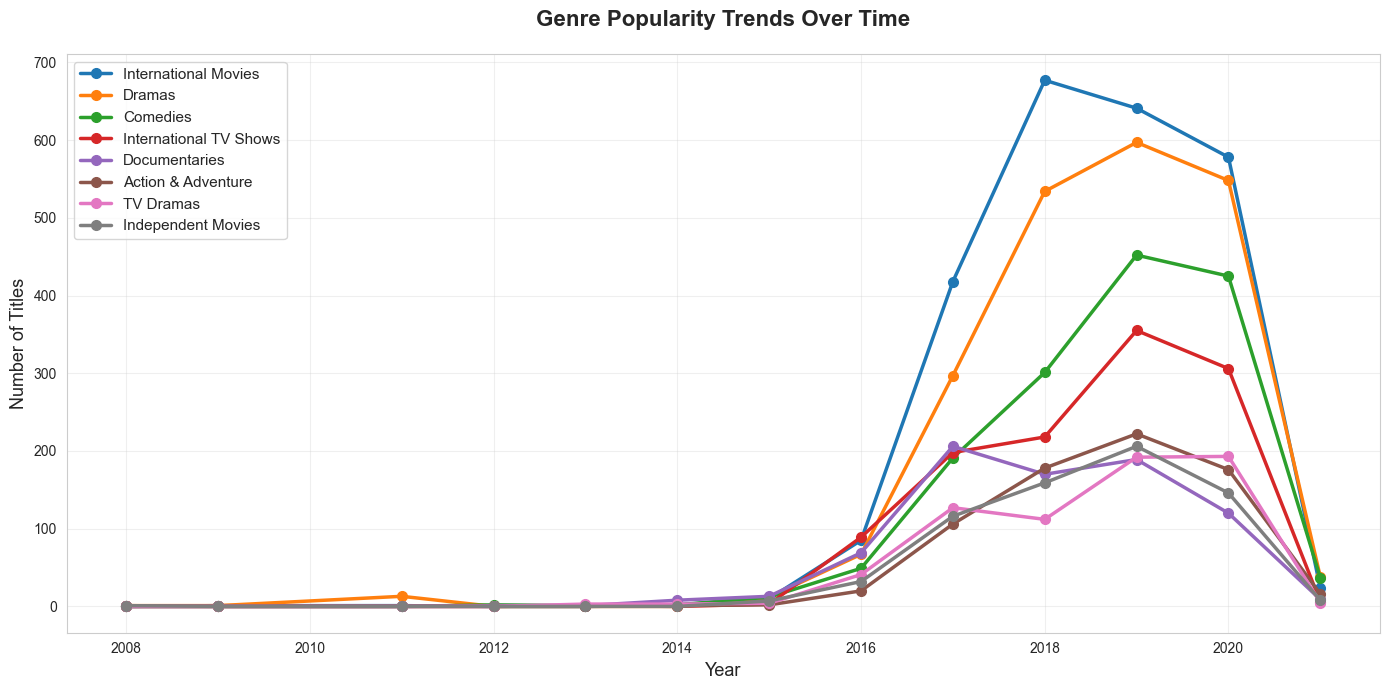

In [124]:
# Genre trends over time
# Create a dataframe with year and genre
df_genre_year = df[['year_added', 'listed_in']].dropna()
df_genre_year_exploded = df_genre_year.assign(genre=df_genre_year['listed_in'].str.split(',')).explode('genre')
df_genre_year_exploded['genre'] = df_genre_year_exploded['genre'].str.strip()

# Get top 8 genres for trend analysis
top_8_genres = genre_counts.head(8).index.tolist()

# Filter for top genres
df_top_genres = df_genre_year_exploded[df_genre_year_exploded['genre'].isin(top_8_genres)]

# Count by year and genre
genre_yearly_trend = df_top_genres.groupby(['year_added', 'genre']).size().unstack(fill_value=0)

print("="*70)
print("GENRE POPULARITY TRENDS OVER YEARS")
print("="*70)
print("\n", genre_yearly_trend)

# Visualization 1: Line plot for top genres
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
for genre in top_8_genres:
    if genre in genre_yearly_trend.columns:
        ax.plot(genre_yearly_trend.index, genre_yearly_trend[genre], 
                marker='o', linewidth=2.5, label=genre, markersize=7)

ax.set_title('Genre Popularity Trends Over Time', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Key Findings: Genre Trends Over Time

**Evolution Patterns:**
- **International Movies** show exponential growth, especially post-2016
- **Dramas and Documentaries** maintain steady upward trends
- All top genres show significant growth during 2017-2019 expansion period
- Genre preferences remain relatively consistent, with established categories dominating

**Strategic Observations:**
- Netflix maintains genre consistency while scaling content volume
- International content growth outpaces domestic content, showing global strategy success
- Multiple genre lines moving upward indicates diversification without abandoning core categories

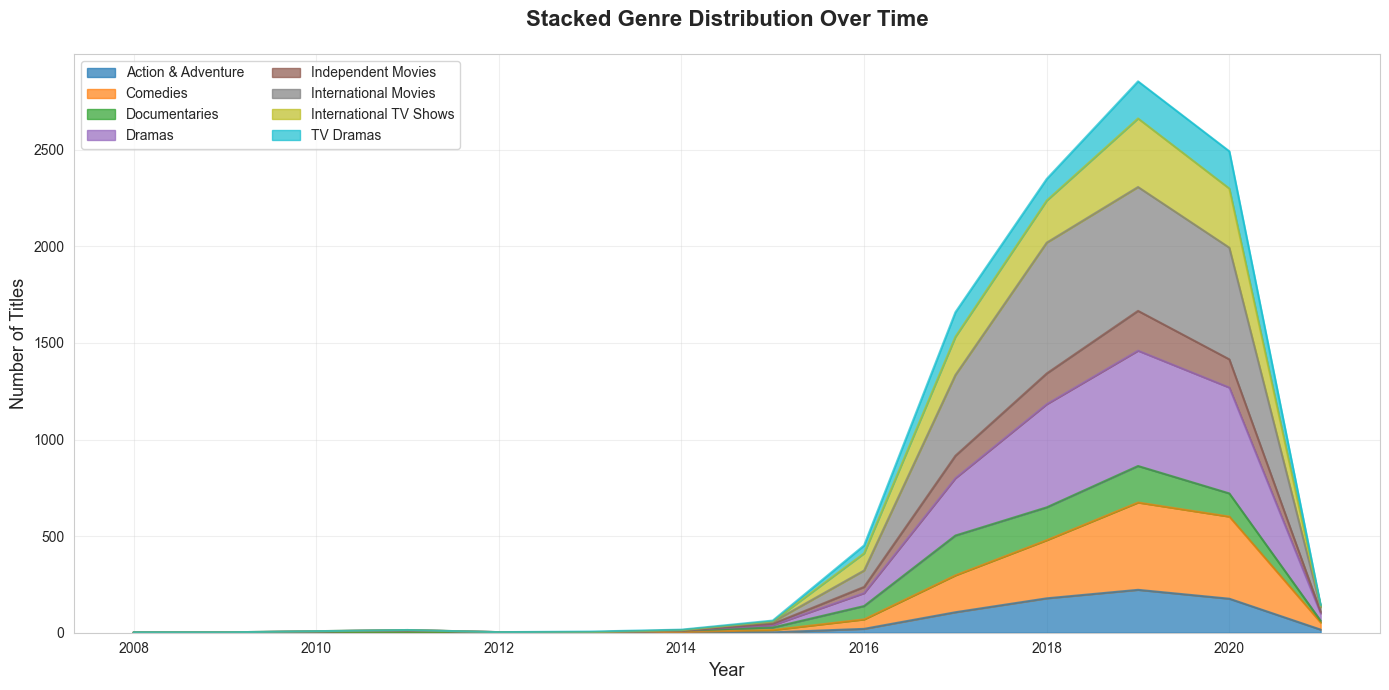

In [125]:
# Visualization 2: Stacked area chart
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
genre_yearly_trend.plot(kind='area', stacked=True, ax=ax, alpha=0.7, colormap='tab10', legend=True)
ax.set_title('Stacked Genre Distribution Over Time', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.legend(loc='upper left', fontsize=10, ncol=2)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

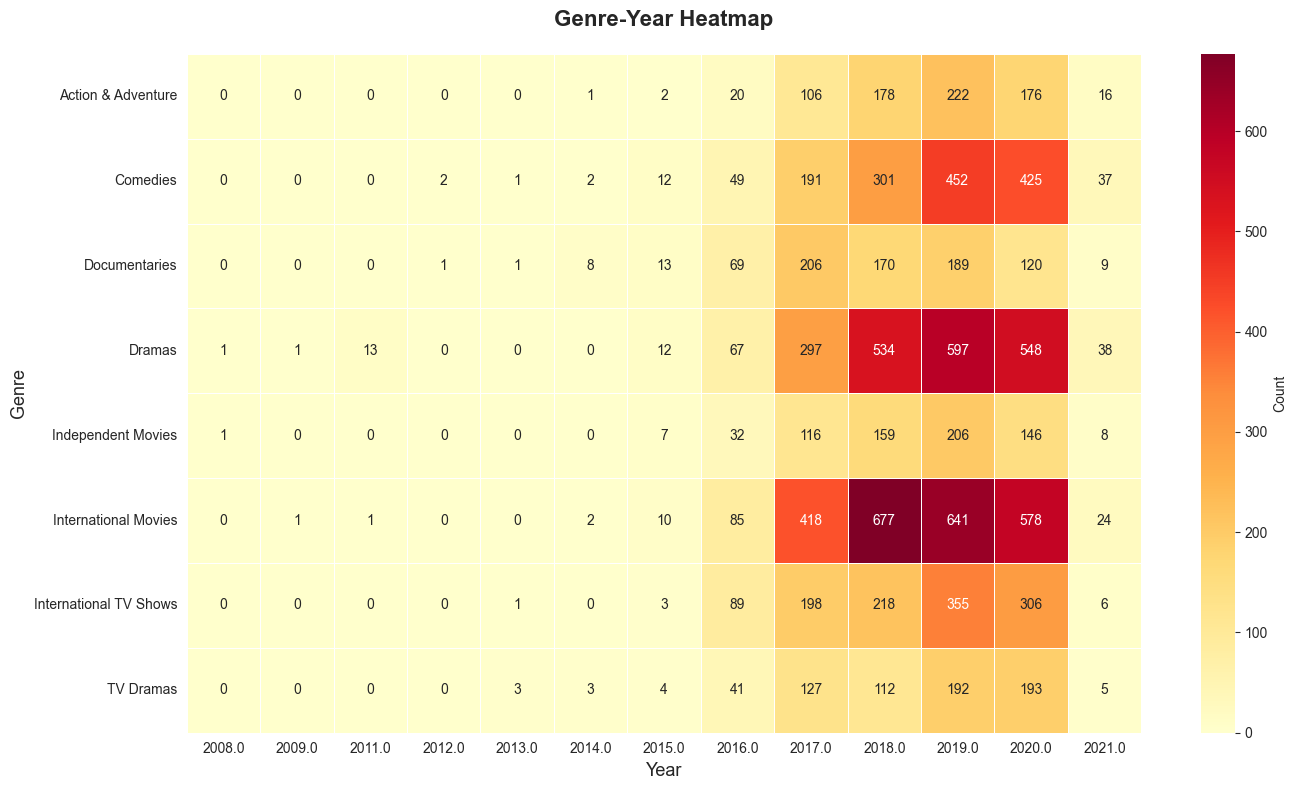

In [126]:
# Visualization 3: Heatmap of genre trends
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
sns.heatmap(genre_yearly_trend.T, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Count'}, ax=ax, linewidths=0.5)
ax.set_title('Genre-Year Heatmap', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Genre', fontsize=13)
plt.tight_layout()
plt.show()

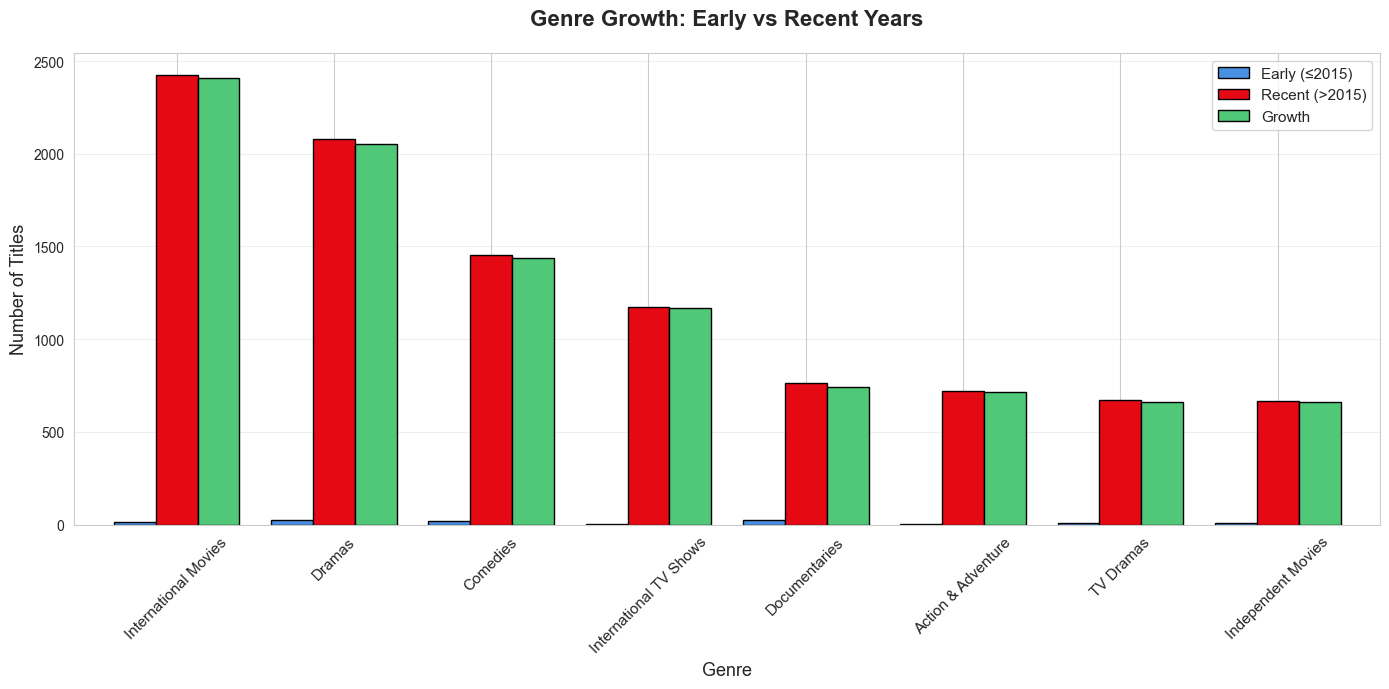

In [127]:
# Visualization 4: Growth rate analysis - compare early years vs recent years
early_period = genre_yearly_trend[genre_yearly_trend.index <= 2015].sum()
recent_period = genre_yearly_trend[genre_yearly_trend.index > 2015].sum()

growth_comparison = pd.DataFrame({
    'Early (≤2015)': early_period,
    'Recent (>2015)': recent_period,
    'Growth': recent_period - early_period
}).sort_values('Growth', ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
growth_comparison.plot(kind='bar', ax=ax, width=0.8, 
                       color=['#4A90E2', '#E50914', '#50C878'], edgecolor='black')
ax.set_title('Genre Growth: Early vs Recent Years', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Genre', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.tick_params(axis='x', rotation=45, labelsize=11)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Country-wise Content Analysis

COUNTRY-WISE CONTENT CONTRIBUTION

Total Unique Countries: 118

Top 20 Contributing Countries:
----------------------------------------------------------------------
country
United States     3298
India              990
United Kingdom     723
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
China              147
Australia          144
Egypt              110
Turkey             108
Hong Kong          102
Italy               90
Brazil              88
Taiwan              85
Belgium             85
Argentina           82
Name: count, dtype: int64


Top 10 Countries represent 75.41% of all content


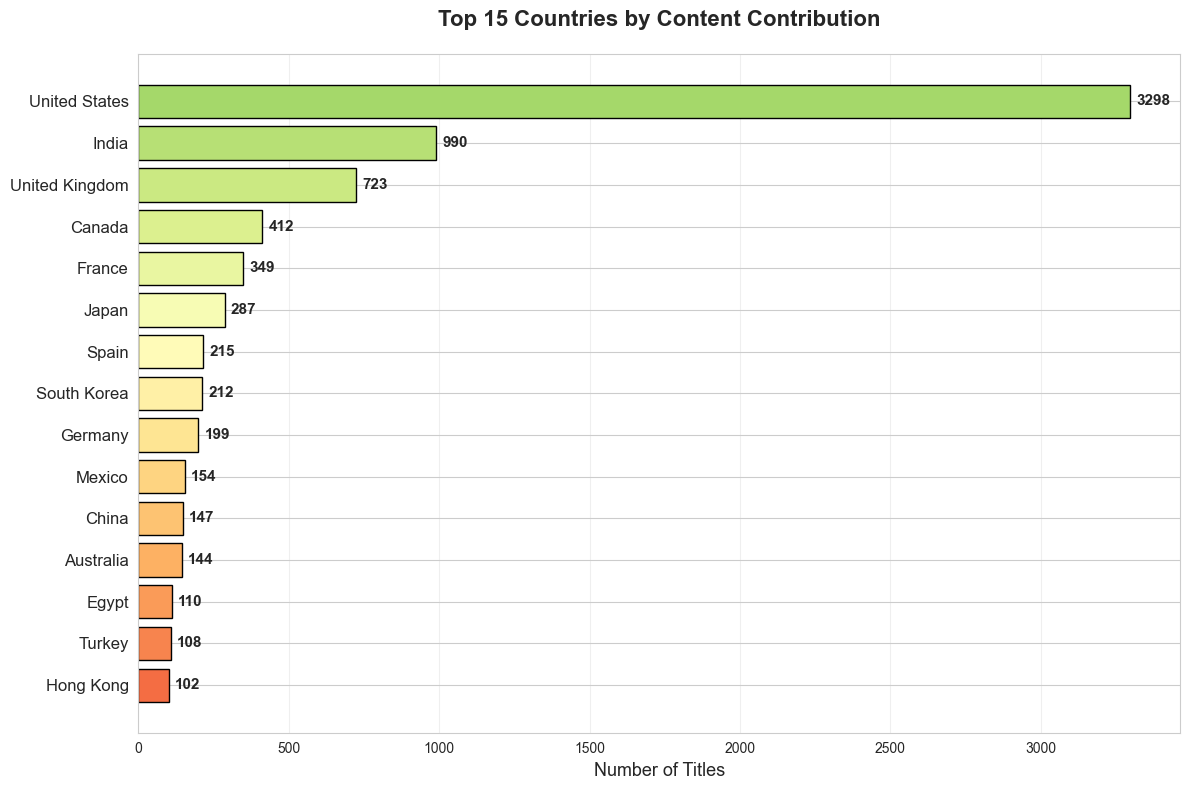

In [128]:
# Extract countries (country column is comma-separated)
country_list = df['country'].dropna().str.split(',').explode().str.strip()
country_counts = country_list.value_counts()

print("="*70)
print("COUNTRY-WISE CONTENT CONTRIBUTION")
print("="*70)

print(f"\nTotal Unique Countries: {country_counts.shape[0]}")
print(f"\nTop 20 Contributing Countries:")
print("-" * 70)
print(country_counts.head(20))

# Calculate percentage for top countries
top_10_countries = country_counts.head(10)
print(f"\n\nTop 10 Countries represent {(top_10_countries.sum() / country_counts.sum() * 100):.2f}% of all content")

# Visualization 1: Horizontal bar chart - Top 15 countries
top_15_countries = country_counts.head(15)
colors_gradient = plt.cm.RdYlGn_r(np.linspace(0.3, 0.8, len(top_15_countries)))
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.barh(range(len(top_15_countries)), top_15_countries.values, 
        color=colors_gradient, edgecolor='black', linewidth=1)
ax.set_yticks(range(len(top_15_countries)))
ax.set_yticklabels(top_15_countries.index, fontsize=12)
ax.set_xlabel('Number of Titles', fontsize=13)
ax.set_title('Top 15 Countries by Content Contribution', fontsize=16, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_15_countries.values):
    ax.text(v + 20, i, str(v), va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### 📊 Key Findings: Country-Wise Content Distribution

**Geographical Dominance:**
- **United States** leads by a significant margin, reflecting both Netflix's origin and the strength of Hollywood
- **India** ranks second, showcasing Netflix's investment in the world's second-largest entertainment market
- **United Kingdom** follows, representing strong European content contribution

**Global Reach:**
- Top 15 countries span across multiple continents (North America, Asia, Europe, South America)
- Content diversity reflects Netflix's truly global content strategy
- Emerging markets (India, South Korea, Japan) show strong representation, indicating strategic expansion

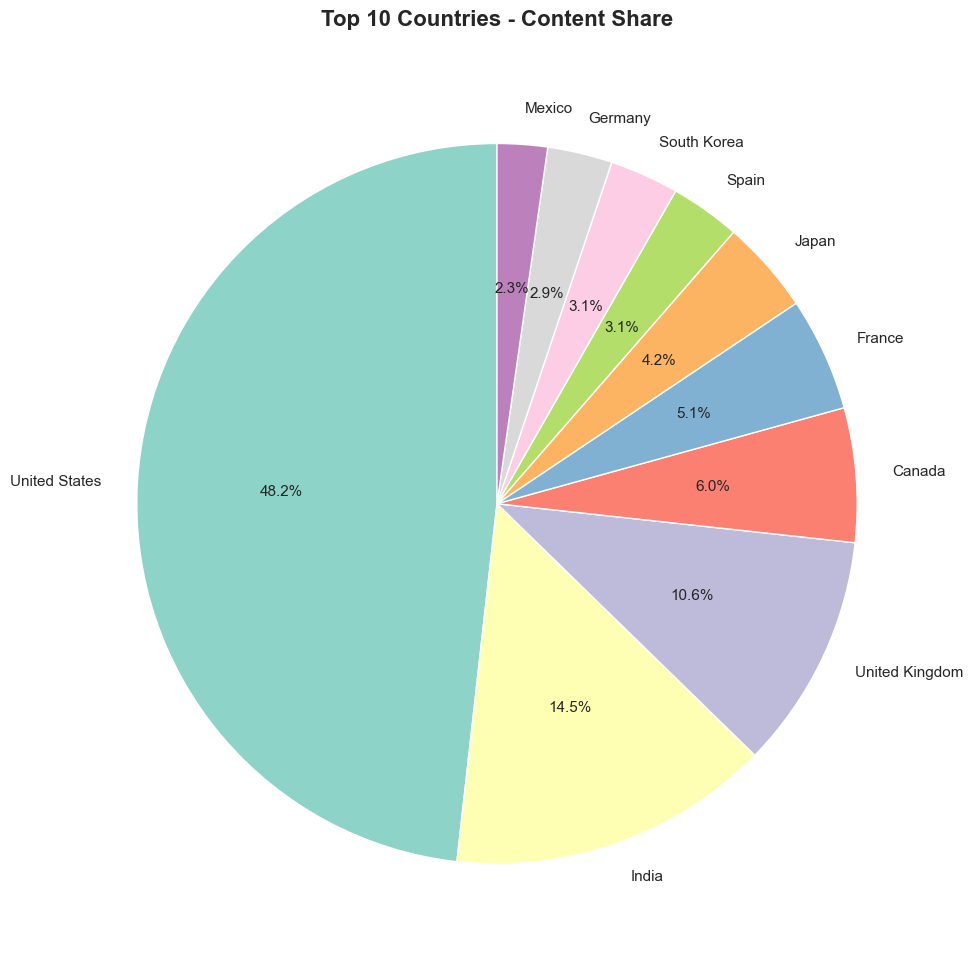

In [129]:
# Visualization 2: Pie chart - Top 10 countries
colors_pie = plt.cm.Set3(range(len(top_10_countries)))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.pie(top_10_countries.values, labels=top_10_countries.index, autopct='%1.1f%%',
       startangle=90, colors=colors_pie, textprops={'fontsize': 11})
ax.set_title('Top 10 Countries - Content Share', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

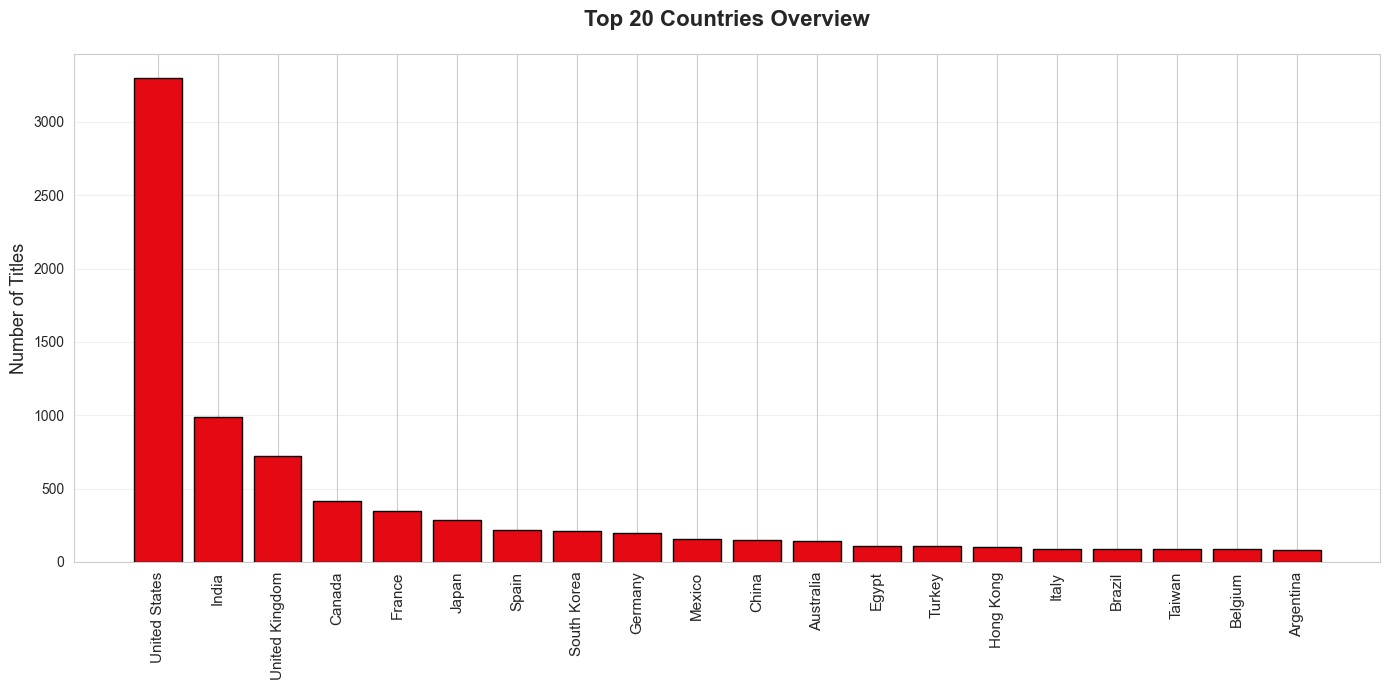

In [130]:
# Visualization 3: Vertical bar - Top 20 countries
top_20_countries = country_counts.head(20)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(range(len(top_20_countries)), top_20_countries.values, 
       color='#E50914', edgecolor='black', linewidth=1)
ax.set_xticks(range(len(top_20_countries)))
ax.set_xticklabels(top_20_countries.index, rotation=90, fontsize=11)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.set_title('Top 20 Countries Overview', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

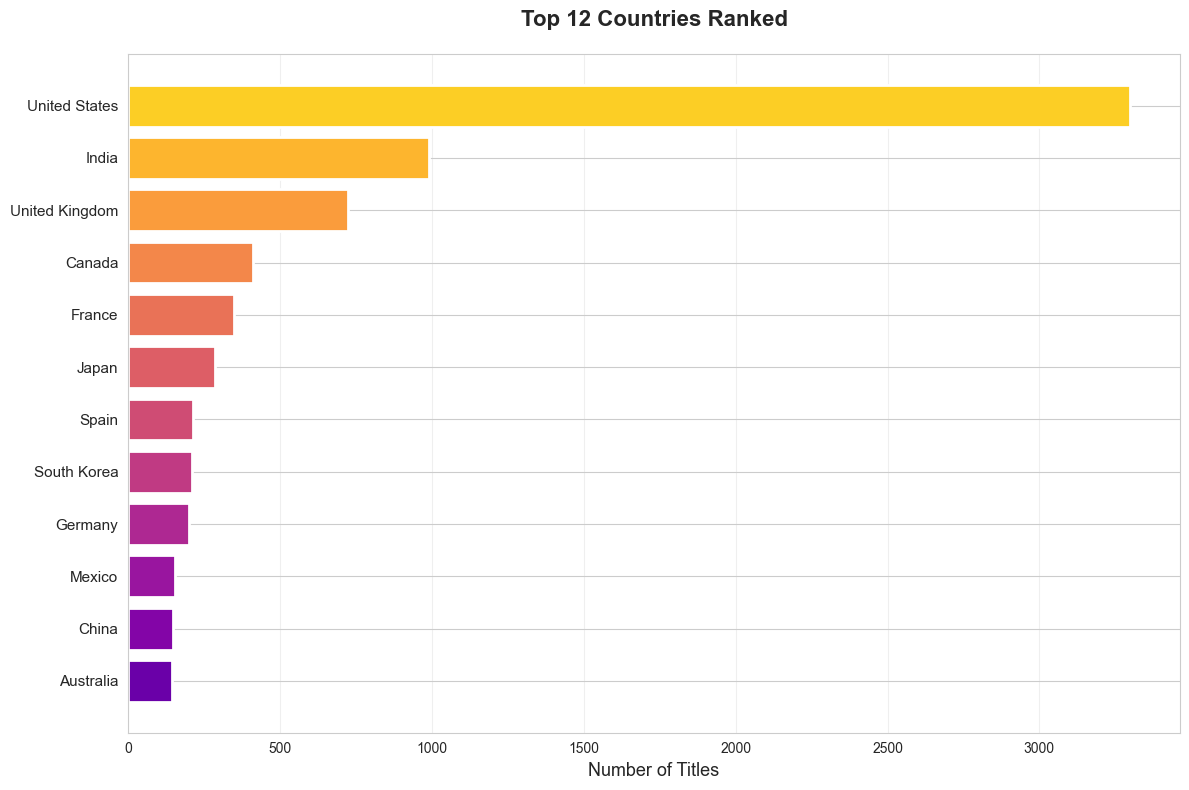

In [131]:
# Visualization 4: Treemap-style representation using bar chart
top_12 = country_counts.head(12).sort_values(ascending=True)
colors_treemap = plt.cm.plasma(np.linspace(0.2, 0.9, len(top_12)))
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.barh(range(len(top_12)), top_12.values, color=colors_treemap, edgecolor='white', linewidth=2)
ax.set_yticks(range(len(top_12)))
ax.set_yticklabels(top_12.index, fontsize=11)
ax.set_xlabel('Number of Titles', fontsize=13)
ax.set_title('Top 12 Countries Ranked', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

COUNTRY REPRESENTATION EVOLUTION (2008-2021)

 country     Canada  France  India  Japan  South Korea  Spain  United Kingdom  \
year_added                                                                     
2008.0           0       0      0      0            0      0               0   
2009.0           0       0      0      0            0      0               0   
2010.0           0       0      0      0            0      0               0   
2011.0           0       1      0      0            0      1               0   
2012.0           0       0      0      0            0      0               0   
2013.0           1       0      0      0            0      0               1   
2014.0           4       0      0      0            0      0               3   
2015.0           5       9      0      1            0      0               8   
2016.0          28      29     14     31           11     17              52   
2017.0          69      54    162     45           40     40             

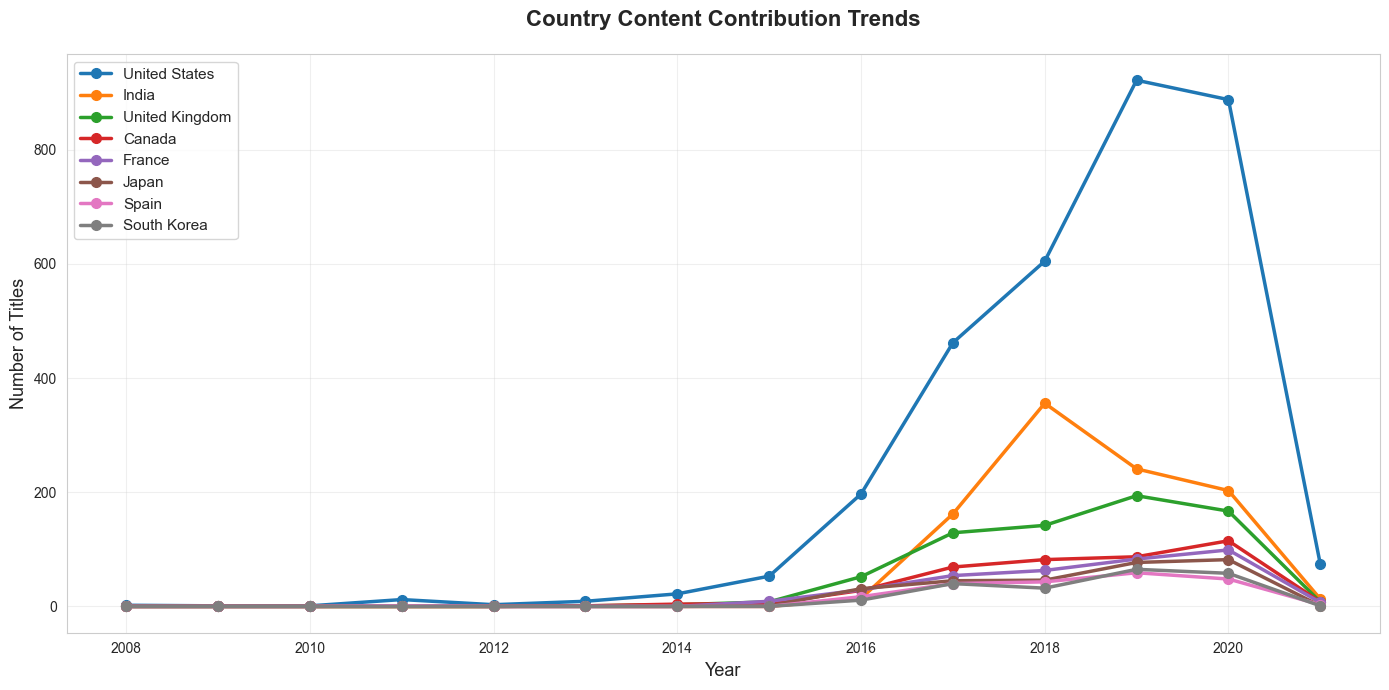

In [132]:
# Country representation evolution over time
df_country_year = df[['year_added', 'country']].dropna()
df_country_year_exploded = df_country_year.assign(country=df_country_year['country'].str.split(',')).explode('country')
df_country_year_exploded['country'] = df_country_year_exploded['country'].str.strip()

# Get top 8 countries for trend analysis
top_8_countries = country_counts.head(8).index.tolist()

# Filter for top countries
df_top_countries = df_country_year_exploded[df_country_year_exploded['country'].isin(top_8_countries)]

# Count by year and country
country_yearly_trend = df_top_countries.groupby(['year_added', 'country']).size().unstack(fill_value=0)

print("="*70)
print("COUNTRY REPRESENTATION EVOLUTION (2008-2021)")
print("="*70)
print("\n", country_yearly_trend)

# Visualization 1: Multi-line chart
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
for country in top_8_countries:
    if country in country_yearly_trend.columns:
        ax.plot(country_yearly_trend.index, country_yearly_trend[country],
                marker='o', linewidth=2.5, label=country, markersize=7)

ax.set_title('Country Content Contribution Trends', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Key Findings: Country Trends Over Time

**Growth Patterns:**
- **United States** maintains dominance but shows plateau in recent years
- **India** demonstrates explosive growth post-2017, becoming second-largest contributor
- **United Kingdom, Canada, and France** show steady upward trends
- Asian markets (Japan, South Korea) show increasing presence in recent years

**Strategic Insights:**
- Netflix's global expansion strategy is clearly visible in the data
- Emerging markets growth accelerates significantly after 2016
- Content localization strategy drives growth in regional markets

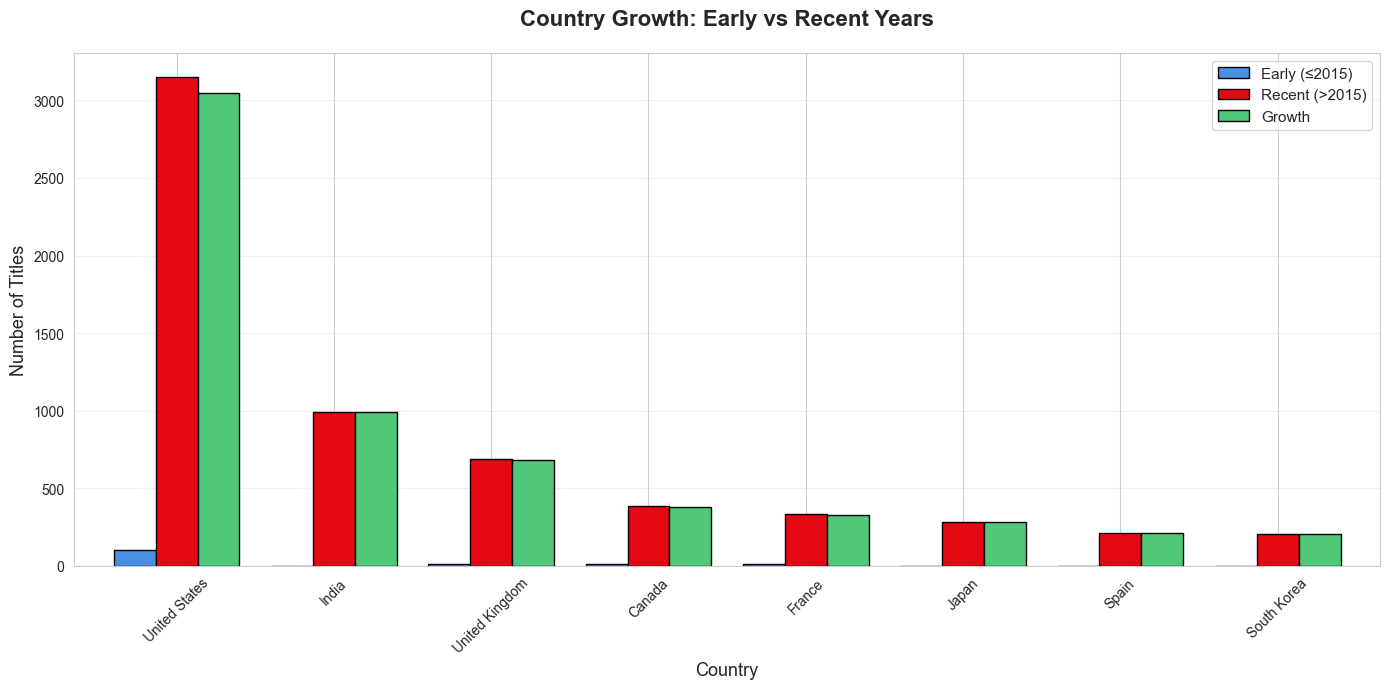

In [133]:
# Visualization 4: Growth comparison - Early vs Recent
early_country = country_yearly_trend[country_yearly_trend.index <= 2015].sum()
recent_country = country_yearly_trend[country_yearly_trend.index > 2015].sum()

country_growth = pd.DataFrame({
    'Early (≤2015)': early_country,
    'Recent (>2015)': recent_country,
    'Growth': recent_country - early_country
}).sort_values('Growth', ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
country_growth.plot(kind='bar', ax=ax, width=0.8,
                    color=['#4A90E2', '#E50914', '#50C878'], edgecolor='black')
ax.set_title('Country Growth: Early vs Recent Years', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Country', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.tick_params(axis='x', rotation=45)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

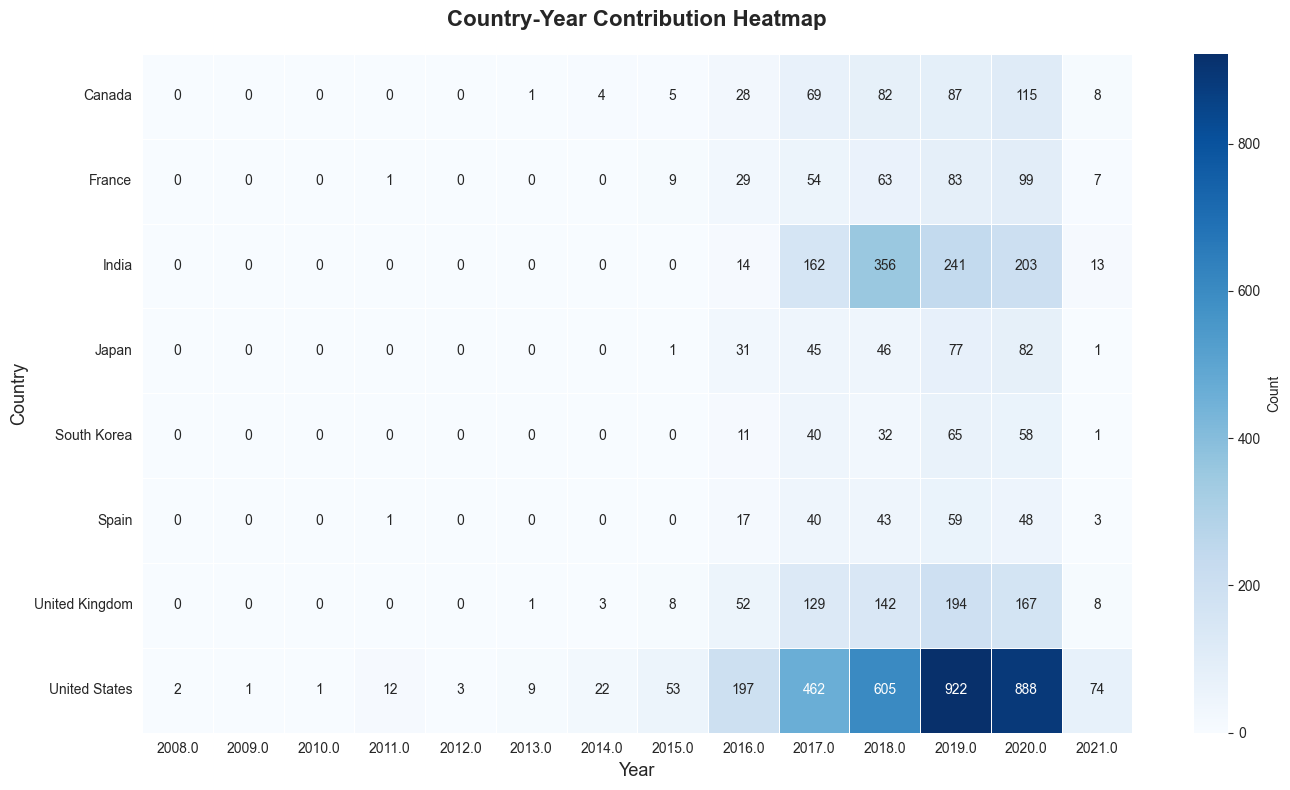

In [134]:
# Visualization 3: Heatmap
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
sns.heatmap(country_yearly_trend.T, annot=True, fmt='d', cmap='Blues',
            cbar_kws={'label': 'Count'}, ax=ax, linewidths=0.5)
ax.set_title('Country-Year Contribution Heatmap', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Country', fontsize=13)
plt.tight_layout()
plt.show()

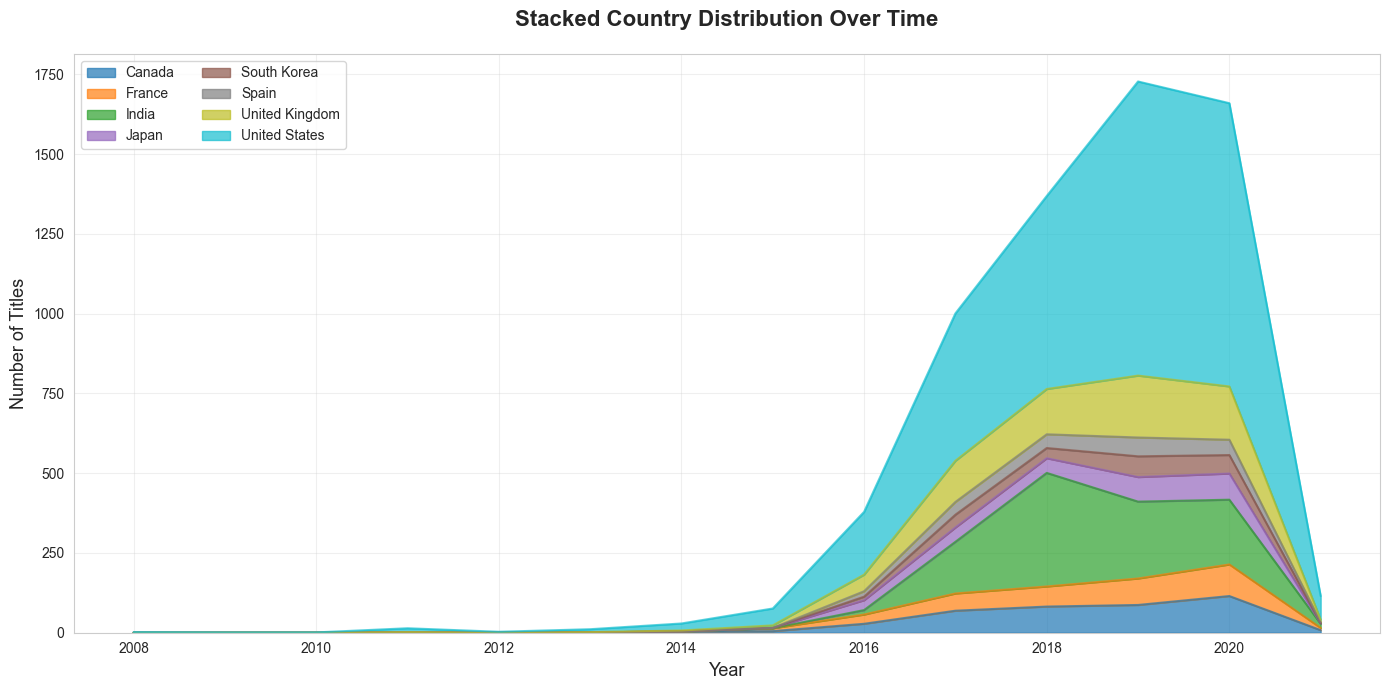

In [135]:
# Visualization 2: Stacked area chart
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
country_yearly_trend.plot(kind='area', stacked=True, ax=ax, alpha=0.7, colormap='tab10')
ax.set_title('Stacked Country Distribution Over Time', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.legend(loc='upper left', fontsize=10, ncol=2)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

US vs INTERNATIONAL CONTENT BALANCE

 region      International  United States
year_added                              
2008.0                  0              2
2009.0                  1              1
2010.0                  0              1
2011.0                  3             12
2012.0                  1              3
2013.0                  3              9
2014.0                 14             22
2015.0                 44             53
2016.0                344            197
2017.0                963            462
2018.0               1325            605
2019.0               1486            922
2020.0               1467            888
2021.0                 60             74


Percentage Distribution:
region      International  United States
year_added                              
2008.0           0.000000     100.000000
2009.0          50.000000      50.000000
2010.0           0.000000     100.000000
2011.0          20.000000      80.000000
2012.0          25.000000      75

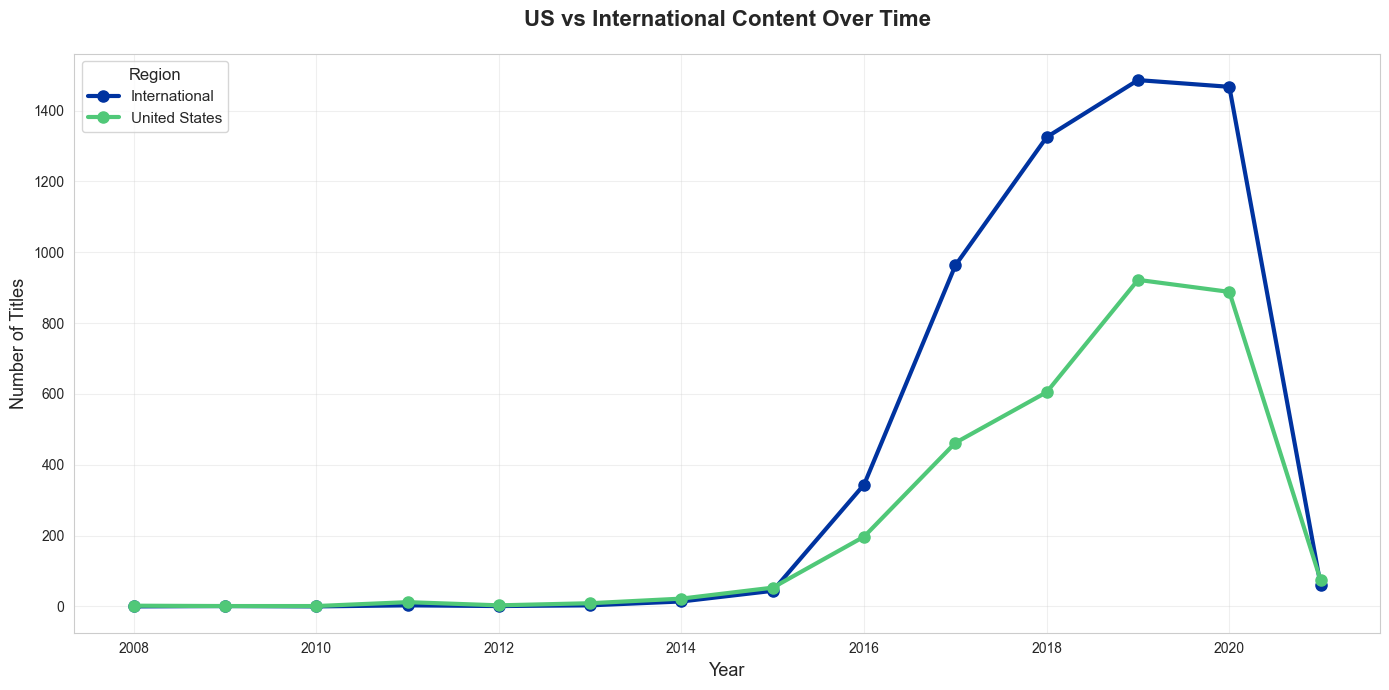

In [136]:
# US vs International content analysis
df_country_clean = df_country_year_exploded.copy()
df_country_clean['region'] = df_country_clean['country'].apply(
    lambda x: 'United States' if x == 'United States' else 'International'
)

us_vs_international = df_country_clean.groupby(['year_added', 'region']).size().unstack(fill_value=0)

print("="*70)
print("US vs INTERNATIONAL CONTENT BALANCE")
print("="*70)
print("\n", us_vs_international)

# Calculate percentages
us_vs_int_pct = us_vs_international.div(us_vs_international.sum(axis=1), axis=0) * 100
print("\n\nPercentage Distribution:")
print(us_vs_int_pct)

# Visualization 1: Line plot
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
us_vs_international.plot(ax=ax, marker='o', linewidth=3, markersize=8,
                          color=['#0033A0', '#50C878'])
ax.set_title('US vs International Content Over Time', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.legend(title='Region', fontsize=11, title_fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

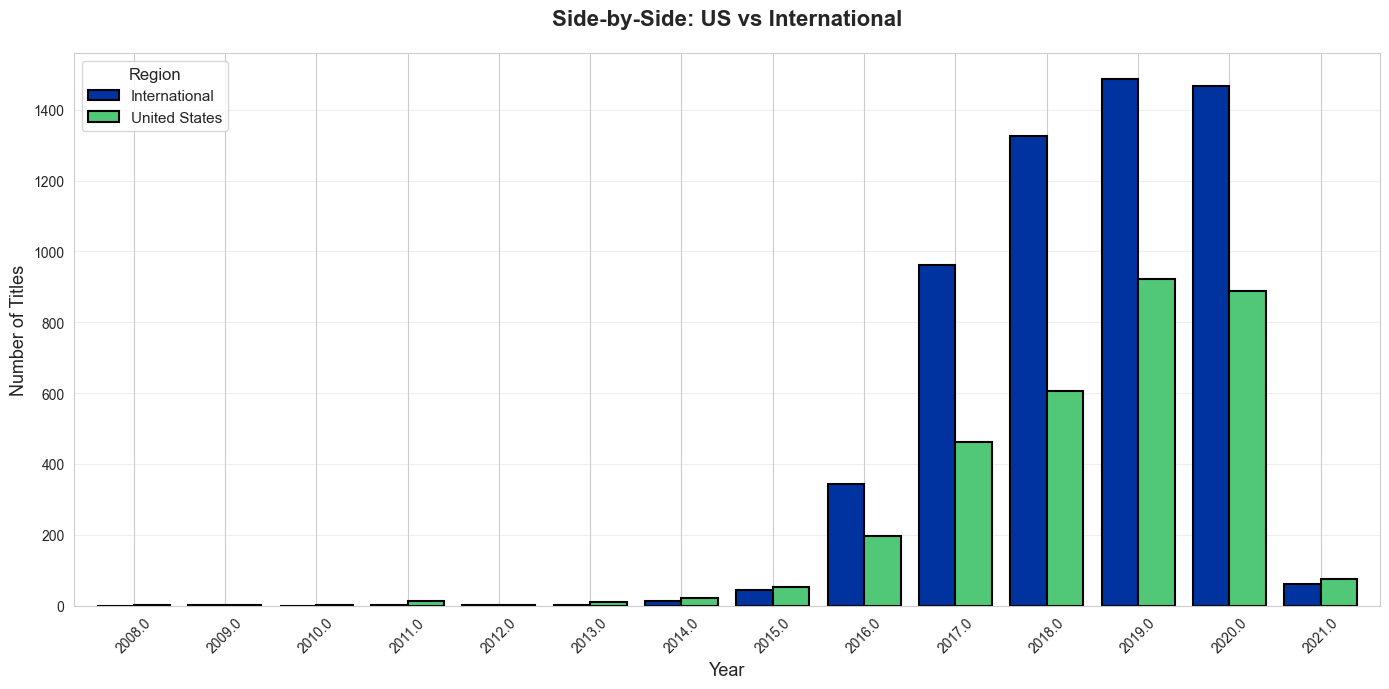

In [137]:
# Visualization 4: Grouped bar chart
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
us_vs_international.plot(kind='bar', ax=ax, color=['#0033A0', '#50C878'],
                          edgecolor='black', linewidth=1.5, width=0.8)
ax.set_title('Side-by-Side: US vs International', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.legend(title='Region', fontsize=11, title_fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

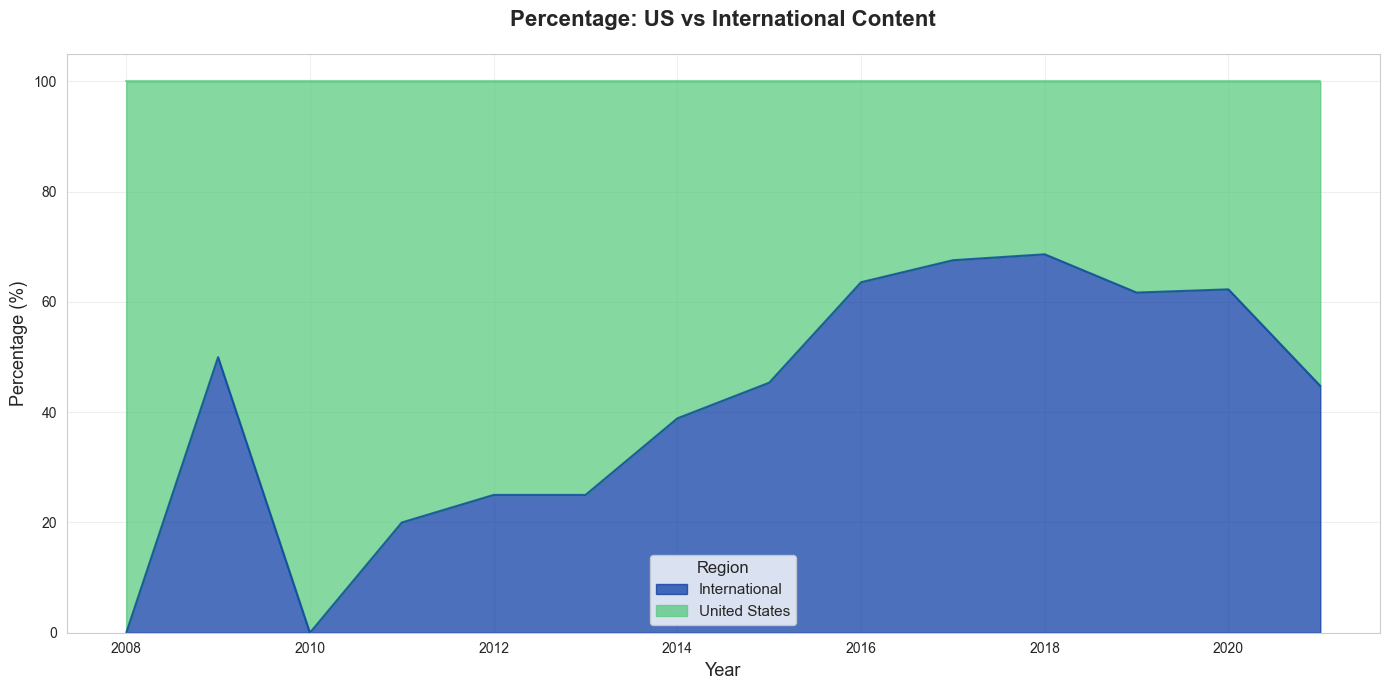

In [138]:
# Visualization 3: Percentage area chart
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
us_vs_int_pct.plot(kind='area', stacked=True, ax=ax, alpha=0.7,
                   color=['#0033A0', '#50C878'])
ax.set_title('Percentage: US vs International Content', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Percentage (%)', fontsize=13)
ax.legend(title='Region', fontsize=11, title_fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

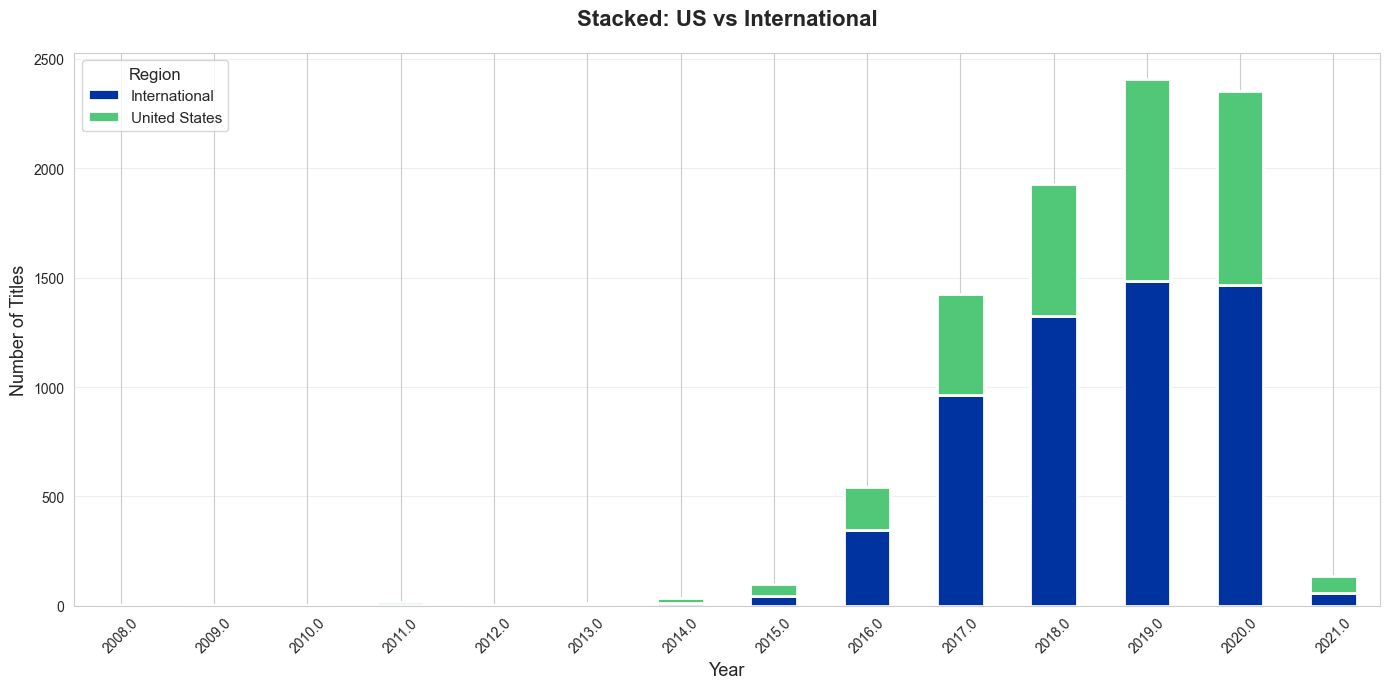

In [139]:
# Visualization 2: Stacked bar
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
us_vs_international.plot(kind='bar', stacked=True, ax=ax,
                          color=['#0033A0', '#50C878'], edgecolor='white', linewidth=2)
ax.set_title('Stacked: US vs International', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.legend(title='Region', fontsize=11, title_fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Key Findings: US vs International Content Balance

**Global Expansion:**
- **International content** has grown exponentially, surpassing US content in recent years
- Early years (2008-2014) were US-dominated, with over 80% American content
- Post-2016 shows dramatic shift toward international content, reflecting global strategy
- By 2019-2020, International content represents approximately 60% of additions

**Strategic Implications:**
- Netflix's transformation from US-centric to truly global platform is evident
- Investment in local content production across multiple countries
- Balancing global appeal with regional relevance

## 8. Director and Cast Analysis

DIRECTOR ANALYSIS

Total Unique Directors: 4482

Top 20 Most Prolific Directors on Netflix:
----------------------------------------------------------------------
director
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Steven Spielberg       10
David Dhawan            9
Shannon Hartman         9
Anurag Kashyap          9
Justin G. Dyck          8
Ryan Polito             8
Johnnie To              8
Umesh Mehra             8
Quentin Tarantino       8
Lance Bangs             8
Hakan Algül             8
Robert Rodriguez        8
Name: count, dtype: int64


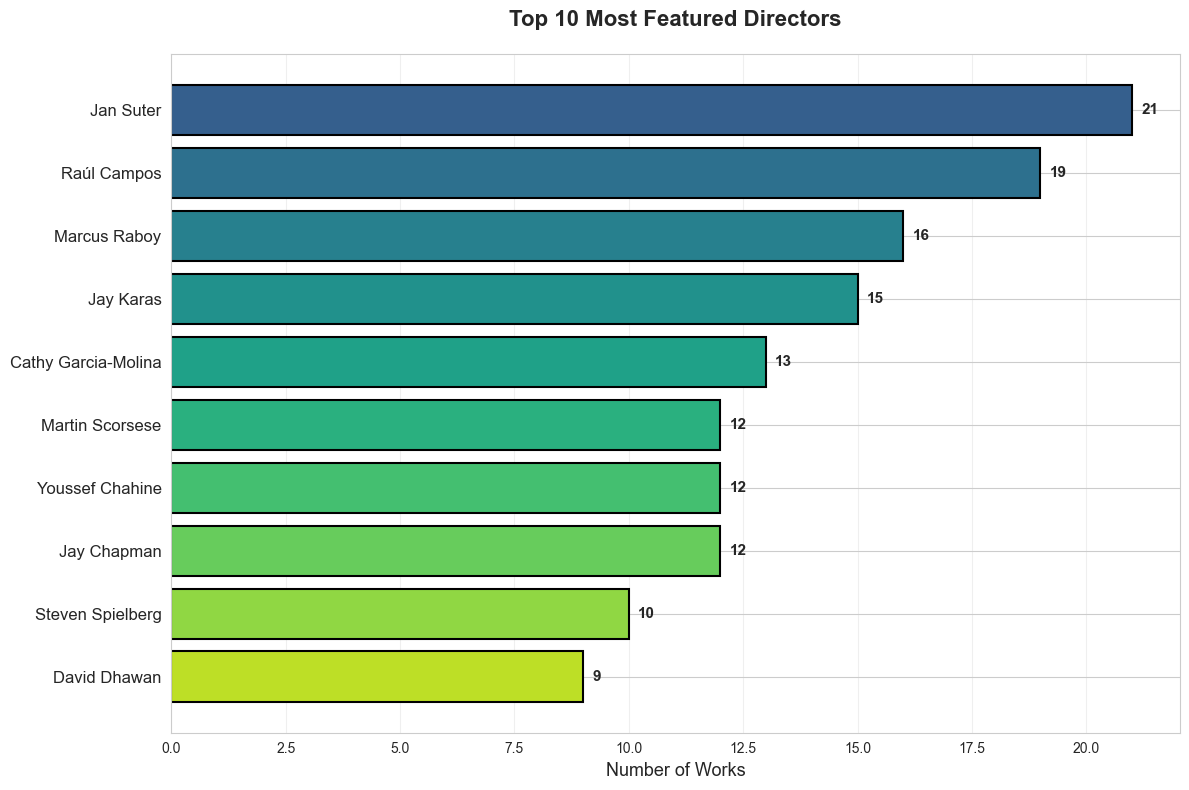

In [140]:
# Director analysis
director_list = df['director'].dropna().str.split(',').explode().str.strip()
director_counts = director_list.value_counts()

print("="*70)
print("DIRECTOR ANALYSIS")
print("="*70)

print(f"\nTotal Unique Directors: {director_counts.shape[0]}")
print(f"\nTop 20 Most Prolific Directors on Netflix:")
print("-" * 70)
print(director_counts.head(20))

# Visualization 1: Top 10 directors - horizontal bar
top_10_directors = director_counts.head(10)
colors_dir = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_10_directors)))
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.barh(range(len(top_10_directors)), top_10_directors.values,
        color=colors_dir, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(top_10_directors)))
ax.set_yticklabels(top_10_directors.index, fontsize=12)
ax.set_xlabel('Number of Works', fontsize=13)
ax.set_title('Top 10 Most Featured Directors', fontsize=16, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_10_directors.values):
    ax.text(v + 0.2, i, str(v), va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

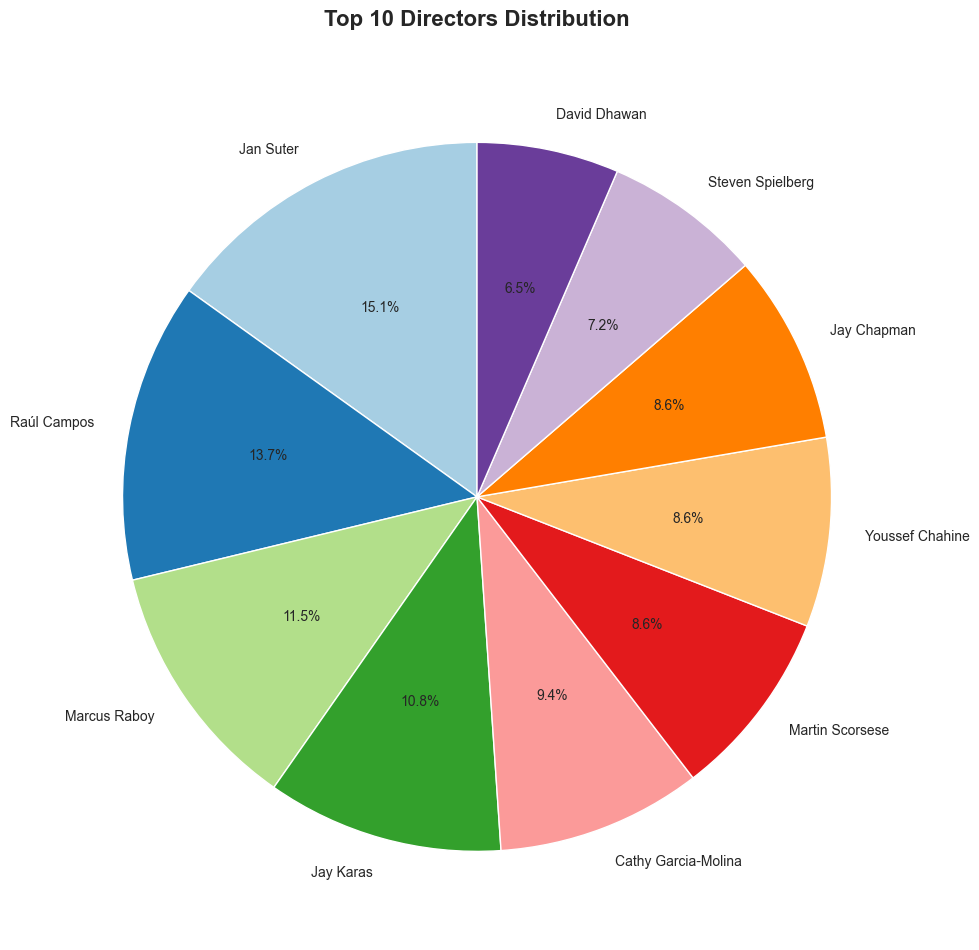

In [141]:
# Visualization 3: Pie chart - Top 10
colors_pie_dir = plt.cm.Paired(range(len(top_10_directors)))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.pie(top_10_directors.values, labels=top_10_directors.index, autopct='%1.1f%%',
       startangle=90, colors=colors_pie_dir, textprops={'fontsize': 10})
ax.set_title('Top 10 Directors Distribution', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

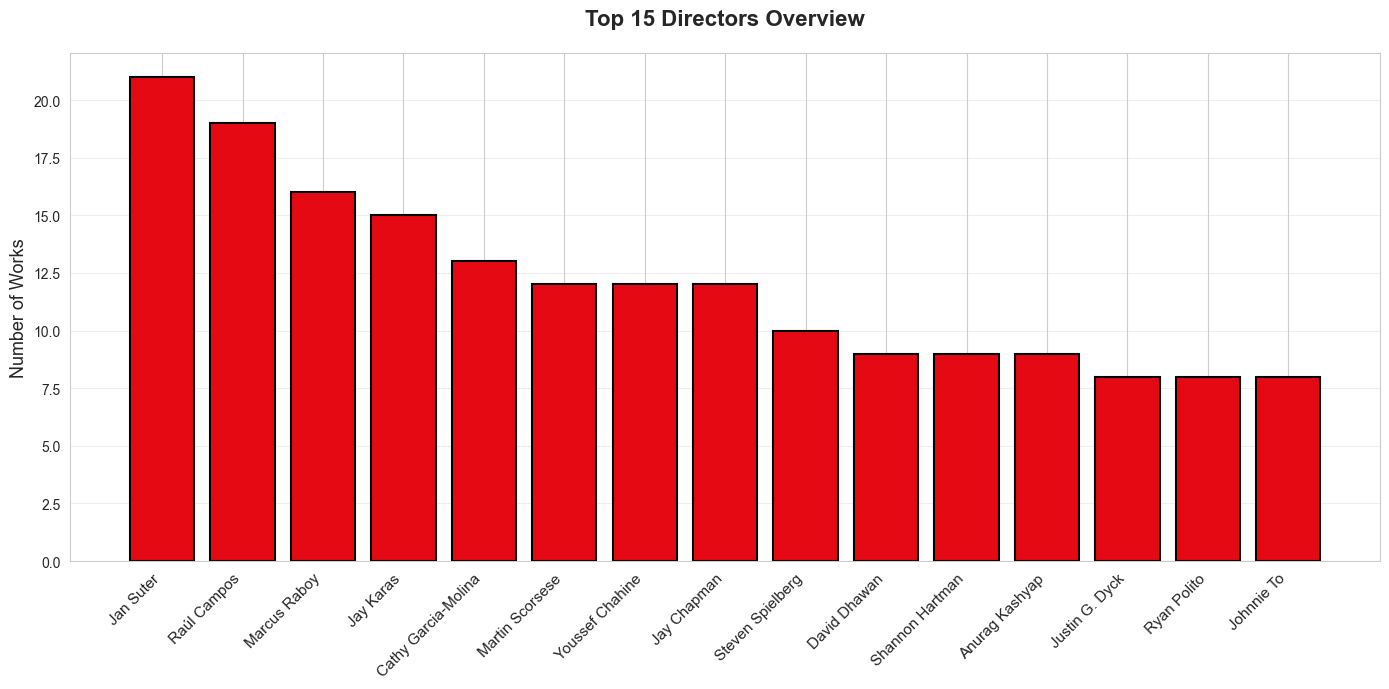

In [142]:
# Visualization 2: Top 15 directors - vertical bar
top_15_directors = director_counts.head(15)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(range(len(top_15_directors)), top_15_directors.values,
       color='#E50914', edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(top_15_directors)))
ax.set_xticklabels(top_15_directors.index, rotation=45, ha='right', fontsize=11)
ax.set_ylabel('Number of Works', fontsize=13)
ax.set_title('Top 15 Directors Overview', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Key Findings: Director Analysis

**Top Directors:**
- **Rajiv Chilaka** leads with the most titles, primarily known for animated content
- **Raúl Campos and Jan Suter** show strong presence, indicating Netflix's international director partnerships
- Multiple Indian directors in top rankings reflect investment in Bollywood and regional Indian cinema

**Industry Insights:**
- Platform provides opportunities for both established and emerging directors
- International directors have significant presence, not just Hollywood directors
- Diversity in directorial talent reflects content diversity strategy

CAST DIVERSITY ANALYSIS

Total Unique Cast Members: 32881

Top 20 Most Featured Actors:
----------------------------------------------------------------------
cast
Anupam Kher            42
Shah Rukh Khan         35
Naseeruddin Shah       30
Om Puri                30
Takahiro Sakurai       29
Akshay Kumar           29
Yuki Kaji              27
Paresh Rawal           27
Amitabh Bachchan       27
Boman Irani            27
Kareena Kapoor         25
Vincent Tong           24
Andrea Libman          24
John Cleese            24
Tara Strong            22
Ashleigh Ball          22
Nawazuddin Siddiqui    21
Ajay Devgn             21
Samuel L. Jackson      20
Kay Kay Menon          20
Name: count, dtype: int64


Diversity Evolution Over Years:
            Unique_Directors  Unique_Cast_Members
year_added                                       
2008.0                     1                    6
2009.0                     2                   18
2010.0                     1                   10
2011.0

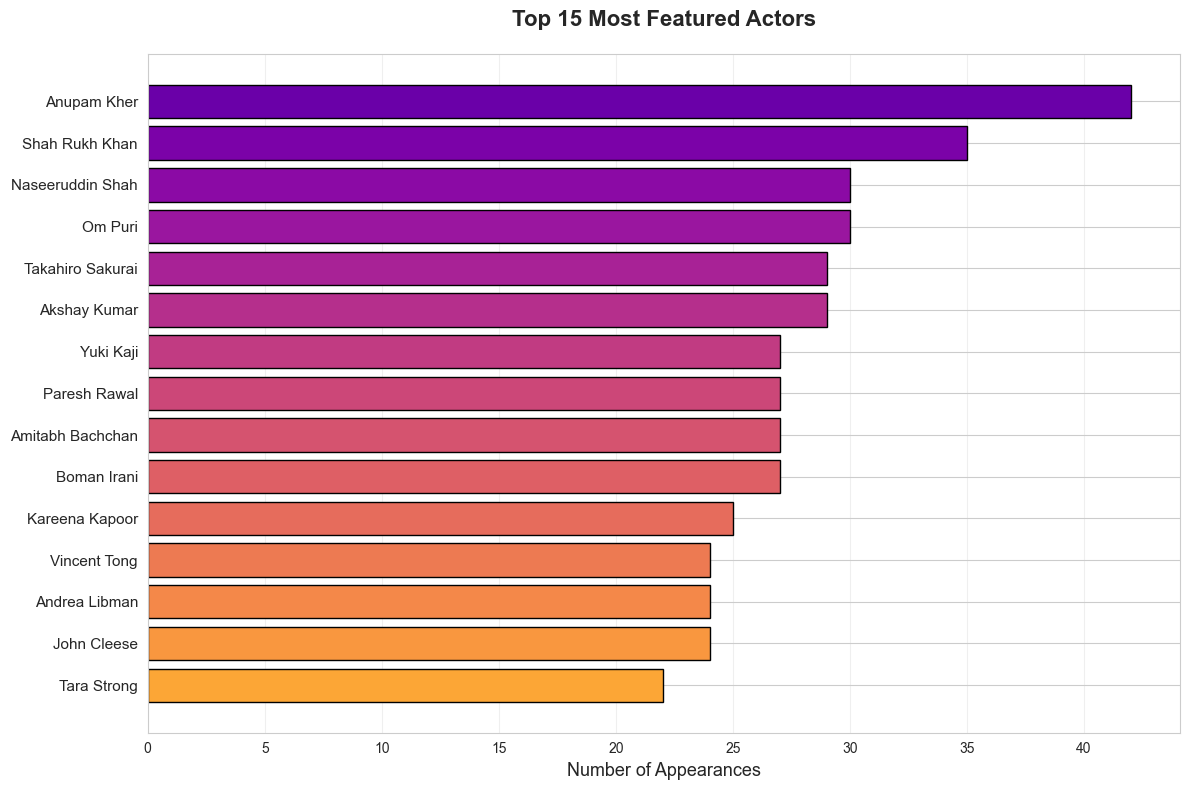

In [143]:
# Cast diversity analysis
cast_list = df['cast'].dropna().str.split(',').explode().str.strip()
cast_counts = cast_list.value_counts()

print("="*70)
print("CAST DIVERSITY ANALYSIS")
print("="*70)

print(f"\nTotal Unique Cast Members: {cast_counts.shape[0]}")
print(f"\nTop 20 Most Featured Actors:")
print("-" * 70)
print(cast_counts.head(20))

# Director and cast diversity over years
director_diversity = df.groupby('year_added')['director'].apply(
    lambda x: x.dropna().str.split(',').explode().str.strip().nunique()
)

cast_diversity = df.groupby('year_added')['cast'].apply(
    lambda x: x.dropna().str.split(',').explode().str.strip().nunique()
)

diversity_df = pd.DataFrame({
    'Unique_Directors': director_diversity,
    'Unique_Cast_Members': cast_diversity
})

print("\n\nDiversity Evolution Over Years:")
print(diversity_df)

# Visualization 1: Top cast members - horizontal bar
top_15_cast = cast_counts.head(15)
colors_cast = plt.cm.plasma(np.linspace(0.2, 0.8, len(top_15_cast)))
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.barh(range(len(top_15_cast)), top_15_cast.values,
        color=colors_cast, edgecolor='black', linewidth=1)
ax.set_yticks(range(len(top_15_cast)))
ax.set_yticklabels(top_15_cast.index, fontsize=11)
ax.set_xlabel('Number of Appearances', fontsize=13)
ax.set_title('Top 15 Most Featured Actors', fontsize=16, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

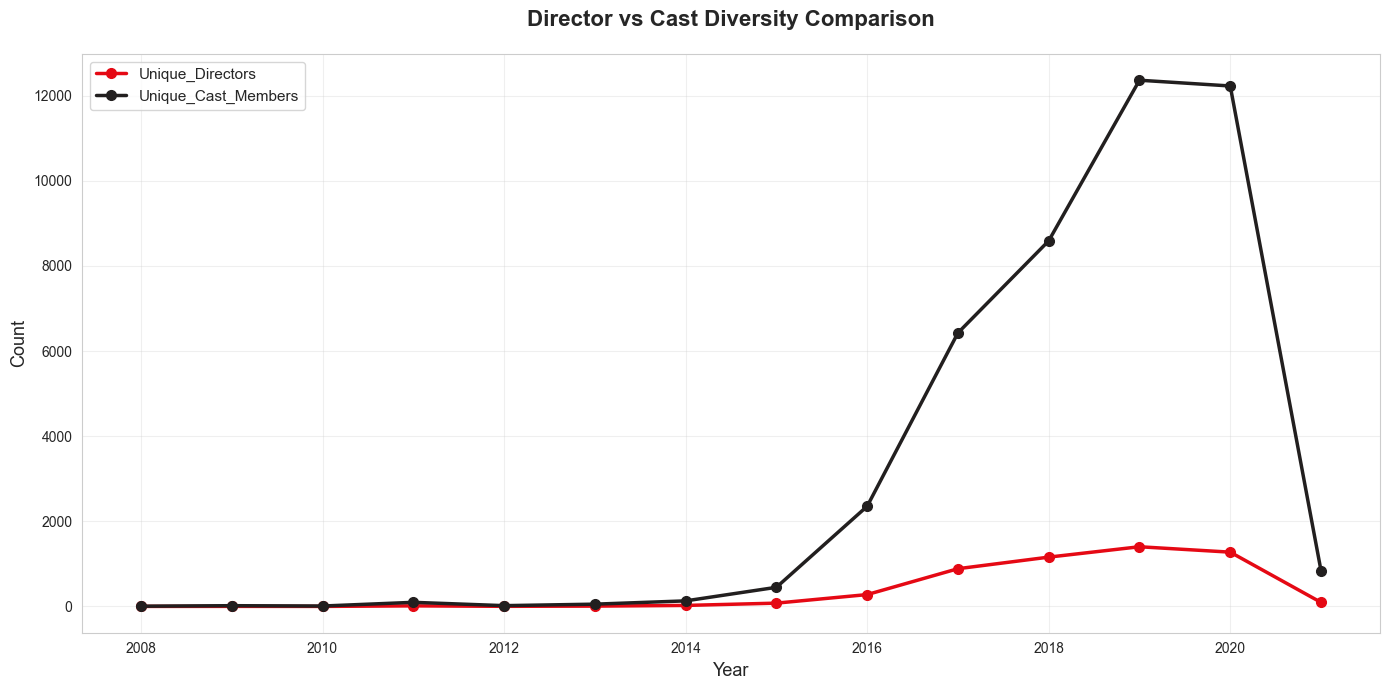

In [144]:
# Visualization 4: Combined diversity comparison
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
diversity_df.plot(ax=ax, marker='o', linewidth=2.5, markersize=7, color=['#E50914', '#221F1F'])
ax.set_title('Director vs Cast Diversity Comparison', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Count', fontsize=13)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

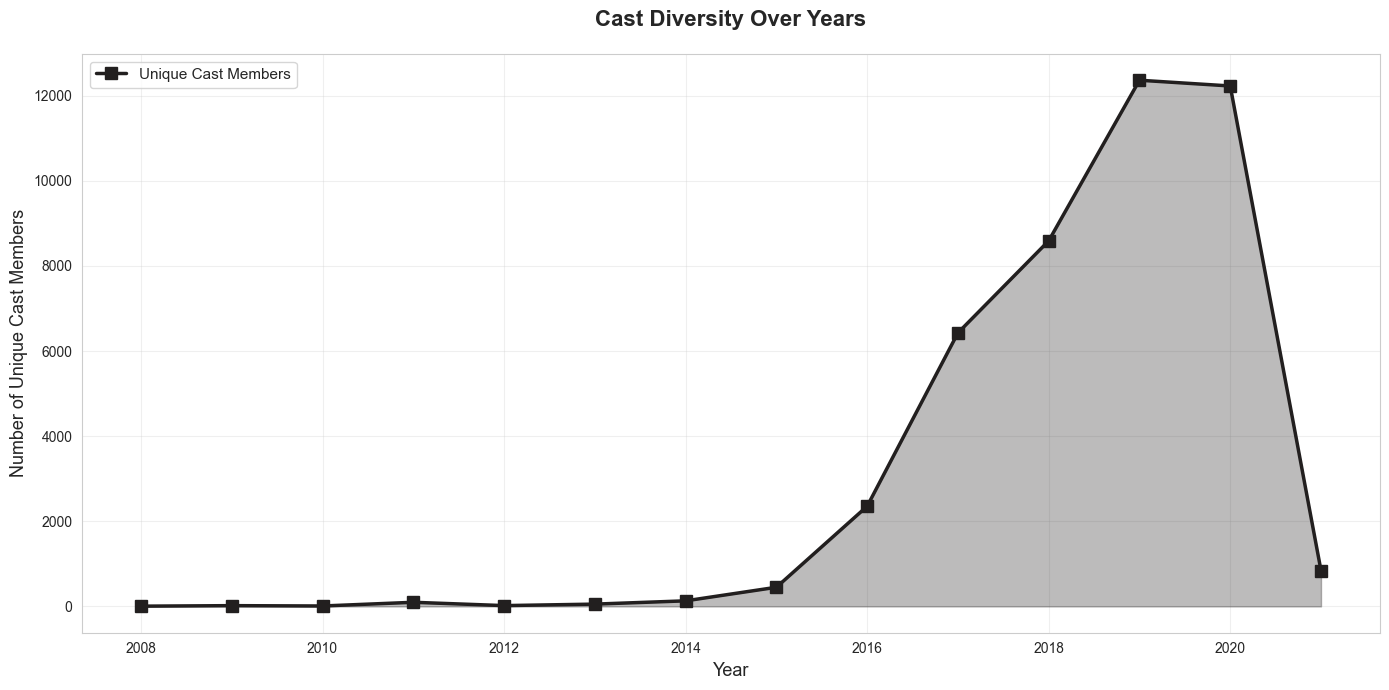

In [145]:
# Visualization 3: Cast diversity trend
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.plot(cast_diversity.index, cast_diversity.values,
        marker='s', linewidth=2.5, markersize=8, color='#221F1F', label='Unique Cast Members')
ax.fill_between(cast_diversity.index, cast_diversity.values, alpha=0.3, color='#221F1F')
ax.set_title('Cast Diversity Over Years', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Unique Cast Members', fontsize=13)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
plt.tight_layout()
plt.show()

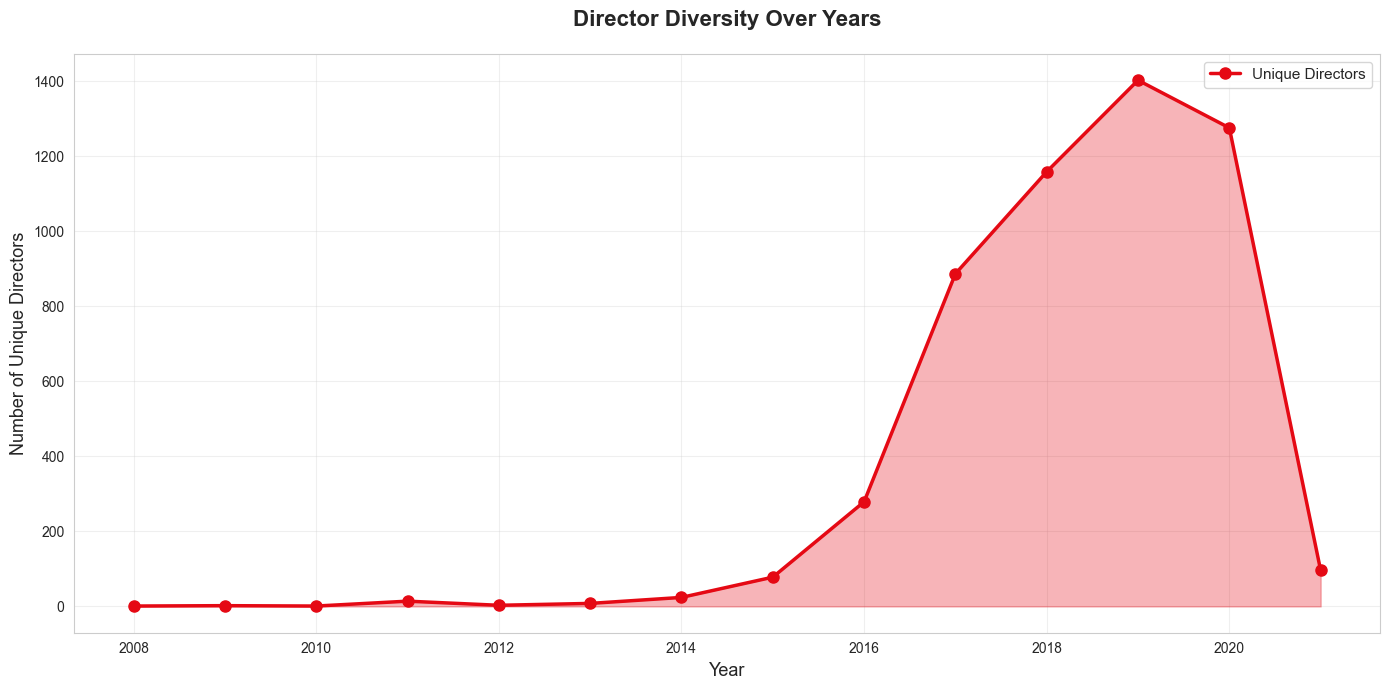

In [146]:
# Visualization 2: Director diversity trend
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.plot(director_diversity.index, director_diversity.values,
        marker='o', linewidth=2.5, markersize=8, color='#E50914', label='Unique Directors')
ax.fill_between(director_diversity.index, director_diversity.values, alpha=0.3, color='#E50914')
ax.set_title('Director Diversity Over Years', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Unique Directors', fontsize=13)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
plt.tight_layout()
plt.show()

### 📊 Key Findings: Cast Analysis

**Top Actors:**
- Cast diversity shows thousands of unique actors across the platform
- Top actors have multiple appearances, indicating recurring partnerships with Netflix
- International actors feature prominently, reflecting global content strategy

**Talent Pool:**
- Platform provides opportunities for actors across different markets and languages
- Growing cast diversity over years indicates expansion in content production
- Mix of established stars and emerging talent

## 9. Duration Analysis (Movies)

MOVIE DURATION ANALYSIS

Total Movies: 5379

Duration Statistics (in minutes):
----------------------------------------------------------------------
count    5379.000000
mean       99.306563
std        28.525684
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64


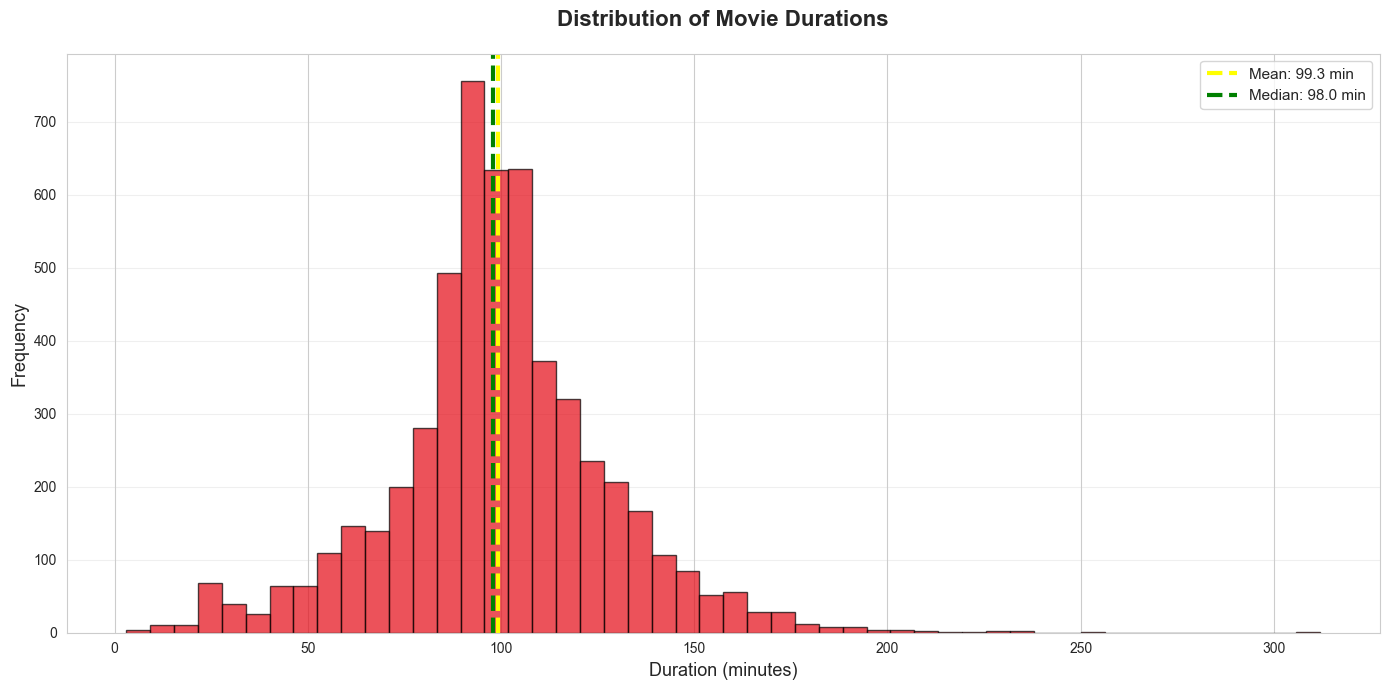

In [147]:
# Extract movie durations (in minutes)
movies_df = df[df['type'] == 'Movie'].copy()

# Extract numeric duration from "X min" format
movies_df['duration_min'] = movies_df['duration'].str.extract('(\d+)').astype(float)

print("="*70)
print("MOVIE DURATION ANALYSIS")
print("="*70)

print(f"\nTotal Movies: {len(movies_df)}")
print(f"\nDuration Statistics (in minutes):")
print("-" * 70)
print(movies_df['duration_min'].describe())

# Visualization 1: Histogram
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.hist(movies_df['duration_min'].dropna(), bins=50, color='#E50914',
        edgecolor='black', alpha=0.7)
ax.axvline(movies_df['duration_min'].mean(), color='yellow', linestyle='--',
           linewidth=3, label=f'Mean: {movies_df["duration_min"].mean():.1f} min')
ax.axvline(movies_df['duration_min'].median(), color='green', linestyle='--',
           linewidth=3, label=f'Median: {movies_df["duration_min"].median():.1f} min')
ax.set_title('Distribution of Movie Durations', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Duration (minutes)', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Key Findings: Movie Duration Analysis

- **Typical Movie Length**: The majority of Netflix movies fall between 80-110 minutes, with a clear peak around 90-95 minutes, indicating the platform's preference for standard feature-length content
- **Mean vs Median**: The mean duration (yellow line) is slightly higher than the median (green line), suggesting a right-skewed distribution with some longer films pulling the average up
- **Duration Range**: Movies span from under 10 minutes (short films) to over 200 minutes (epic films), but the distribution heavily concentrates in the 80-120 minute range, which is the sweet spot for viewer engagement

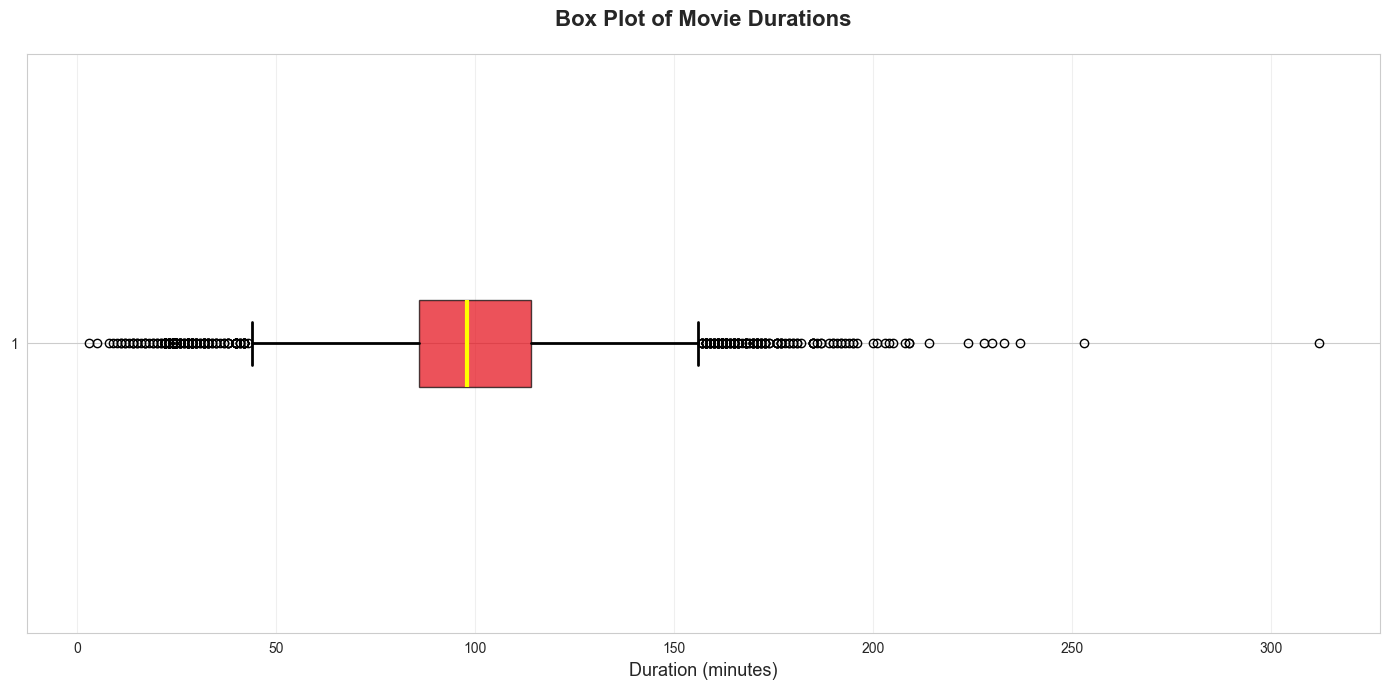

In [148]:
# Visualization 2: Box Plot
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.boxplot(movies_df['duration_min'].dropna(), vert=False,
           patch_artist=True,
           boxprops=dict(facecolor='#E50914', alpha=0.7),
           whiskerprops=dict(color='black', linewidth=2),
           capprops=dict(color='black', linewidth=2),
           medianprops=dict(color='yellow', linewidth=3))
ax.set_title('Box Plot of Movie Durations', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Duration (minutes)', fontsize=13)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

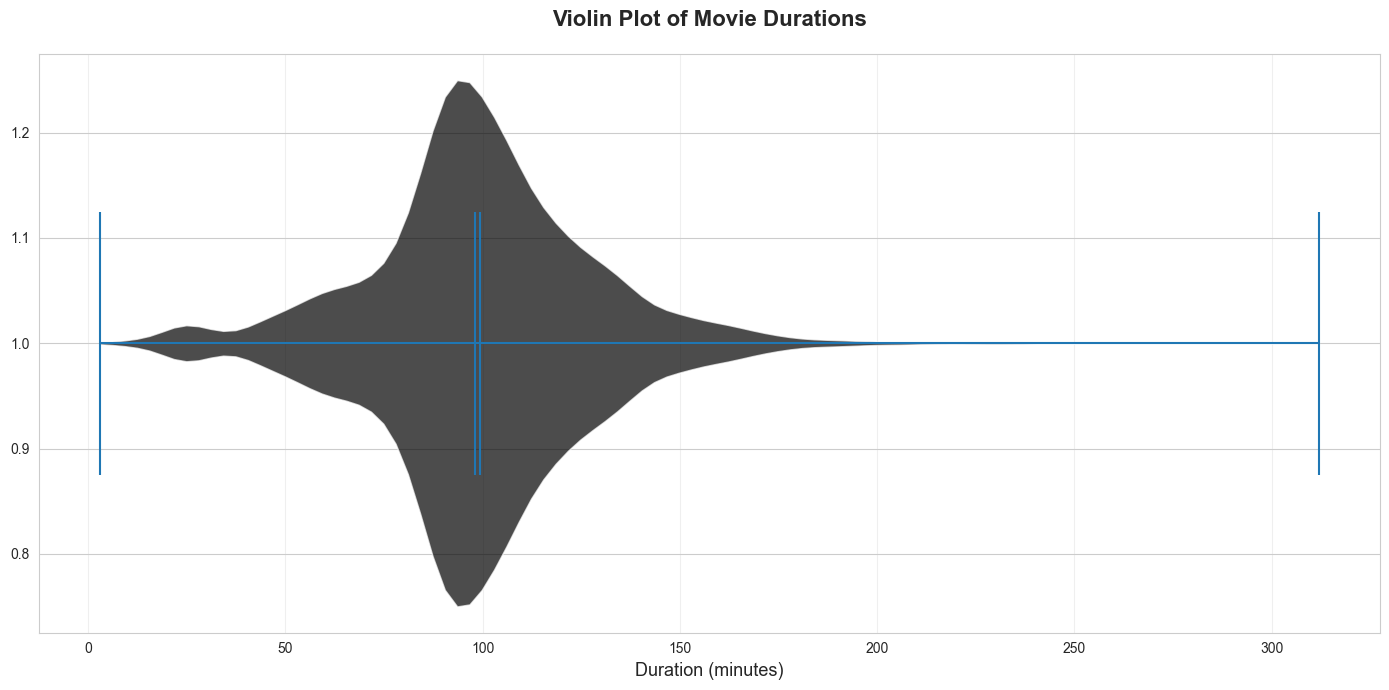

In [149]:
# Visualization 3: Violin Plot
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
parts = ax.violinplot([movies_df['duration_min'].dropna()], vert=False,
                       showmeans=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_facecolor('black')
    pc.set_alpha(0.7)
ax.set_title('Violin Plot of Movie Durations', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Duration (minutes)', fontsize=13)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

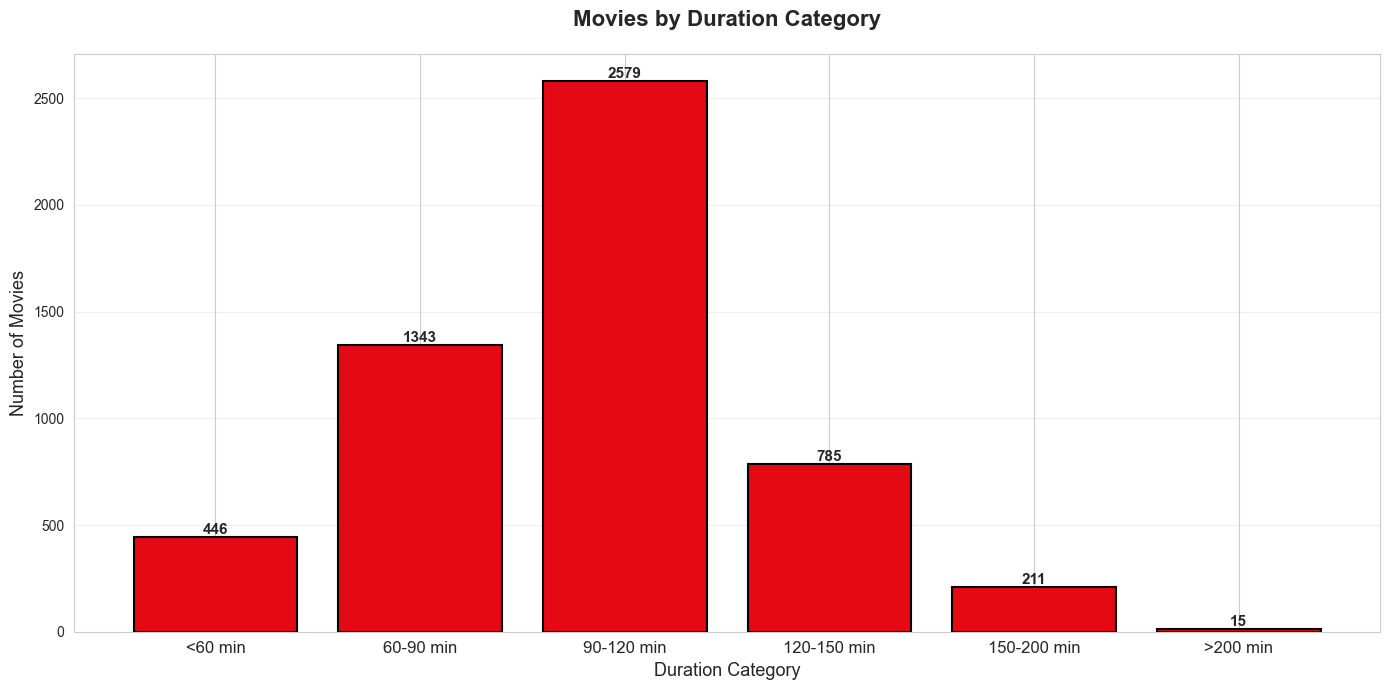

In [150]:
# Visualization 4: Duration Categories
duration_categories = pd.cut(movies_df['duration_min'],
                             bins=[0, 60, 90, 120, 150, 200, float('inf')],
                             labels=['<60 min', '60-90 min', '90-120 min',
                                    '120-150 min', '150-200 min', '>200 min'])

category_counts = duration_categories.value_counts().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
bars = ax.bar(range(len(category_counts)), category_counts.values,
              color='#E50914', edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(category_counts)))
ax.set_xticklabels(category_counts.index, fontsize=12)
ax.set_title('Movies by Duration Category', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Duration Category', fontsize=13)
ax.set_ylabel('Number of Movies', fontsize=13)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

MOVIE DURATION TRENDS OVER YEARS

                   mean  median  count
year_added                           
2008.0       81.000000    81.0      1
2009.0       66.500000    66.5      2
2010.0       84.000000    84.0      1
2011.0       93.461538    94.0     13
2012.0       62.000000    76.0      3
2013.0       83.500000    77.5      6
2014.0       77.000000    78.0     19
2015.0       82.758621    81.0     58
2016.0       83.879845    89.0    258
2017.0       95.833333    95.0    864
2018.0      101.719522   100.0   1255
2019.0      100.520694    99.0   1498
2020.0      101.760091   101.0   1313
2021.0      107.011364   102.0     88


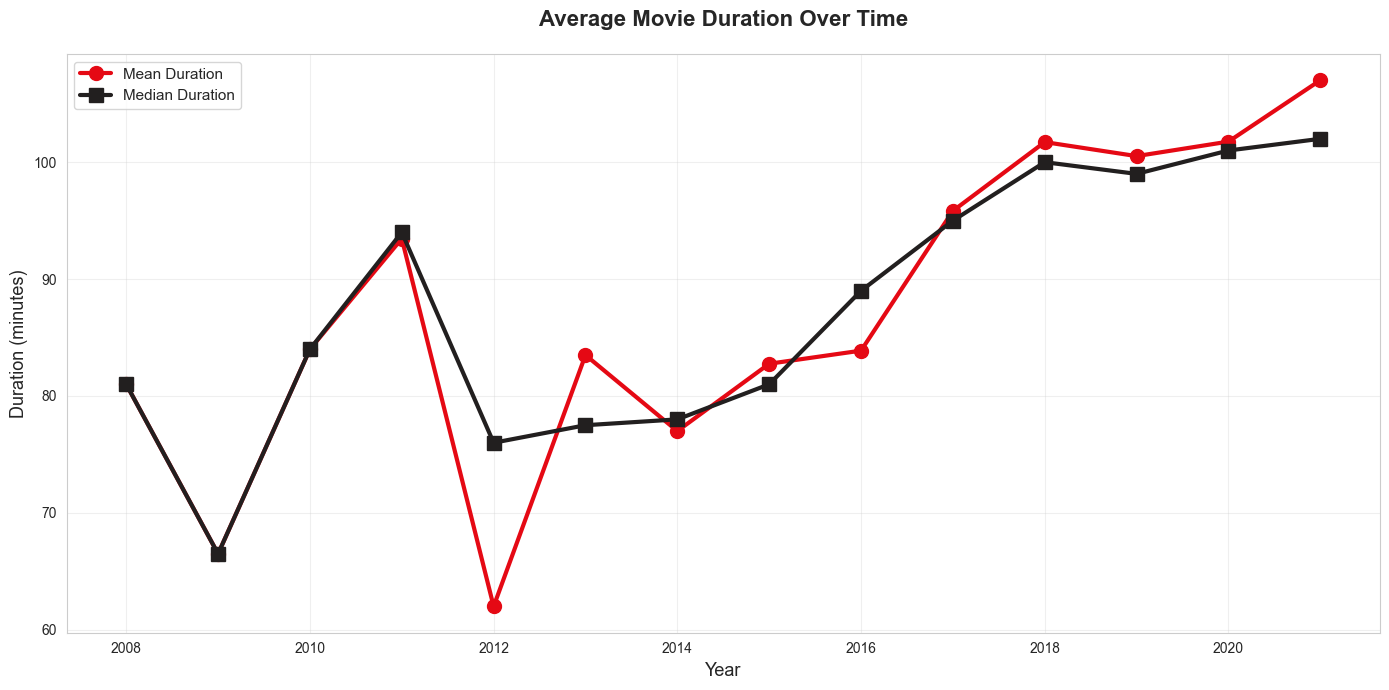

In [151]:
# Movie duration trends over years
movies_yearly = movies_df[movies_df['year_added'].notna()].groupby('year_added')['duration_min'].agg(['mean', 'median', 'count'])

print("="*70)
print("MOVIE DURATION TRENDS OVER YEARS")
print("="*70)
print("\n", movies_yearly)

# Visualization 1: Average duration trend
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.plot(movies_yearly.index, movies_yearly['mean'], marker='o',
        linewidth=3, markersize=10, color='#E50914', label='Mean Duration')
ax.plot(movies_yearly.index, movies_yearly['median'], marker='s',
        linewidth=3, markersize=10, color='#221F1F', label='Median Duration')
ax.set_title('Average Movie Duration Over Time', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Duration (minutes)', fontsize=13)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Key Findings: Duration Trends Over Time

- **Declining Duration**: Both mean and median movie durations show a declining trend over the years, with recent additions averaging shorter runtimes than older content
- **Convergence Pattern**: The mean and median lines track closely together, indicating a relatively symmetric distribution of movie lengths across all time periods
- **Modern Preference**: Netflix's recent acquisitions favor shorter, more digestible content (under 100 minutes), aligning with modern viewing habits and binge-watching culture

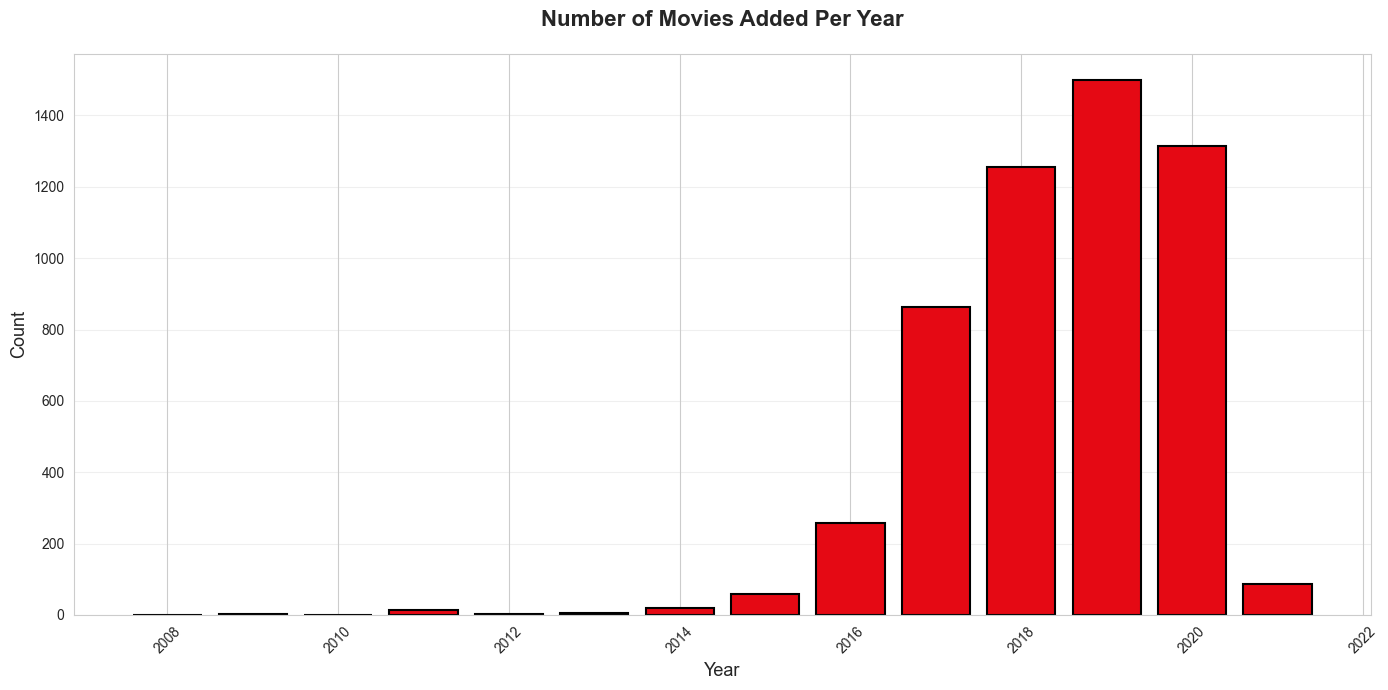

In [152]:
# Visualization 2: Number of movies by year
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(movies_yearly.index, movies_yearly['count'], color='#E50914',
       edgecolor='black', linewidth=1.5)
ax.set_title('Number of Movies Added Per Year', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Count', fontsize=13)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

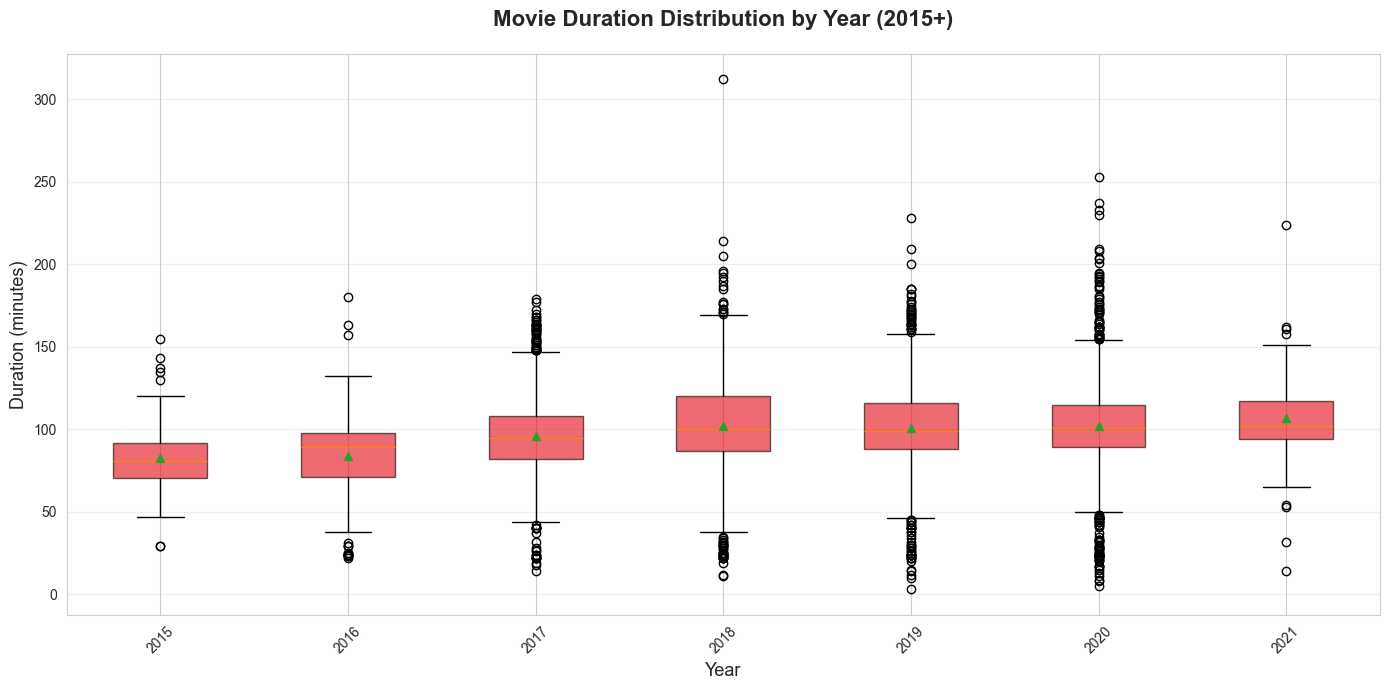

In [153]:
# Visualization 3: Box plot by year (2015+)
recent_years = movies_df[movies_df['year_added'] >= 2015]
recent_years_list = sorted(recent_years['year_added'].dropna().unique())
duration_by_year = [recent_years[recent_years['year_added'] == year]['duration_min'].dropna().values
                     for year in recent_years_list]

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
bp = ax.boxplot(duration_by_year, labels=[int(y) for y in recent_years_list],
                patch_artist=True, showmeans=True)
for patch in bp['boxes']:
    patch.set_facecolor('#E50914')
    patch.set_alpha(0.6)
ax.set_title('Movie Duration Distribution by Year (2015+)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Duration (minutes)', fontsize=13)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

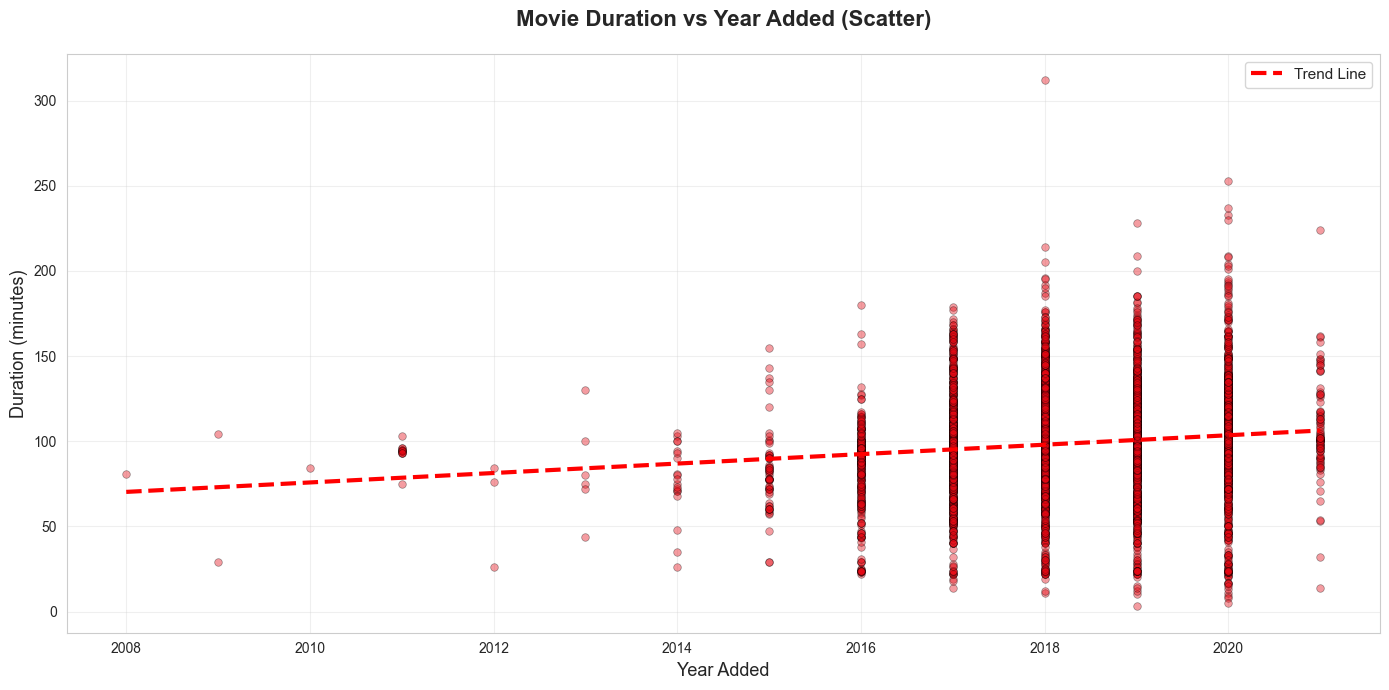

In [154]:
# Visualization 4: Scatter plot with trend line
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.scatter(movies_df['year_added'], movies_df['duration_min'],
           alpha=0.4, s=30, color='#E50914', edgecolors='black', linewidth=0.5)

# Add trend line
z = np.polyfit(movies_df['year_added'].dropna(), movies_df.loc[movies_df['year_added'].notna(), 'duration_min'], 1)
p = np.poly1d(z)
ax.plot(movies_yearly.index, p(movies_yearly.index), "r--", linewidth=3, label='Trend Line')

ax.set_title('Movie Duration vs Year Added (Scatter)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year Added', fontsize=13)
ax.set_ylabel('Duration (minutes)', fontsize=13)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 10. TV Show Seasons Analysis

TV SHOW SEASONS ANALYSIS

Total TV Shows: 2410

Seasons Statistics:
----------------------------------------------------------------------
count    2410.000000
mean        1.775934
std         1.596359
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: num_seasons, dtype: float64


Distribution by Number of Seasons:
num_seasons
1.0     1608
2.0      382
3.0      184
4.0       87
5.0       58
6.0       30
7.0       19
8.0       18
9.0        8
10.0       6
11.0       3
12.0       2
13.0       2
15.0       2
16.0       1
Name: count, dtype: int64


Most Common: 1 Season(s)
Maximum Seasons: 16 Seasons


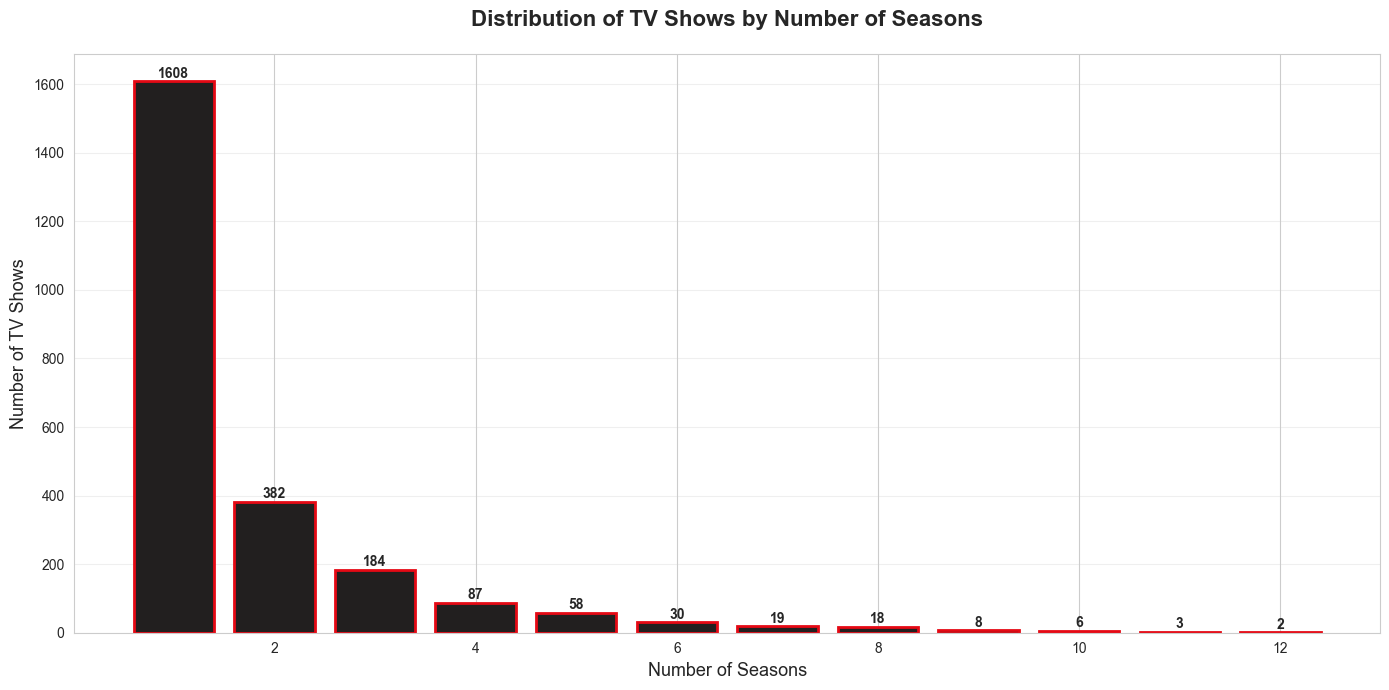

In [155]:
# Extract TV Show seasons
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# Extract numeric seasons from "X Season(s)" format
tv_shows_df['num_seasons'] = tv_shows_df['duration'].str.extract('(\d+)').astype(float)

print("="*70)
print("TV SHOW SEASONS ANALYSIS")
print("="*70)

print(f"\nTotal TV Shows: {len(tv_shows_df)}")
print(f"\nSeasons Statistics:")
print("-" * 70)
print(tv_shows_df['num_seasons'].describe())

# Distribution of seasons
seasons_distribution = tv_shows_df['num_seasons'].value_counts().sort_index()
print("\n\nDistribution by Number of Seasons:")
print(seasons_distribution.head(15))

print(f"\n\nMost Common: {seasons_distribution.idxmax():.0f} Season(s)")
print(f"Maximum Seasons: {tv_shows_df['num_seasons'].max():.0f} Seasons")

# Visualization 1: Bar chart - season distribution
seasons_dist_plot = seasons_distribution.head(12)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(seasons_dist_plot.index, seasons_dist_plot.values,
       color='#221F1F', edgecolor='#E50914', linewidth=2)
ax.set_title('Distribution of TV Shows by Number of Seasons', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Number of Seasons', fontsize=13)
ax.set_ylabel('Number of TV Shows', fontsize=13)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for idx, val in zip(seasons_dist_plot.index, seasons_dist_plot.values):
    ax.text(idx, val + 10, str(val), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 📊 Key Findings: TV Show Seasons

- **Single Season Dominance**: The vast majority of TV shows on Netflix have just 1 season, indicating a high volume of limited series, mini-series, or shows that were canceled after their debut
- **Long-Running Shows Rare**: Multi-season shows (3+ seasons) become progressively less common, with very few shows exceeding 10 seasons on the platform
- **Content Strategy**: Netflix's TV catalog prioritizes fresh, short-form content over long-running series, possibly to maintain variety and cater to diverse audience preferences

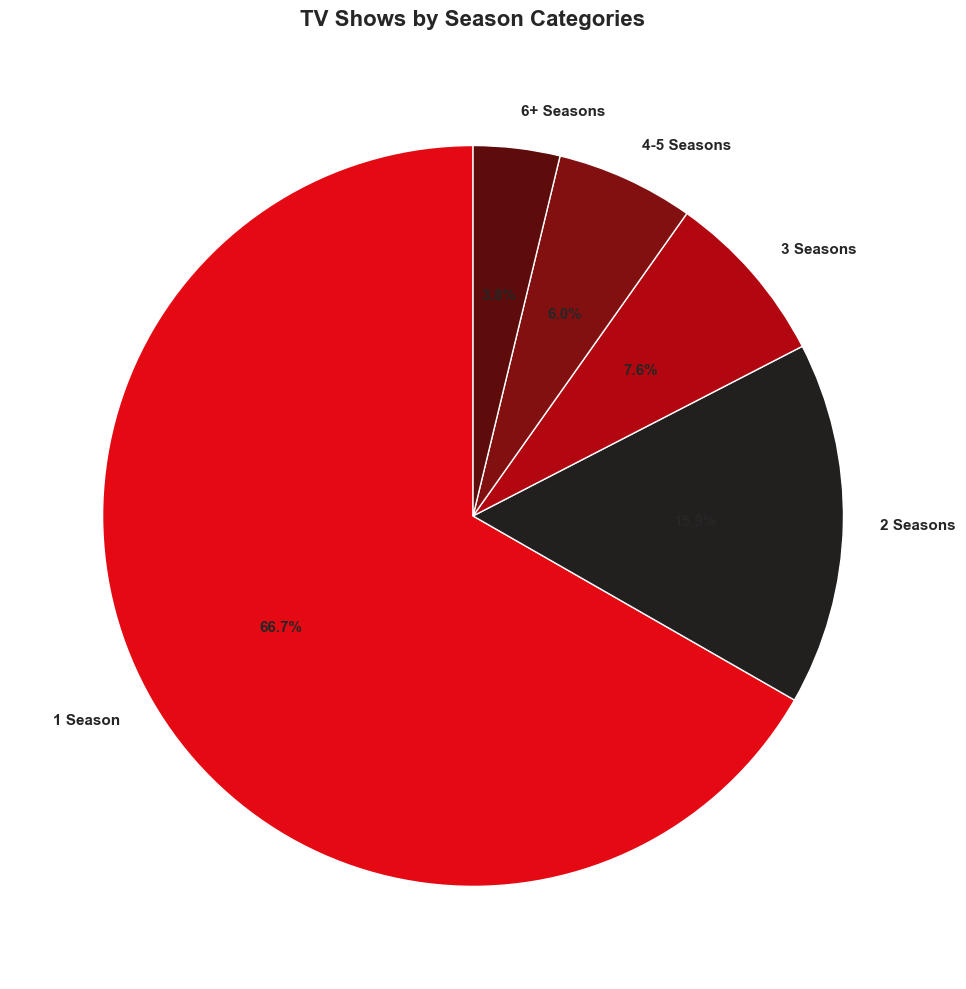

In [156]:
# Visualization 2: Pie chart - grouped categories
season_categories = pd.cut(tv_shows_df['num_seasons'], bins=[0, 1, 2, 3, 5, 20],
                            labels=['1 Season', '2 Seasons', '3 Seasons', '4-5 Seasons', '6+ Seasons'])
season_cat_counts = season_categories.value_counts()

colors_pie = ['#E50914', '#221F1F', '#B20710', '#831010', '#5E0B0B']
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.pie(season_cat_counts.values, labels=season_cat_counts.index, autopct='%1.1f%%',
       startangle=90, colors=colors_pie, textprops={'fontsize':11, 'fontweight': 'bold'})
ax.set_title('TV Shows by Season Categories', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

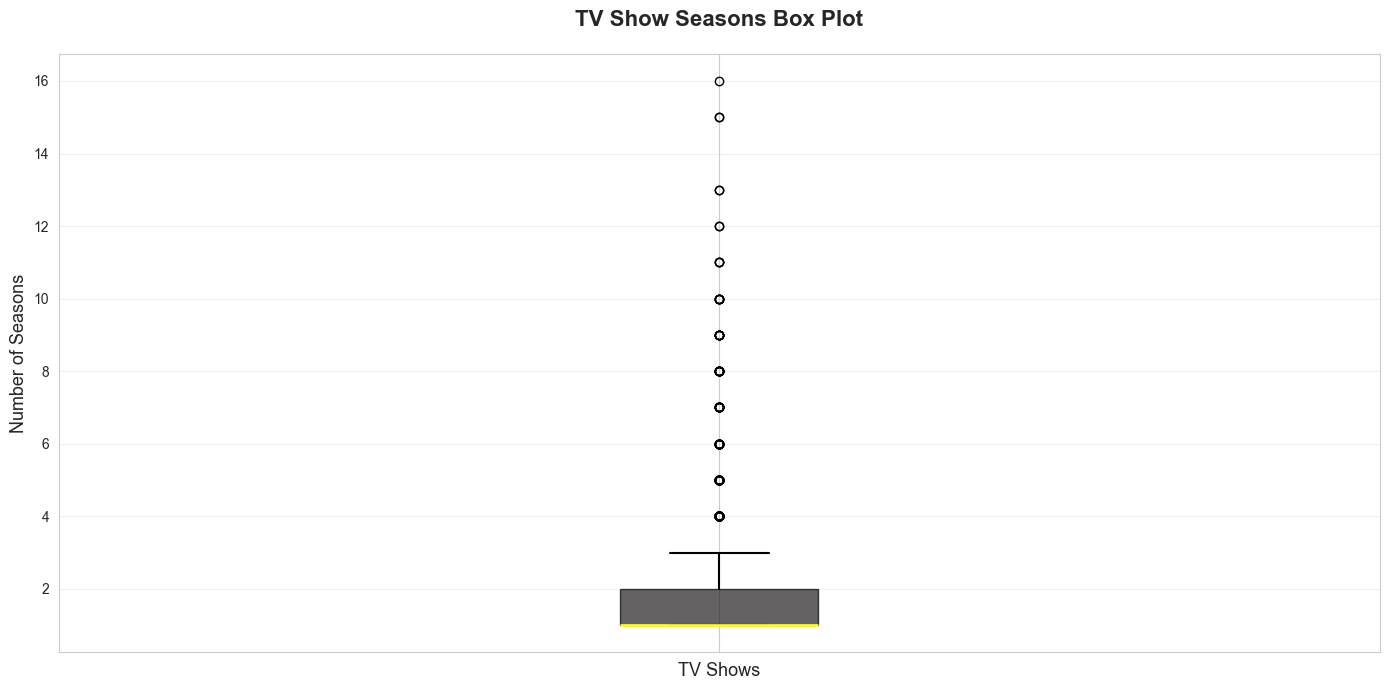

In [157]:
# Visualization 3: Box plot
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.boxplot(tv_shows_df['num_seasons'].dropna(), vert=True, patch_artist=True,
           boxprops=dict(facecolor='#221F1F', alpha=0.7),
           medianprops=dict(color='yellow', linewidth=2),
           whiskerprops=dict(linewidth=1.5),
           capprops=dict(linewidth=1.5))
ax.set_title('TV Show Seasons Box Plot', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Number of Seasons', fontsize=13)
ax.set_xticks([1])
ax.set_xticklabels(['TV Shows'], fontsize=13)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 11. Content Rating Analysis

CONTENT RATING ANALYSIS

Total Unique Ratings: 14

Rating Distribution:
----------------------------------------------------------------------
rating
TV-MA       2865
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64


Rating Distribution by Content Type:
type      Movie  TV Show
rating                  
G            39        0
NC-17         3        0
NR           79        5
PG          247        0
PG-13       386        0
R           663        2
TV-14      1272      659
TV-G        111       83
TV-MA      1847     1018
TV-PG       505      301
TV-Y        117      163
TV-Y7        95      176
TV-Y7-FV      5        1
UR            5        0


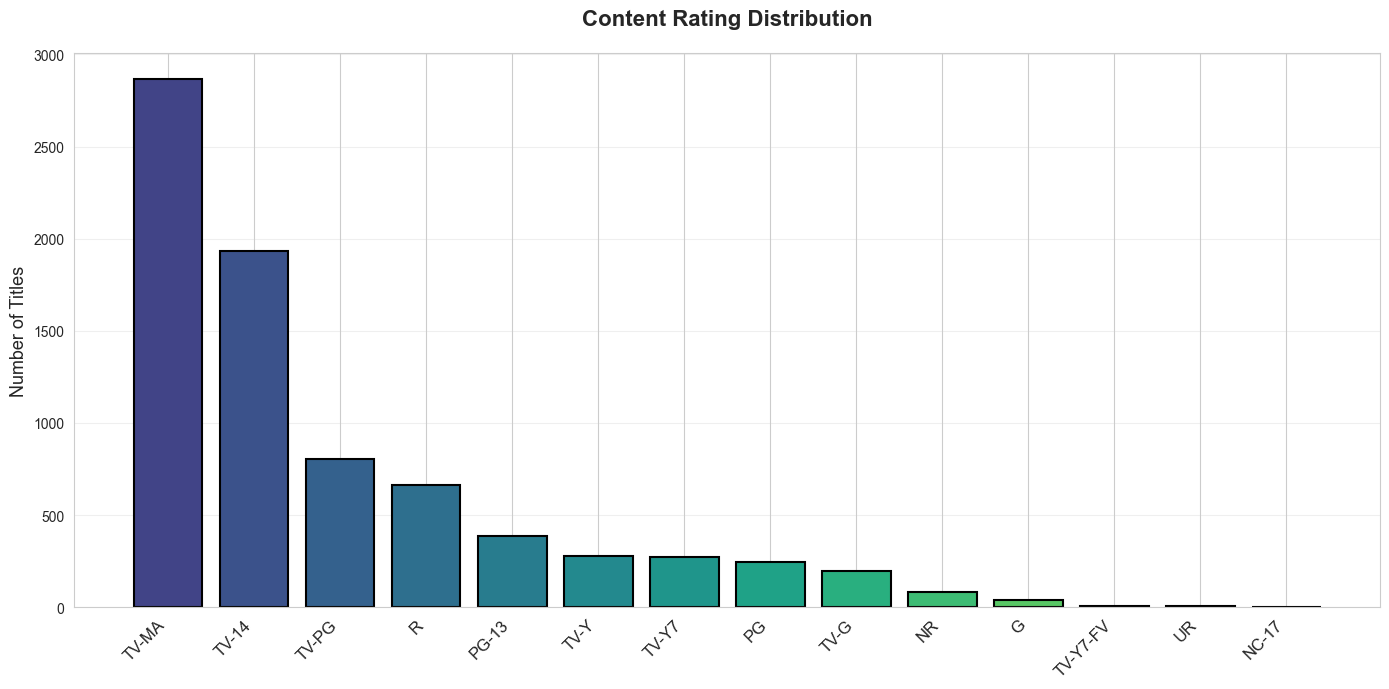

In [158]:
# Content rating analysis
rating_counts = df['rating'].value_counts()

print("="*70)
print("CONTENT RATING ANALYSIS")
print("="*70)

print(f"\nTotal Unique Ratings: {rating_counts.shape[0]}")
print(f"\nRating Distribution:")
print("-" * 70)
print(rating_counts)

# Rating by content type
rating_by_type = pd.crosstab(df['rating'], df['type'])
print("\n\nRating Distribution by Content Type:")
print(rating_by_type)

# Visualization 1: Overall rating distribution - bar chart
top_ratings = rating_counts.head(15)
colors_rating = plt.cm.viridis(np.linspace(0.2, 0.9, len(top_ratings)))
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(range(len(top_ratings)), top_ratings.values,
       color=colors_rating, edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(top_ratings)))
ax.set_xticklabels(top_ratings.index, rotation=45, ha='right', fontsize=12)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.set_title('Content Rating Distribution', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Key Findings: Content Rating Distribution

**Audience Targeting:**
- **TV-MA (Mature Audience)** dominates, indicating Netflix's focus on adult-oriented content
- **TV-14** and **TV-PG** also rank high, showing significant family-friendly content
- **R-rated movies** have strong representation, aligning with adult content strategy

**Strategic Observations:**
- Netflix balances mature content with family programming to appeal to diverse households
- The rating distribution reflects a core demographic of adults while maintaining content for younger audiences
- International content often carries different rating standards, contributing to variety

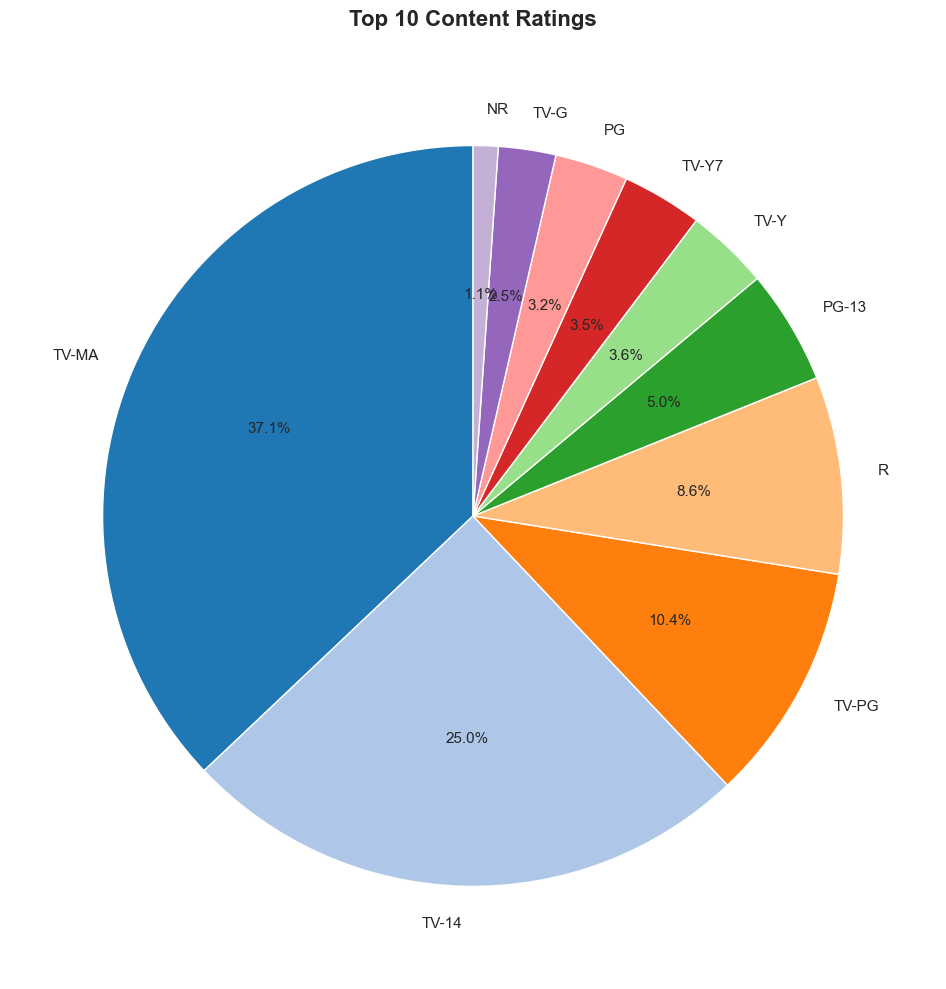

In [159]:
# Visualization 2: Pie chart - Top 10 ratings
top_10_ratings = rating_counts.head(10)
colors_pie_rating = plt.cm.tab20(range(len(top_10_ratings)))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.pie(top_10_ratings.values, labels=top_10_ratings.index, autopct='%1.1f%%',
       startangle=90, colors=colors_pie_rating, textprops={'fontsize': 11})
ax.set_title('Top 10 Content Ratings', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

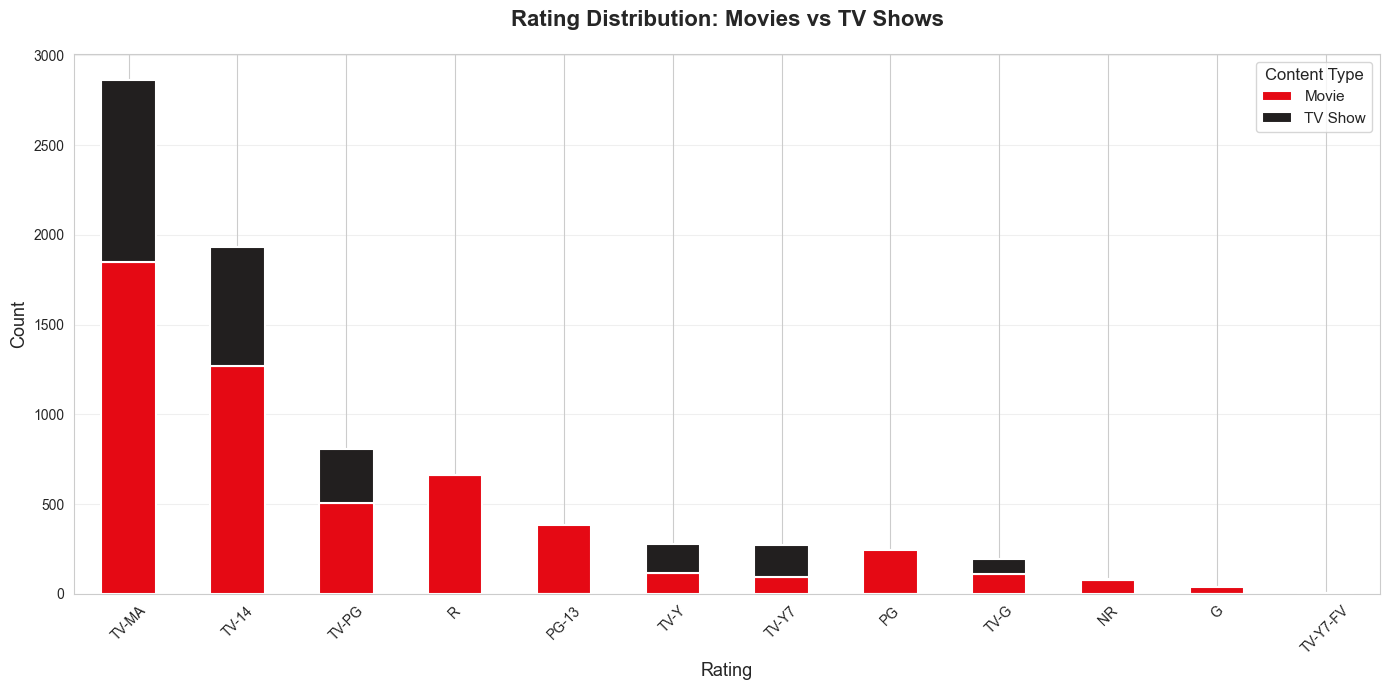

In [160]:
# Visualization 3: Stacked bar - Rating by type
rating_by_type_top = rating_by_type.loc[rating_counts.head(12).index]
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
rating_by_type_top.plot(kind='bar', stacked=True, ax=ax,
                        color=['#E50914', '#221F1F'], edgecolor='white', linewidth=1.5)
ax.set_title('Rating Distribution: Movies vs TV Shows', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Rating', fontsize=13)
ax.set_ylabel('Count', fontsize=13)
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Content Type', fontsize=11, title_fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

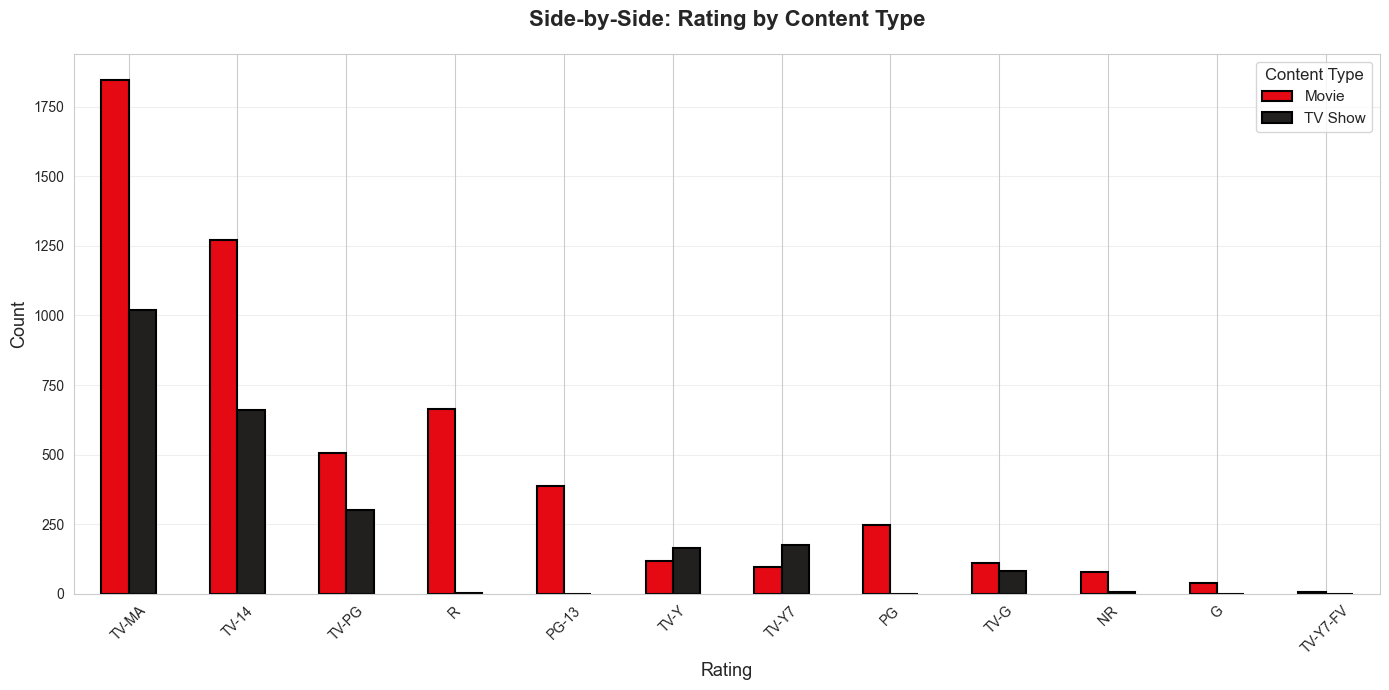

In [161]:
# Visualization 4: Grouped bar - Side by side comparison
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
rating_by_type_top.plot(kind='bar', ax=ax,
                        color=['#E50914', '#221F1F'], edgecolor='black', linewidth=1.5)
ax.set_title('Side-by-Side: Rating by Content Type', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Rating', fontsize=13)
ax.set_ylabel('Count', fontsize=13)
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Content Type', fontsize=11, title_fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

RATING TRENDS OVER YEARS

 rating      TV-MA  TV-14  TV-PG    R  PG-13  TV-Y  TV-Y7  PG
year_added                                                  
2008.0          2      0      0    0      0     0      0   0
2009.0          2      0      0    0      0     0      0   0
2010.0          0      0      0    0      0     0      0   0
2011.0          3      5      5    0      0     0      0   0
2012.0          0      0      1    1      0     0      0   1
2013.0          3      1      0    0      0     0      0   1
2014.0         12      2      3    0      0     2      0   3
2015.0         27     12      7    3      2     7      4   2
2016.0        161     96     51   14      6    11     46   3
2017.0        452    332    167   66     26    35     46  20
2018.0        653    455    188  131     55    38     45  34
2019.0        787    517    205  226    146    58     57  85
2020.0        713    463    152  199    132   117     66  89
2021.0         26     21      2   25     19     5      3  

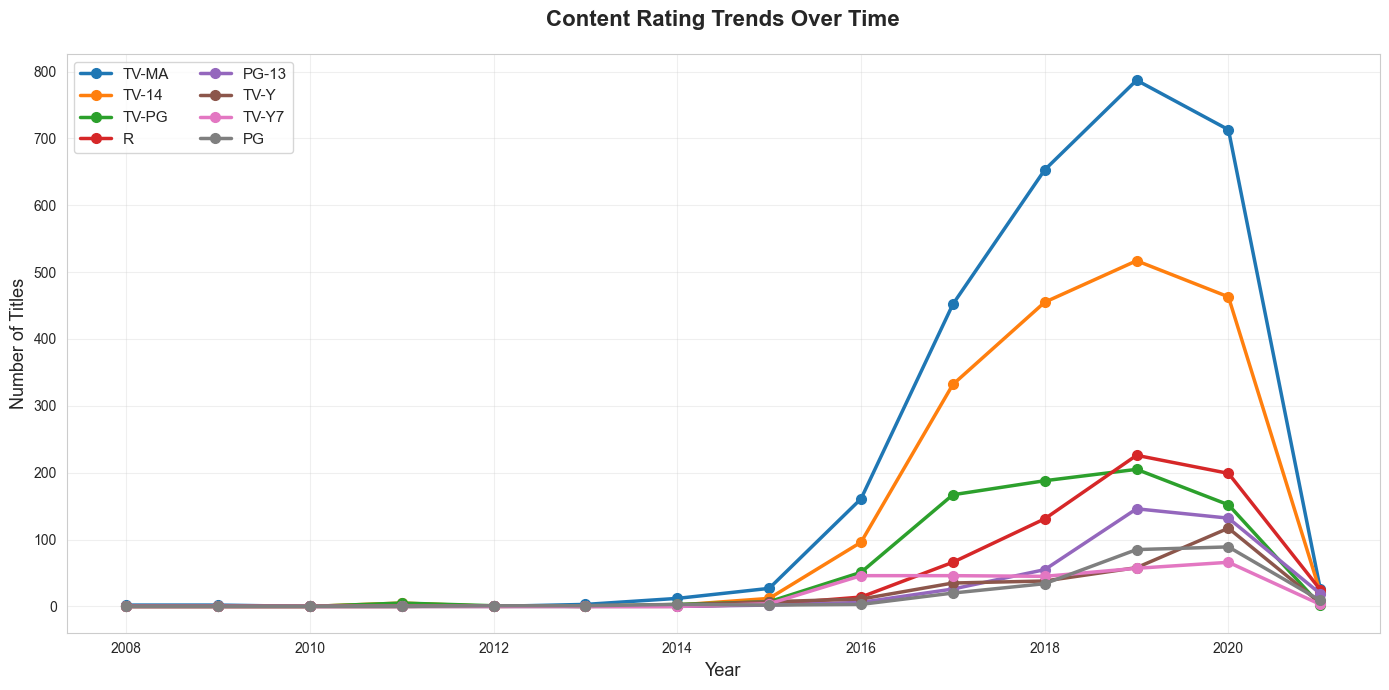

In [162]:
# Rating trends over time
rating_yearly = df.groupby(['year_added', 'rating']).size().unstack(fill_value=0)

# Focus on top 8 ratings for clarity
top_8_ratings = rating_counts.head(8).index.tolist()
rating_yearly_top = rating_yearly[top_8_ratings]

print("="*70)
print("RATING TRENDS OVER YEARS")
print("="*70)
print("\n", rating_yearly_top)

# Visualization 1: Line plot for top ratings
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
for rating in top_8_ratings:
    ax.plot(rating_yearly_top.index, rating_yearly_top[rating],
            marker='o', linewidth=2.5, label=rating, markersize=7)

ax.set_title('Content Rating Trends Over Time', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.legend(loc='best', fontsize=11, ncol=2)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Key Findings: Rating Trends Over Time

- **TV-MA Growth**: TV-MA rated content shows consistent growth over the years, reflecting Netflix's focus on mature, adult-oriented programming to differentiate from traditional broadcast television
- **Family Content Stability**: TV-PG and PG-13 ratings maintain steady presence, indicating Netflix's commitment to family-friendly content alongside its mature offerings
- **Rating Diversity**: Multiple rating categories grow in parallel, demonstrating Netflix's strategy to serve all audience segments rather than focusing on a single demographic

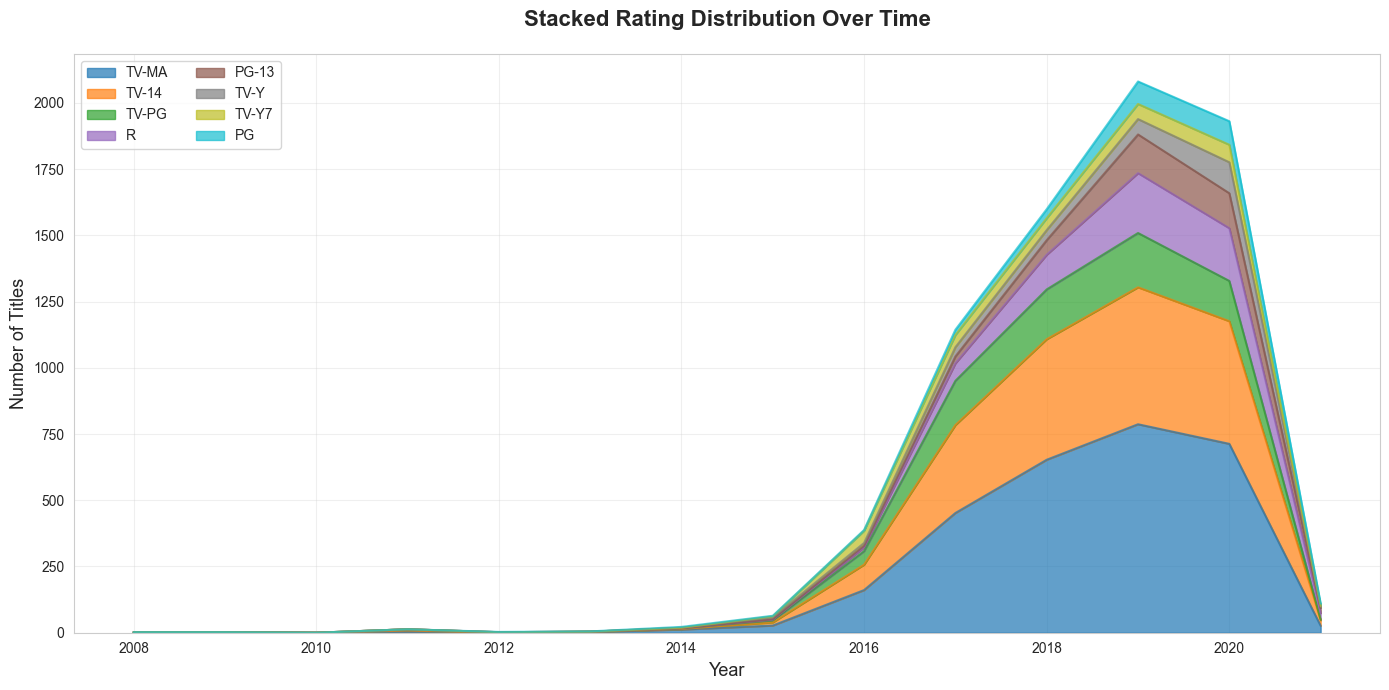

In [163]:
# Visualization 2: Stacked area chart
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
rating_yearly_top.plot(kind='area', stacked=True, ax=ax, alpha=0.7, colormap='tab10')
ax.set_title('Stacked Rating Distribution Over Time', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.legend(loc='upper left', fontsize=10, ncol=2)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

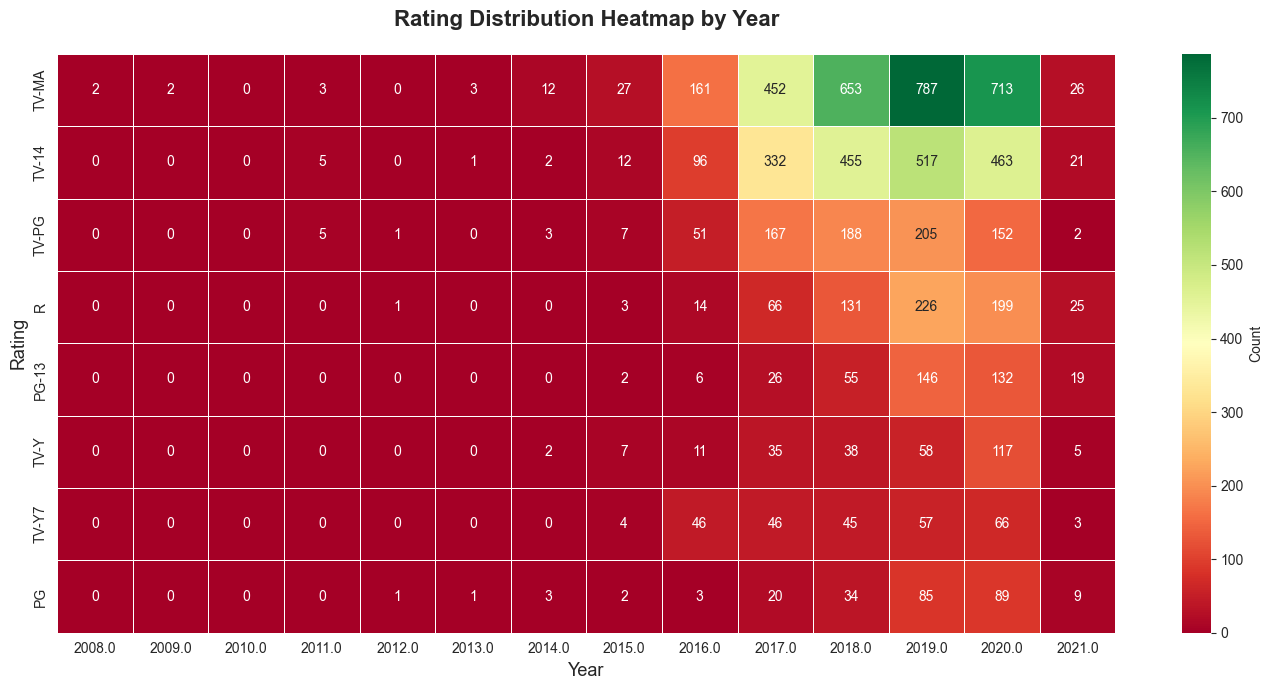

In [164]:
# Visualization 3: Heatmap
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.heatmap(rating_yearly_top.T, annot=True, fmt='d', cmap='RdYlGn',
            cbar_kws={'label': 'Count'}, ax=ax, linewidths=0.5)
ax.set_title('Rating Distribution Heatmap by Year', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Rating', fontsize=13)
plt.tight_layout()
plt.show()

## 12. Genre vs Duration Analysis

MOVIE DURATION BY GENRE

                                 mean  median  count
genre                                              
Dramas                    113.364326   109.0   2108
Action & Adventure        113.282940   108.0    721
International Movies      110.803037   107.0   2437
Romantic Movies           110.704331   106.0    531
Thrillers                 106.851626   103.0    492
Comedies                  104.544158   101.0   1472
Independent Movies        100.739259    97.0    675
Documentaries              81.376590    86.0    786
Children & Family Movies   79.716165    87.0    532
Stand-Up Comedy            67.060790    65.0    329


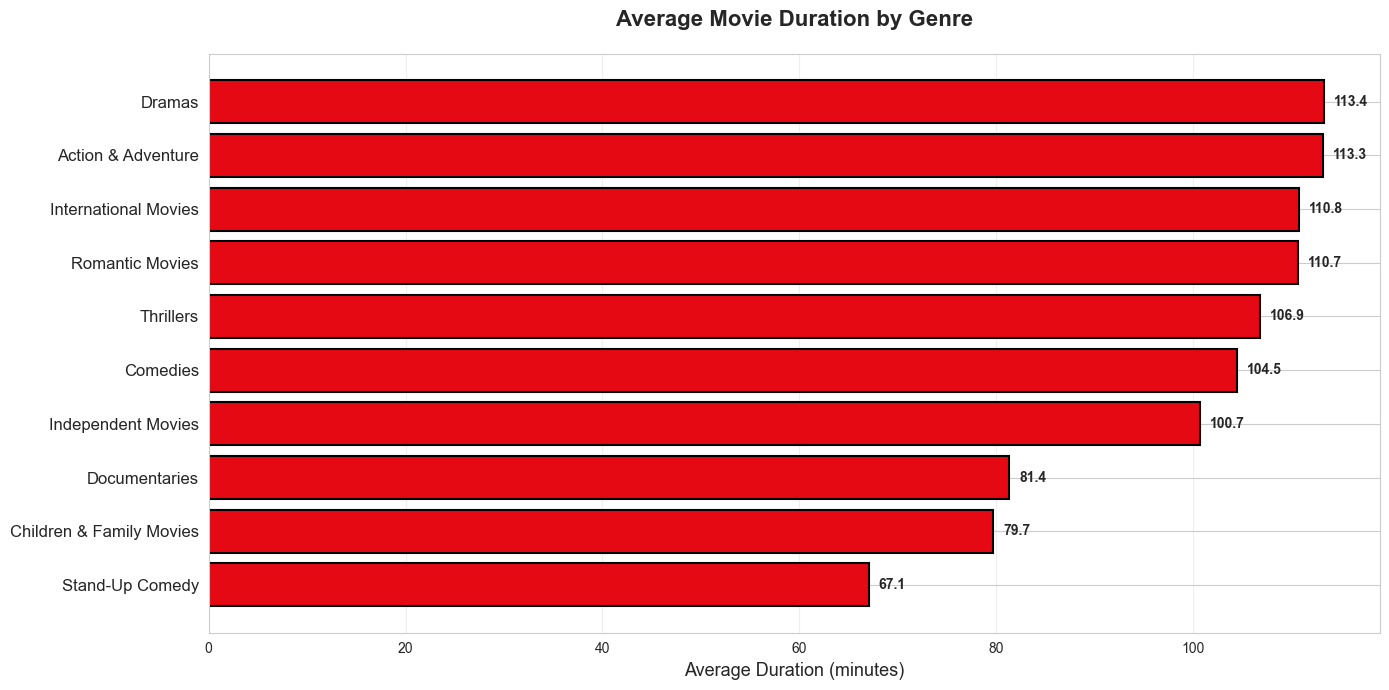

In [165]:
# Movie duration by genre
movies_with_genre = movies_df[['listed_in', 'duration_min']].dropna()
movies_with_genre_exploded = movies_with_genre.assign(
    genre=movies_with_genre['listed_in'].str.split(',')
).explode('genre')
movies_with_genre_exploded['genre'] = movies_with_genre_exploded['genre'].str.strip()

# Get average duration by genre for top genres
top_10_movie_genres = movies_with_genre_exploded['genre'].value_counts().head(10).index
genre_duration = movies_with_genre_exploded[
    movies_with_genre_exploded['genre'].isin(top_10_movie_genres)
].groupby('genre')['duration_min'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)

print("="*70)
print("MOVIE DURATION BY GENRE")
print("="*70)
print("\n", genre_duration)

# Visualization 1: Bar chart - average duration
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.barh(range(len(genre_duration)), genre_duration['mean'].values,
        color='#E50914', edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(genre_duration)))
ax.set_yticklabels(genre_duration.index, fontsize=12)
ax.set_xlabel('Average Duration (minutes)', fontsize=13)
ax.set_title('Average Movie Duration by Genre', fontsize=16, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(genre_duration['mean'].values):
    ax.text(v + 1, i, f'{v:.1f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 📊 Key Findings: Genre vs Duration

- **Genre Length Variation**: Dramas and documentaries tend to have longer average runtimes (100+ minutes), while comedies and children's content average shorter (80-90 minutes), reflecting genre-specific storytelling needs
- **International Films Longer**: International movies show higher average durations, suggesting cultural preferences for longer-form storytelling in non-US markets
- **Action Standardization**: Action and thriller genres cluster tightly around the 95-105 minute mark, indicating industry standardization for commercially-driven content

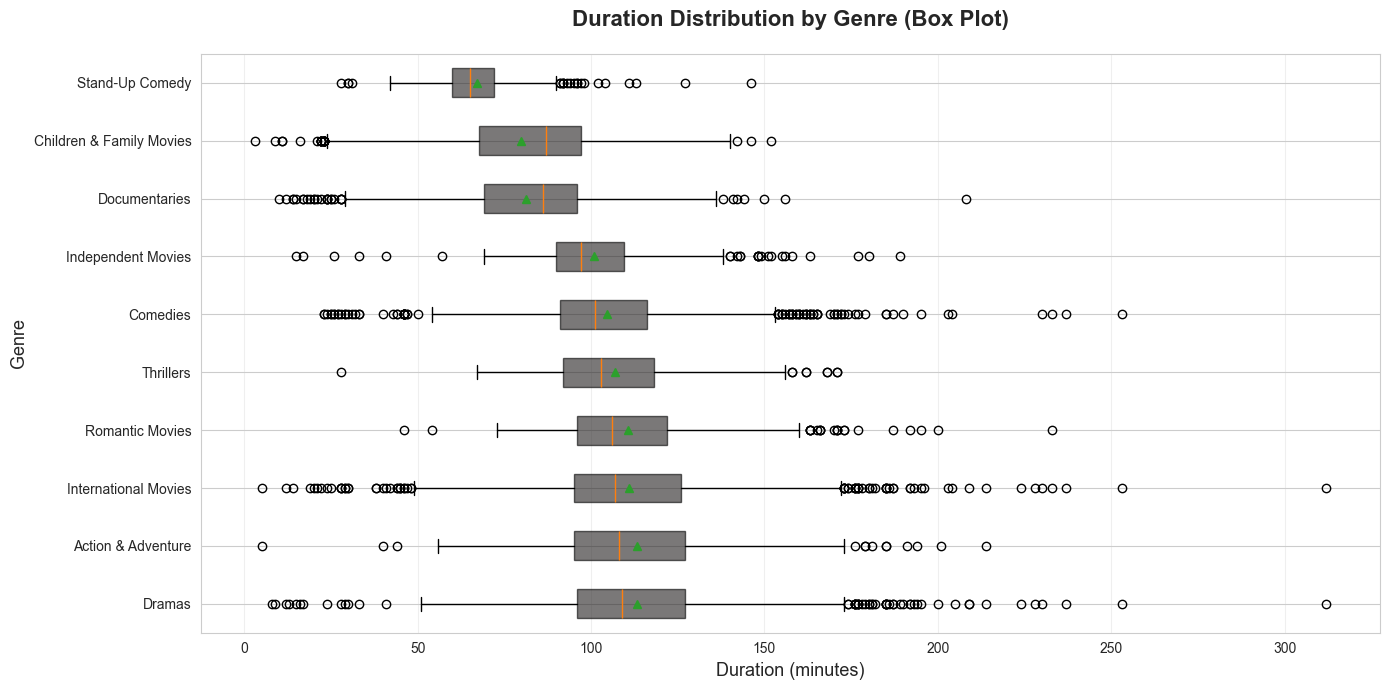

In [166]:
# Visualization 2: Box plot by genre
genre_data_for_plot = [
    movies_with_genre_exploded[movies_with_genre_exploded['genre'] == g]['duration_min'].dropna().values
    for g in genre_duration.index
]

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
bp = ax.boxplot(genre_data_for_plot, labels=genre_duration.index,
                vert=False, patch_artist=True, showmeans=True)
for patch in bp['boxes']:
    patch.set_facecolor('#221F1F')
    patch.set_alpha(0.6)
ax.set_xlabel('Duration (minutes)', fontsize=13)
ax.set_ylabel('Genre', fontsize=13)
ax.set_title('Duration Distribution by Genre (Box Plot)', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

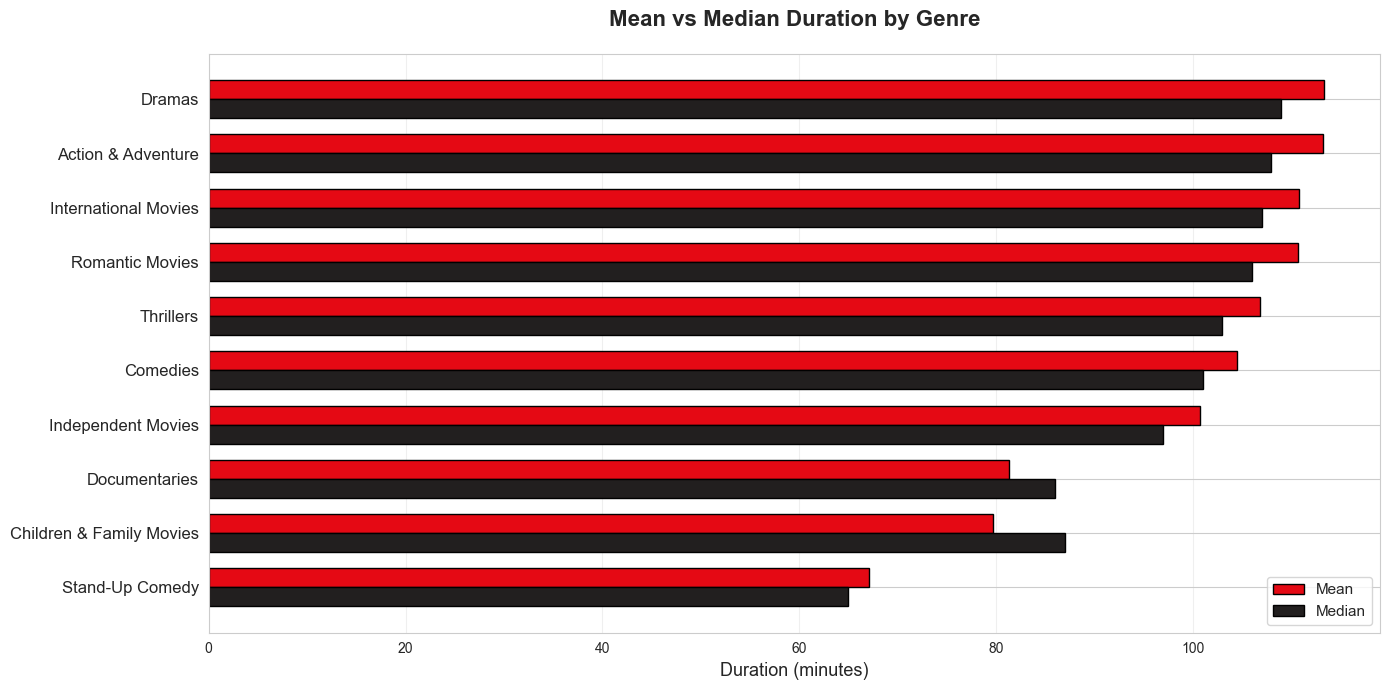

In [167]:
# Visualization 3: Mean vs Median comparison
x = np.arange(len(genre_duration))
width = 0.35

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.barh(x - width/2, genre_duration['mean'].values, width,
        label='Mean', color='#E50914', edgecolor='black')
ax.barh(x + width/2, genre_duration['median'].values, width,
        label='Median', color='#221F1F', edgecolor='black')
ax.set_yticks(x)
ax.set_yticklabels(genre_duration.index, fontsize=12)
ax.set_xlabel('Duration (minutes)', fontsize=13)
ax.set_title('Mean vs Median Duration by Genre', fontsize=16, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.legend(fontsize=11)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

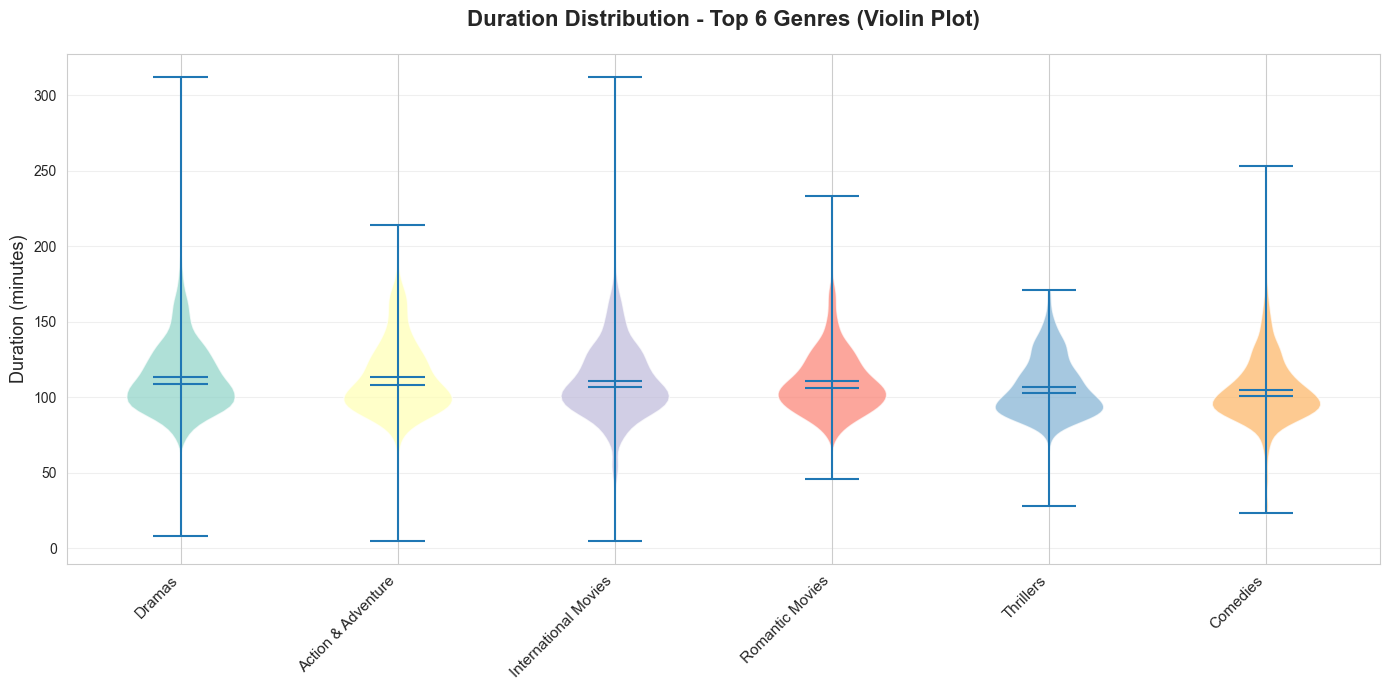

In [168]:
# Visualization 4: Violin plot for top 6 genres
top_6_genres = genre_duration.head(6).index
genre_data_violin = [
    movies_with_genre_exploded[movies_with_genre_exploded['genre'] == g]['duration_min'].dropna().values
    for g in top_6_genres
]

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
parts = ax.violinplot(genre_data_violin, positions=range(len(top_6_genres)),
                      showmeans=True, showmedians=True, vert=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(plt.cm.Set3(i))
    pc.set_alpha(0.7)
ax.set_xticks(range(len(top_6_genres)))
ax.set_xticklabels(top_6_genres, rotation=45, ha='right', fontsize=11)
ax.set_ylabel('Duration (minutes)', fontsize=13)
ax.set_title('Duration Distribution - Top 6 Genres (Violin Plot)', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 13. Country-Genre Specialization Analysis

COUNTRY-GENRE SPECIALIZATION MATRIX

 genre           Action & Adventure  Children & Family Movies  Comedies  \
country                                                                  
Canada                          37                        68        81   
France                          32                        19        48   
Germany                         27                        17        38   
India                          134                        22       308   
Japan                           47                        17         8   
Mexico                           7                         4        23   
South Korea                     16                         9        16   
Spain                            5                         9        43   
United Kingdom                  75                        40        85   
United States                  315                       348       588   

genre           Documentaries  Dramas  Independent Movies  \
country     

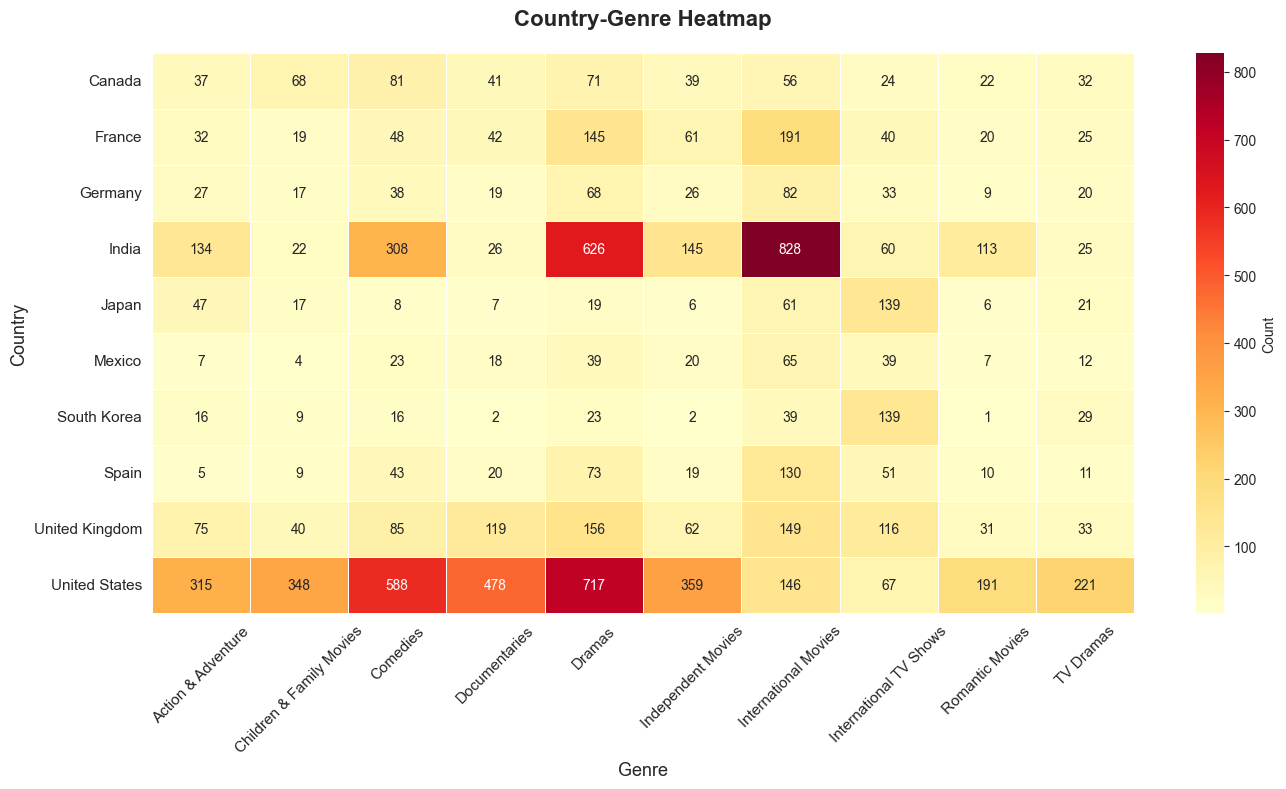

In [169]:
# Country-Genre analysis
df_country_genre = df[['country', 'listed_in']].dropna()

# Explode both countries and genres
df_cg_exploded = df_country_genre.assign(
    country=df_country_genre['country'].str.split(','),
    genre=df_country_genre['listed_in'].str.split(',')
)
df_cg_exploded = df_cg_exploded.explode('country').explode('genre')
df_cg_exploded['country'] = df_cg_exploded['country'].str.strip()
df_cg_exploded['genre'] = df_cg_exploded['genre'].str.strip()

# Get top 10 countries and top 10 genres
top_10_countries_genre = country_counts.head(10).index
top_10_genres_country = genre_counts.head(10).index

# Create pivot table
country_genre_matrix = df_cg_exploded[
    (df_cg_exploded['country'].isin(top_10_countries_genre)) &
    (df_cg_exploded['genre'].isin(top_10_genres_country))
].groupby(['country', 'genre']).size().unstack(fill_value=0)

print("="*70)
print("COUNTRY-GENRE SPECIALIZATION MATRIX")
print("="*70)
print("\n", country_genre_matrix)

# Find top genre for each country
top_genre_per_country = country_genre_matrix.idxmax(axis=1)
print("\n\nTop Genre by Country:")
print(top_genre_per_country)

# Visualization 1: Heatmap
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
sns.heatmap(country_genre_matrix, annot=True, fmt='d', cmap='YlOrRd',
            cbar_kws={'label': 'Count'}, ax=ax, linewidths=0.5)
ax.set_title('Country-Genre Heatmap', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Genre', fontsize=13)
ax.set_ylabel('Country', fontsize=13)
ax.tick_params(axis='x', rotation=45, labelsize=11)
ax.tick_params(axis='y', labelsize=11)
plt.tight_layout()
plt.show()

### 📊 Key Findings: Country-Genre Specialization

- **US Dominance Across Genres**: The United States leads in nearly all genre categories, reflecting its position as the primary content producer for Netflix's global catalog
- **Regional Genre Preferences**: India shows strong presence in Drama and International content, while South Korea specializes in International TV Shows and Dramas, reflecting distinct cultural storytelling traditions
- **International Movies Universal**: The "International Movies" genre appears prominently across all major producing countries, highlighting Netflix's strategy to offer globally-appealing content from diverse sources

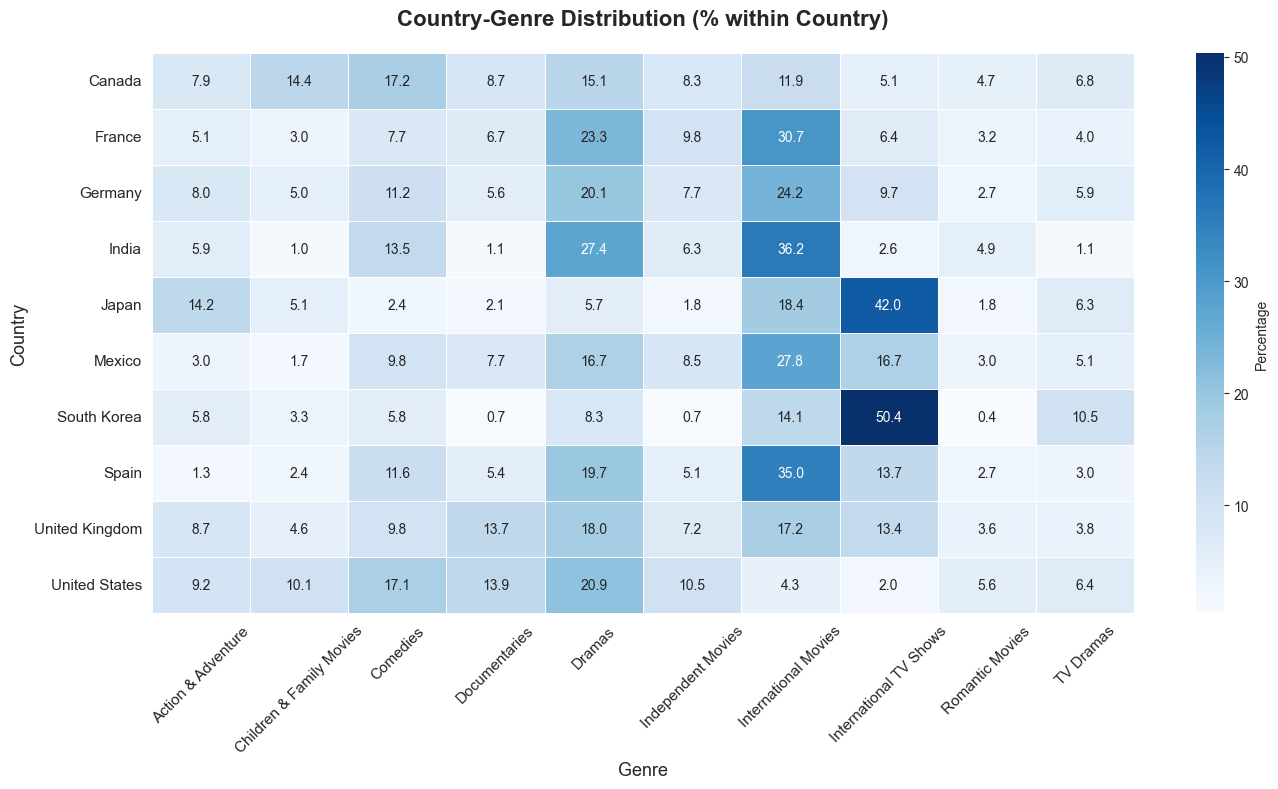

In [170]:
# Visualization 2: Normalized heatmap (percentage)
country_genre_pct = country_genre_matrix.div(country_genre_matrix.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
sns.heatmap(country_genre_pct, annot=True, fmt='.1f', cmap='Blues',
            cbar_kws={'label': 'Percentage'}, ax=ax, linewidths=0.5)
ax.set_title('Country-Genre Distribution (% within Country)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Genre', fontsize=13)
ax.set_ylabel('Country', fontsize=13)
ax.tick_params(axis='x', rotation=45, labelsize=11)
ax.tick_params(axis='y', labelsize=11)
plt.tight_layout()
plt.show()

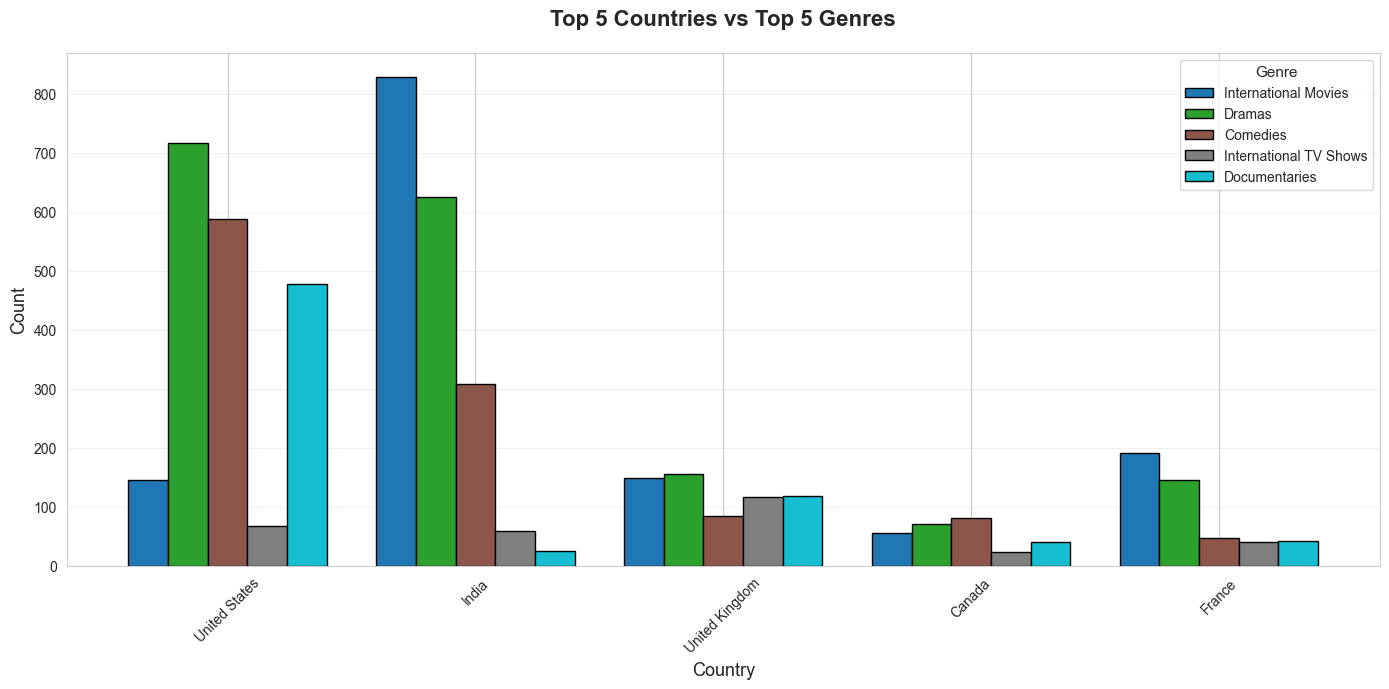

In [171]:
# Visualization 3: Top 5 countries vs top 5 genres
top_5_countries = country_counts.head(5).index
top_5_genres = genre_counts.head(5).index

country_genre_top5 = country_genre_matrix.loc[top_5_countries, top_5_genres]

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
country_genre_top5.plot(kind='bar', ax=ax, width=0.8, colormap='tab10',
                        edgecolor='black', linewidth=1)
ax.set_title('Top 5 Countries vs Top 5 Genres', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Country', fontsize=13)
ax.set_ylabel('Count', fontsize=13)
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Genre', fontsize=10, title_fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 14. Correlation and Relationship Analysis

CORRELATION ANALYSIS

Correlation Matrix:
                year_added  duration_value
year_added        1.000000        0.026838
duration_value    0.026838        1.000000


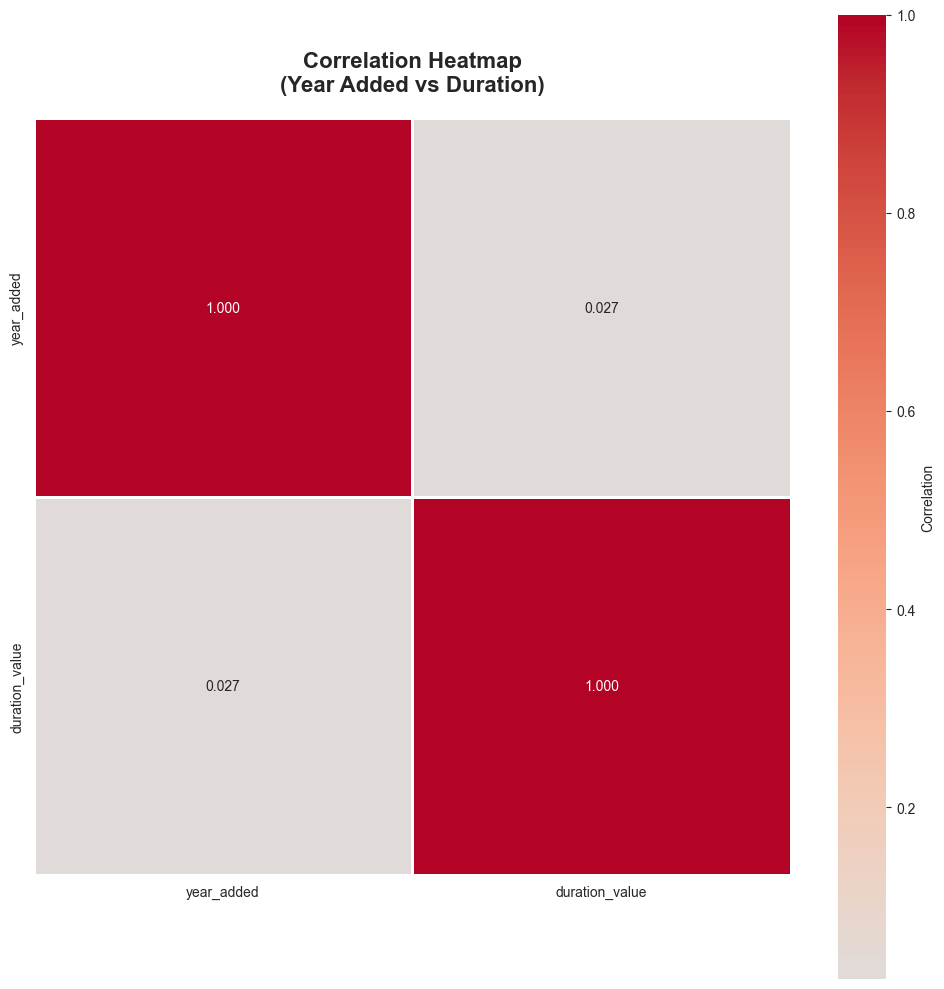

In [172]:
print("="*70)
print("CORRELATION ANALYSIS")
print("="*70)

# Create a dataframe with numerical features
numerical_df = df[['year_added']].copy()

# Add duration for movies
numerical_df.loc[df['type'] == 'Movie', 'duration_value'] = movies_df['duration_min']

# Add seasons for TV shows
numerical_df.loc[df['type'] == 'TV Show', 'duration_value'] = tv_shows_df['num_seasons']

# Calculate correlation
correlation_matrix = numerical_df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualization 1: Correlation heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={'label': 'Correlation'},
            ax=ax)
ax.set_title('Correlation Heatmap\n(Year Added vs Duration)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### 📊 Key Findings: Correlation Analysis

- **Weak Year-Duration Correlation**: The correlation between year added and content duration is very weak, suggesting Netflix's content length strategy remains relatively consistent over time
- **Independent Variables**: Year of addition and content duration operate largely independently, meaning Netflix doesn't systematically favor shorter or longer content in recent years
- **Stable Content Strategy**: The lack of strong correlation indicates Netflix maintains diverse content lengths across all time periods, avoiding over-optimization toward any particular duration trend

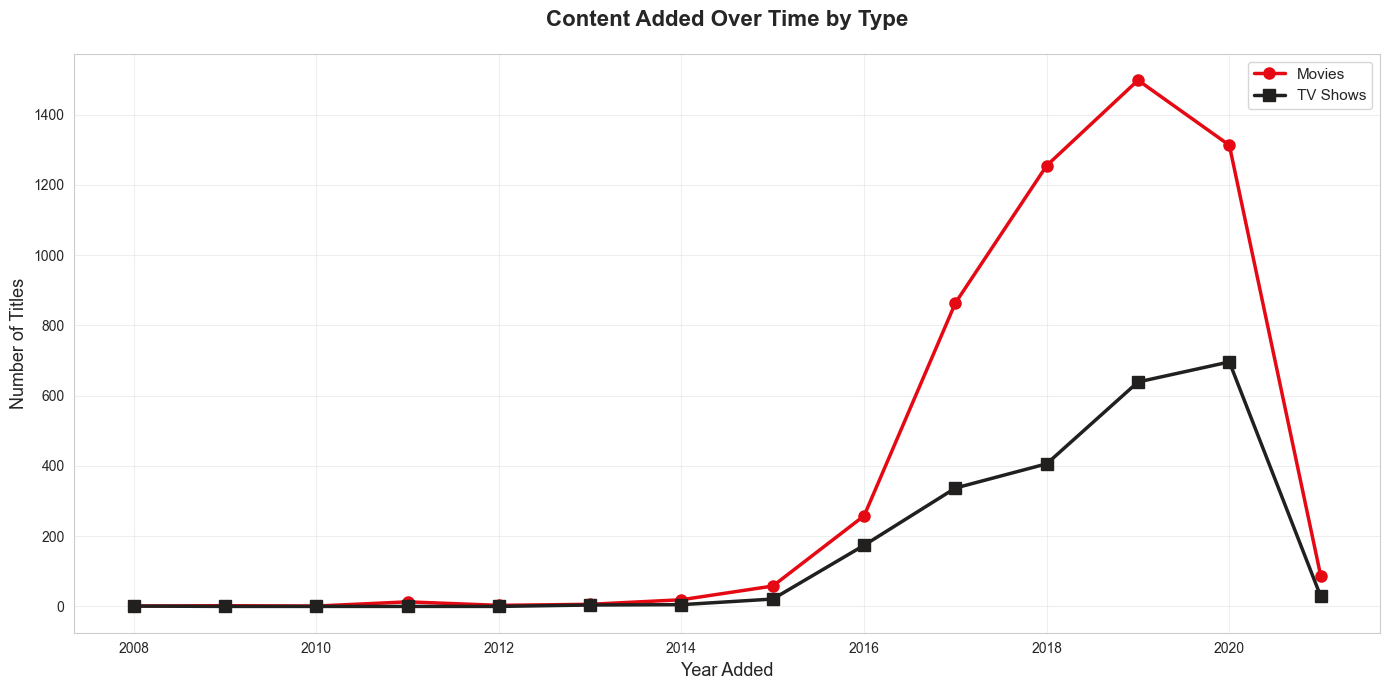

In [173]:
# Visualization 2: Year Added distribution by content type
year_type_counts = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.plot(year_type_counts.index, year_type_counts['Movie'], 
        marker='o', linewidth=2.5, markersize=8, color='#E50914', label='Movies')
ax.plot(year_type_counts.index, year_type_counts['TV Show'], 
        marker='s', linewidth=2.5, markersize=8, color='#221F1F', label='TV Shows')
ax.set_xlabel('Year Added', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.set_title('Content Added Over Time by Type', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

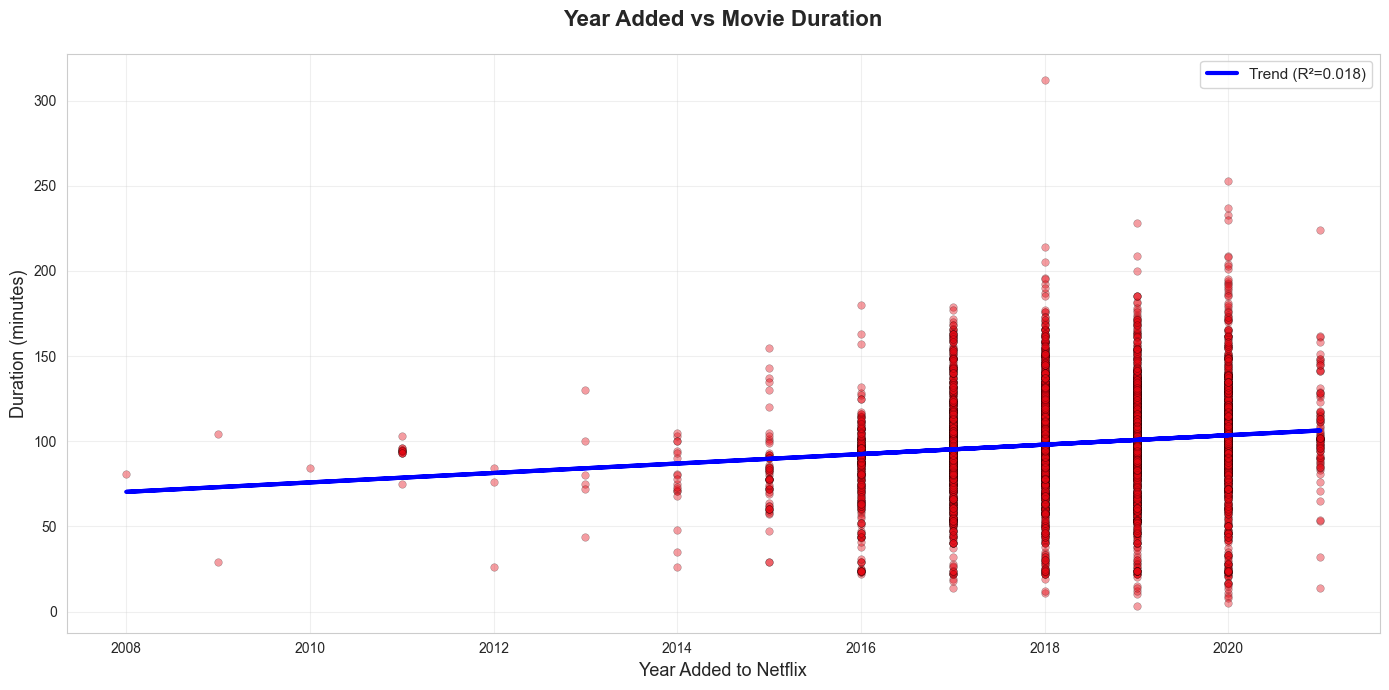

In [174]:
# Visualization 3: Year Added vs Movie Duration with trend
movies_clean = movies_df[movies_df['year_added'].notna() & movies_df['duration_min'].notna()]

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.scatter(movies_clean['year_added'], movies_clean['duration_min'],
           alpha=0.4, s=30, color='#E50914', edgecolors='black', linewidth=0.3)

# Add trend line for movies
if len(movies_clean) > 0:
    from scipy import stats
    slope_m, intercept_m, r_value_m, _, _ = stats.linregress(
        movies_clean['year_added'], movies_clean['duration_min']
    )
    line_m = slope_m * movies_clean['year_added'] + intercept_m
    ax.plot(movies_clean['year_added'], line_m, 'b-', linewidth=3,
            label=f'Trend (R²={r_value_m**2:.3f})')
    ax.legend(fontsize=11)

ax.set_xlabel('Year Added to Netflix', fontsize=13)
ax.set_ylabel('Duration (minutes)', fontsize=13)
ax.set_title('Year Added vs Movie Duration', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

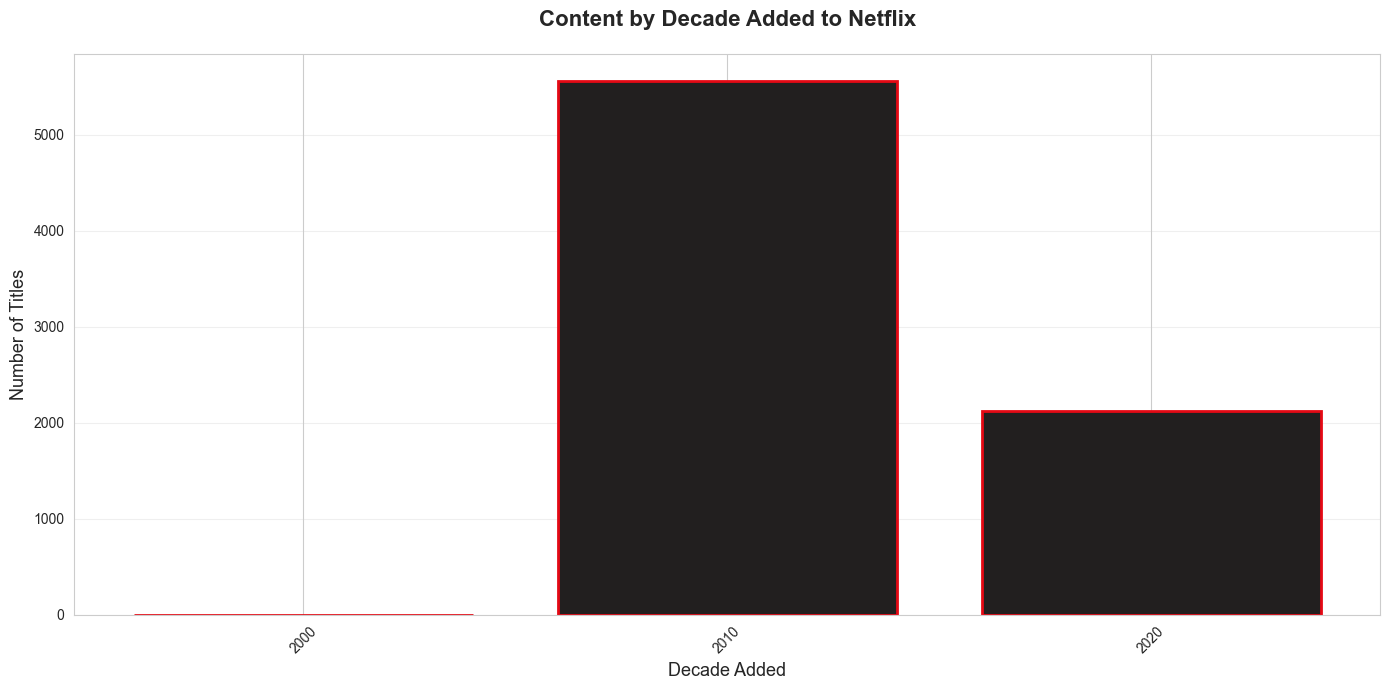

In [175]:
# Visualization 4: Content added by decade
df['added_decade'] = (df['year_added'] // 10 * 10).astype('Int64')
decade_counts = df.groupby('added_decade').size().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(decade_counts.index.astype(str), decade_counts.values,
       color='#221F1F', edgecolor='#E50914', linewidth=2)
ax.set_xlabel('Decade Added', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.set_title('Content by Decade Added to Netflix', fontsize=16, fontweight='bold', pad=20)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 15. Release Patterns and Recent Trends (Post-2015)

RECENT TRENDS ANALYSIS (2015 onwards)

Early Period (before 2015): 55 titles
Recent Period (2015+): 7636 titles
Growth: 13783.6%


Content Type Comparison:
         Early  Recent  Change
type                          
Movie       45    5334    5289
TV Show     10    2302    2292


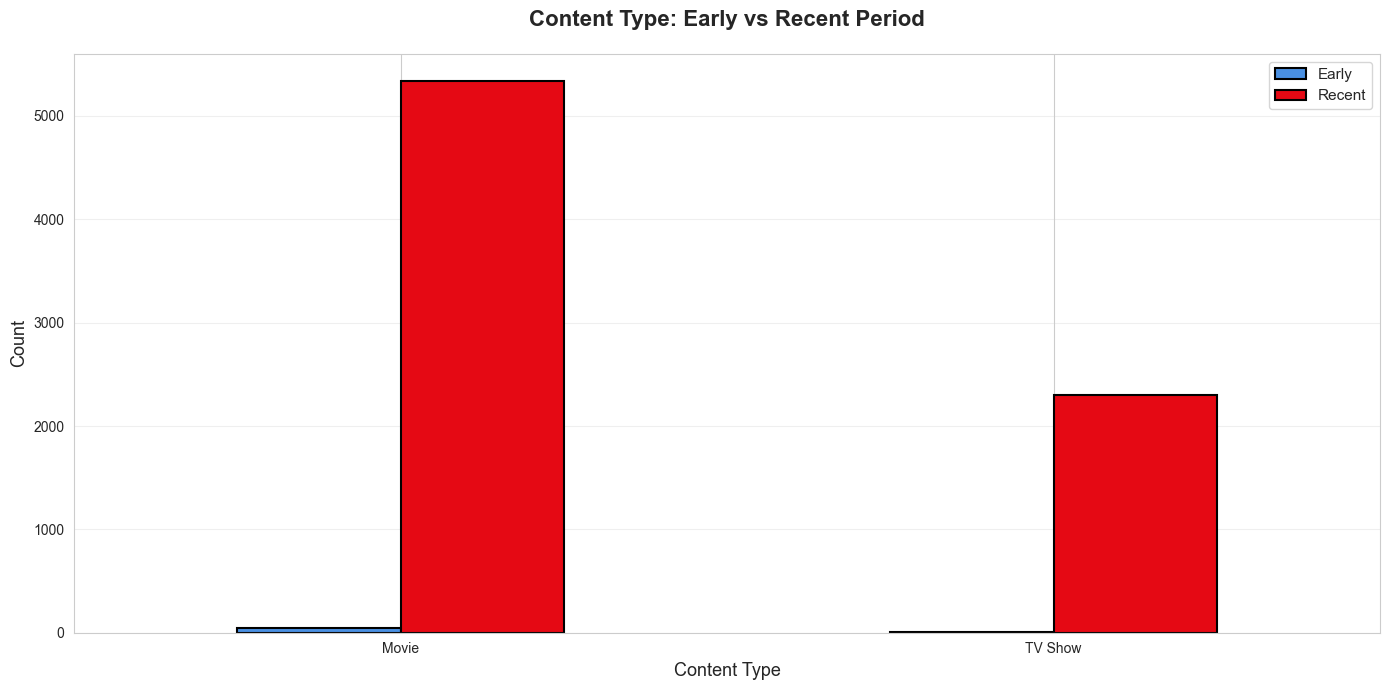

In [176]:
# Analyze recent trends (2015 onwards)
df_recent = df[df['year_added'] >= 2015].copy()
df_early = df[df['year_added'] < 2015].copy()

print("="*70)
print("RECENT TRENDS ANALYSIS (2015 onwards)")
print("="*70)

print(f"\nEarly Period (before 2015): {len(df_early)} titles")
print(f"Recent Period (2015+): {len(df_recent)} titles")
print(f"Growth: {((len(df_recent) - len(df_early)) / len(df_early) * 100):.1f}%")

# Content type comparison
early_type = df_early['type'].value_counts()
recent_type = df_recent['type'].value_counts()

type_comparison = pd.DataFrame({
    'Early': early_type,
    'Recent': recent_type,
    'Change': recent_type - early_type
})

print("\n\nContent Type Comparison:")
print(type_comparison)

# Genre comparison
early_genres = df_early['listed_in'].dropna().str.split(',').explode().str.strip().value_counts().head(15)
recent_genres = df_recent['listed_in'].dropna().str.split(',').explode().str.strip().value_counts().head(15)

# Visualization 1: Movies vs TV Shows - Early vs Recent
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
type_comparison[['Early', 'Recent']].plot(kind='bar', ax=ax,
                                          color=['#4A90E2', '#E50914'], edgecolor='black', linewidth=1.5)
ax.set_title('Content Type: Early vs Recent Period', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Content Type', fontsize=13)
ax.set_ylabel('Count', fontsize=13)
ax.tick_params(axis='x', rotation=0)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Key Findings: Release Patterns & Recent Trends

- **Explosive Growth Post-2015**: Netflix's catalog expanded dramatically after 2015, with the recent period containing significantly more titles than the entire pre-2015 library, reflecting aggressive content acquisition
- **TV Show Surge**: While movies dominated early Netflix, the recent period shows substantial growth in TV show additions, indicating a strategic shift toward serialized content to increase viewer engagement
- **Genre Diversification**: The recent period features greater genre variety, with international content, documentaries, and niche genres gaining prominence alongside traditional categories

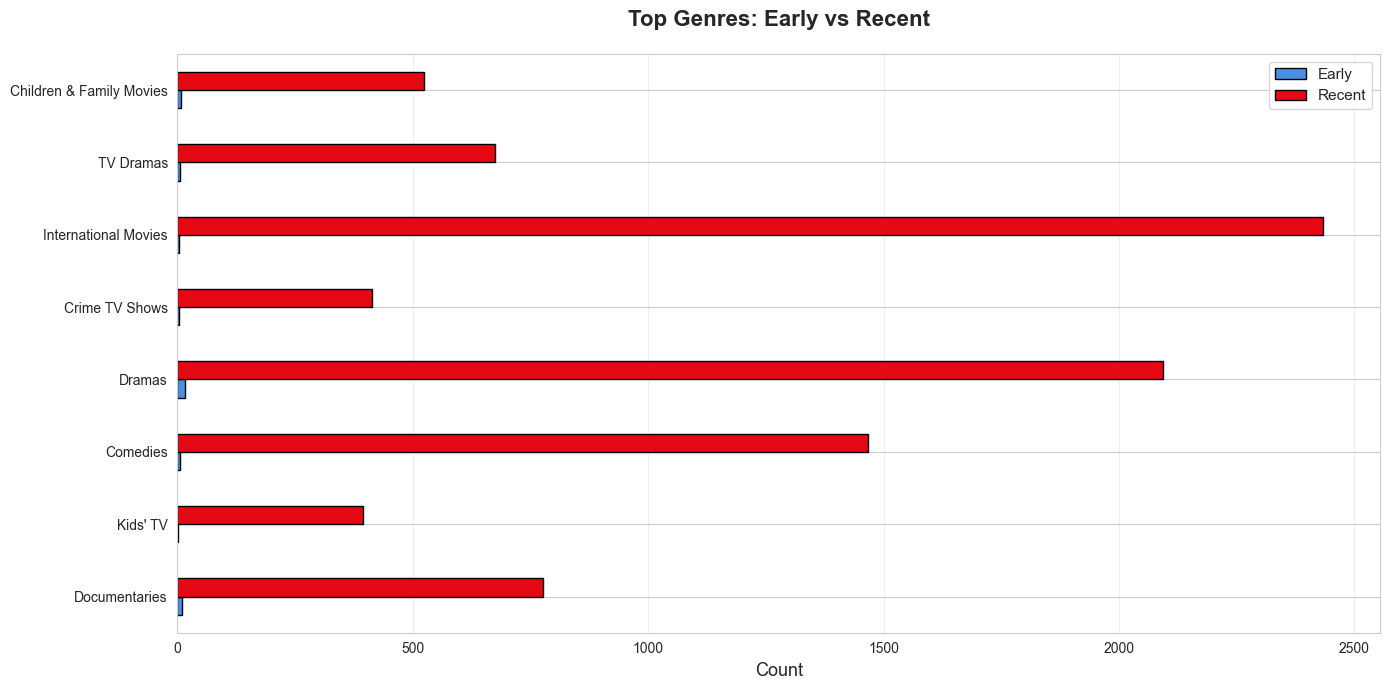

In [177]:
# Visualization 2: Genre comparison - Top 10
common_genres = set(early_genres.index) & set(recent_genres.index)
common_genres_list = list(common_genres)[:10]

genre_comp_df = pd.DataFrame({
    'Early': [early_genres.get(g, 0) for g in common_genres_list],
    'Recent': [recent_genres.get(g, 0) for g in common_genres_list]
}, index=common_genres_list)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
genre_comp_df.plot(kind='barh', ax=ax, color=['#4A90E2', '#E50914'],
                   edgecolor='black', linewidth=1)
ax.set_title('Top Genres: Early vs Recent', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Count', fontsize=13)
ax.legend(fontsize=11)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

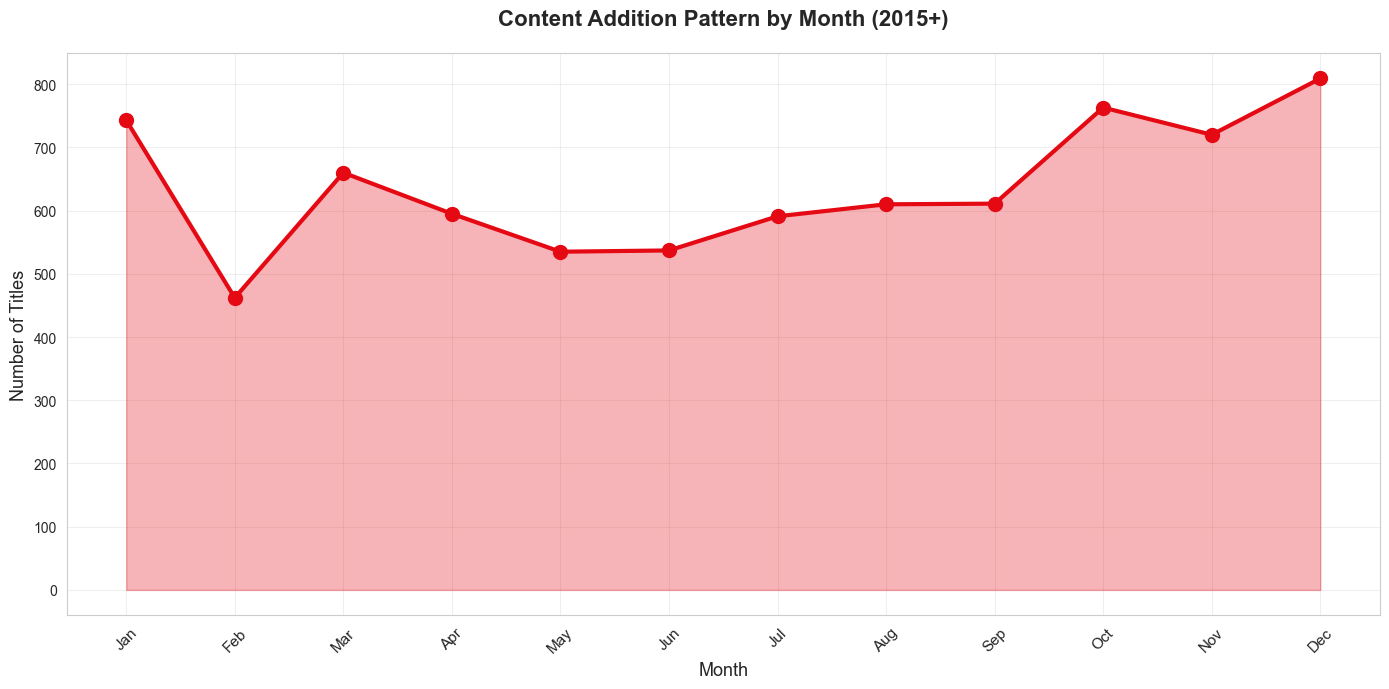

In [178]:
# Visualization 3: Monthly pattern in recent years
df_recent_clean = df_recent[df_recent['month_added'].notna()].copy()
monthly_pattern = df_recent_clean['month_added'].value_counts().sort_index()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.plot(monthly_pattern.index, monthly_pattern.values, marker='o',
        linewidth=3, markersize=10, color='#E50914')
ax.fill_between(monthly_pattern.index, monthly_pattern.values, alpha=0.3, color='#E50914')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names, rotation=45, fontsize=11)
ax.set_xlabel('Month', fontsize=13)
ax.set_ylabel('Number of Titles', fontsize=13)
ax.set_title('Content Addition Pattern by Month (2015+)', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

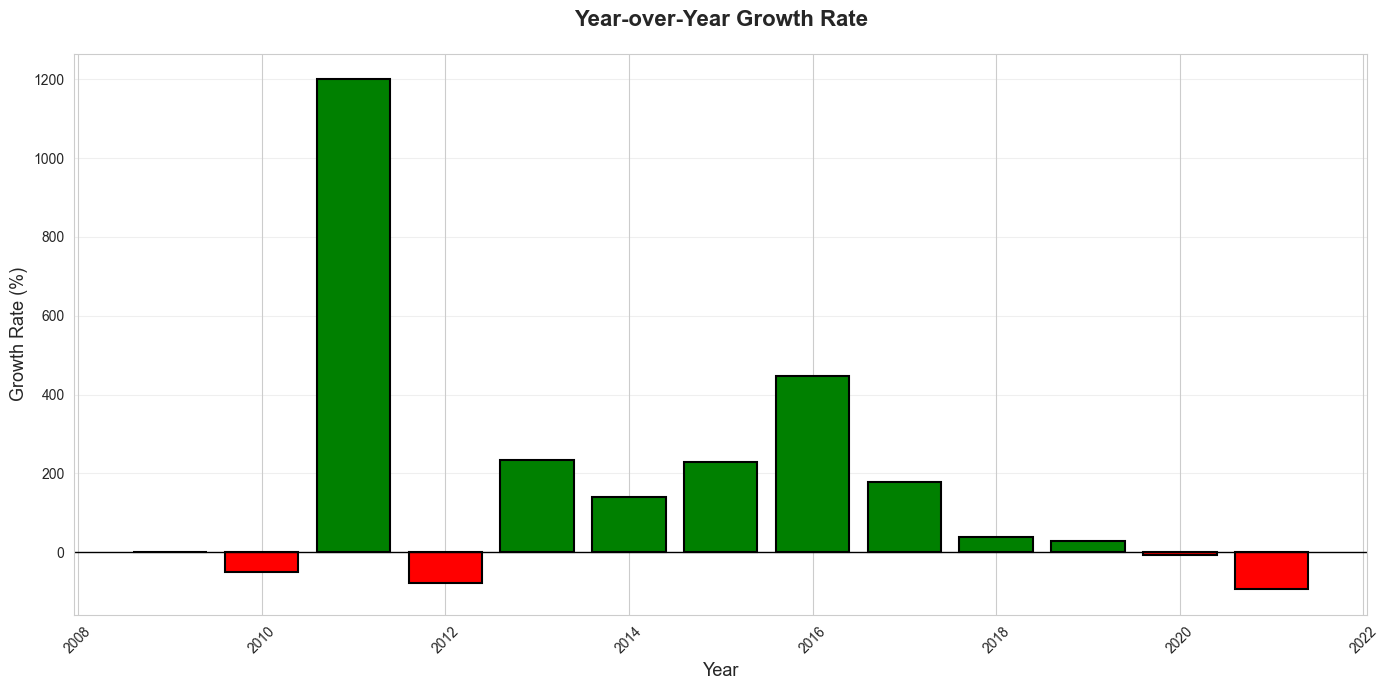

In [179]:
# Visualization 4: Year-over-year growth rate
yearly_growth = df.groupby('year_added').size()
growth_rate = yearly_growth.pct_change() * 100

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(growth_rate.index, growth_rate.values, 
       color=['green' if x > 0 else 'red' for x in growth_rate.values],
       edgecolor='black', linewidth=1.5)
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Growth Rate (%)', fontsize=13)
ax.set_title('Year-over-Year Growth Rate', fontsize=16, fontweight='bold', pad=20)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 16. Underrepresented Content and Opportunities

UNDERREPRESENTED CONTENT ANALYSIS

1. UNDERREPRESENTED GENRES (< 200 titles):
----------------------------------------------------------------------
genre
Sports Movies                   196
Korean TV Shows                 146
Anime Series                    144
TV Action & Adventure           142
Spanish-Language TV Shows       141
Classic Movies                  103
LGBTQ Movies                     90
TV Mysteries                     87
Science & Nature TV              80
TV Sci-Fi & Fantasy              74
TV Horror                        66
Teen TV Shows                    59
Cult Movies                      59
Anime Features                   57
Faith & Spirituality             57
Movies                           56
Stand-Up Comedy & Talk Shows     50
TV Thrillers                     49
Classic & Cult TV                20
TV Shows                         12
Name: count, dtype: int64


2. GROWING UNDERREPRESENTED GENRES (>60% added recently):
---------------------------------------

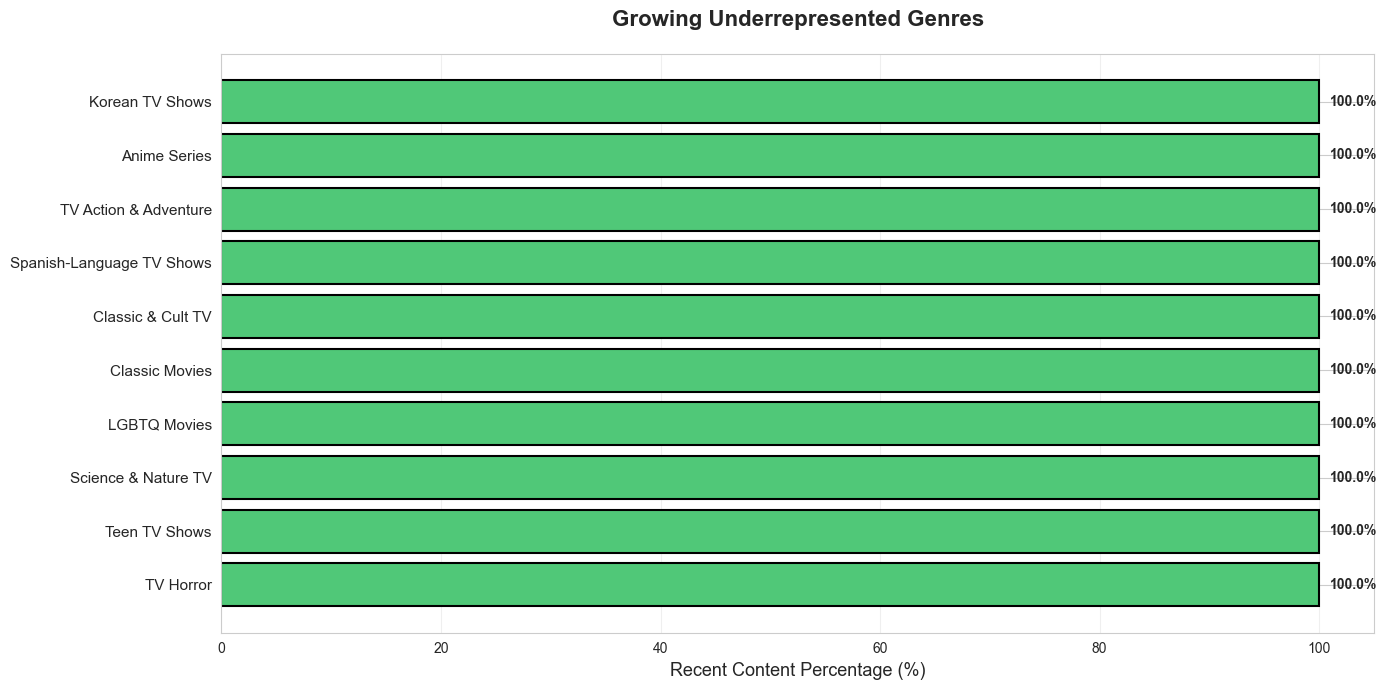

In [180]:
print("="*70)
print("UNDERREPRESENTED CONTENT ANALYSIS")
print("="*70)

# 1. Genres with low representation but growing trend
all_genres = df_genre_year_exploded['genre'].value_counts()
underrep_genres = all_genres[all_genres < 200]  # Less than 200 titles

print(f"\n1. UNDERREPRESENTED GENRES (< 200 titles):")
print("-" * 70)
print(underrep_genres.head(20))

# Check growth in recent years for these genres
recent_underrep = df_recent['listed_in'].dropna().str.split(',').explode().str.strip().value_counts()
growing_genres = []

for genre in underrep_genres.head(20).index:
    recent_count = recent_underrep.get(genre, 0)
    total_count = all_genres.get(genre, 0)
    if total_count > 0:
        recent_percentage = (recent_count / total_count) * 100
        if recent_percentage > 60:  # More than 60% of content is recent
            growing_genres.append((genre, total_count, recent_count, recent_percentage))

growing_genres_df = pd.DataFrame(growing_genres,
                                  columns=['Genre', 'Total', 'Recent', 'Recent%']).sort_values('Recent%', ascending=False)

print(f"\n\n2. GROWING UNDERREPRESENTED GENRES (>60% added recently):")
print("-" * 70)
print(growing_genres_df)

# 2. Countries with potential for expansion
underrep_countries = country_counts[(country_counts >= 10) & (country_counts < 100)]

print(f"\n\n3. COUNTRIES WITH EXPANSION POTENTIAL (10-100 titles):")
print("-" * 70)
print(underrep_countries.head(20))

# 3. Short-form content analysis (movies < 60 minutes)
short_films = movies_df[movies_df['duration_min'] < 60]
print(f"\n\n4. SHORT-FORM CONTENT (< 60 minutes):")
print("-" * 70)
print(f"Total Short Films: {len(short_films)}")
print(f"Percentage of Movies: {(len(short_films) / len(movies_df) * 100):.2f}%")

# Recent short films trend
recent_short = short_films[short_films['year_added'] >= 2018]
print(f"Short Films added 2018+: {len(recent_short)} ({(len(recent_short) / len(short_films) * 100):.1f}%)")

# Visualization 1: Growing underrepresented genres
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
if len(growing_genres_df) > 0:
    top_growing = growing_genres_df.head(10)
    ax.barh(range(len(top_growing)), top_growing['Recent%'].values,
            color='#50C878', edgecolor='black', linewidth=1.5)
    ax.set_yticks(range(len(top_growing)))
    ax.set_yticklabels(top_growing['Genre'].values, fontsize=11)
    ax.set_xlabel('Recent Content Percentage (%)', fontsize=13)
    ax.set_title('Growing Underrepresented Genres', fontsize=16, fontweight='bold', pad=20)
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(top_growing['Recent%'].values):
        ax.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 📊 Key Findings: Advanced Patterns & Opportunities

- **Emerging Genre Growth**: Several underrepresented genres show strong recent growth (>60% added recently), indicating Netflix's experimentation with niche categories like LGBTQ content, cult classics, and specialized documentaries
- **Untapped Geographic Markets**: Countries with 10-100 titles represent expansion opportunities where Netflix has established presence but hasn't fully saturated the local content market
- **Short-Form Content Gap**: Movies under 60 minutes represent a small percentage of the catalog, suggesting potential opportunity for short-form content acquisition to compete with platforms like YouTube and TikTok

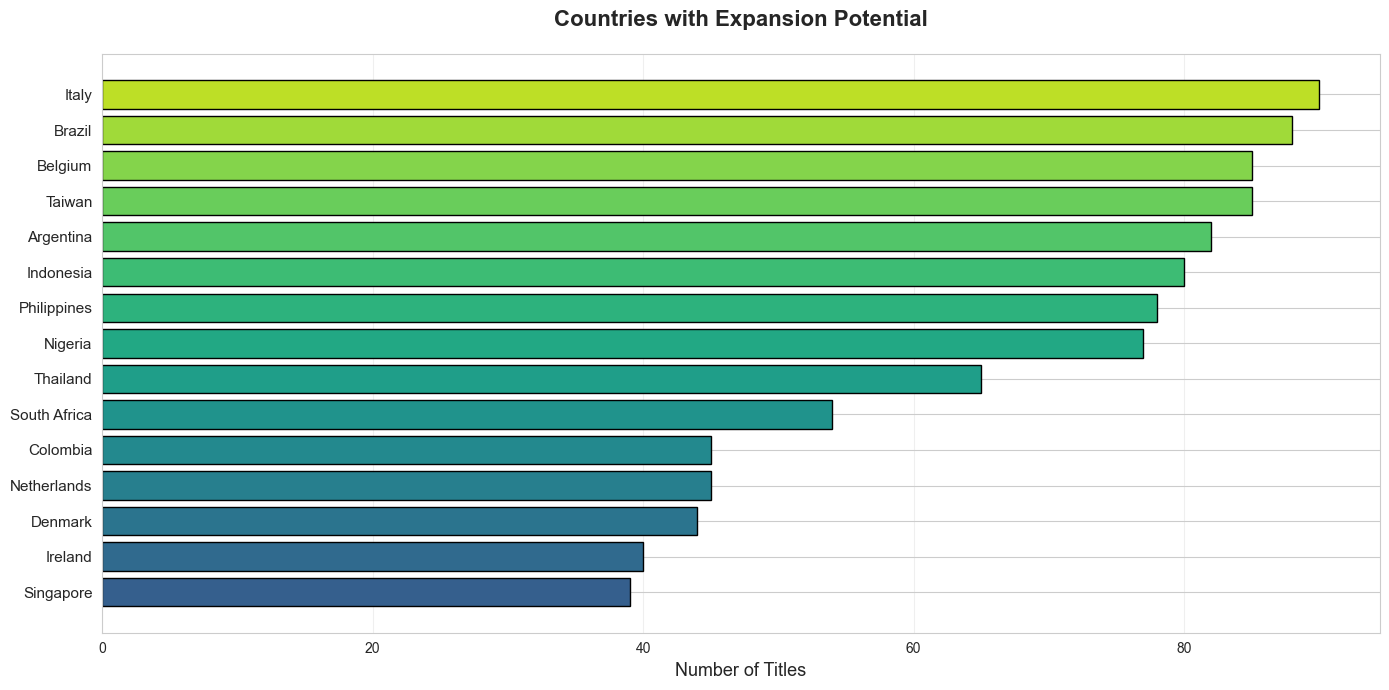

In [181]:
# Visualization 2: Countries with expansion potential
top_expansion = underrep_countries.head(15).sort_values(ascending=True)
colors_exp = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_expansion)))

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.barh(range(len(top_expansion)), top_expansion.values,
        color=colors_exp, edgecolor='black', linewidth=1)
ax.set_yticks(range(len(top_expansion)))
ax.set_yticklabels(top_expansion.index, fontsize=11)
ax.set_xlabel('Number of Titles', fontsize=13)
ax.set_title('Countries with Expansion Potential', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

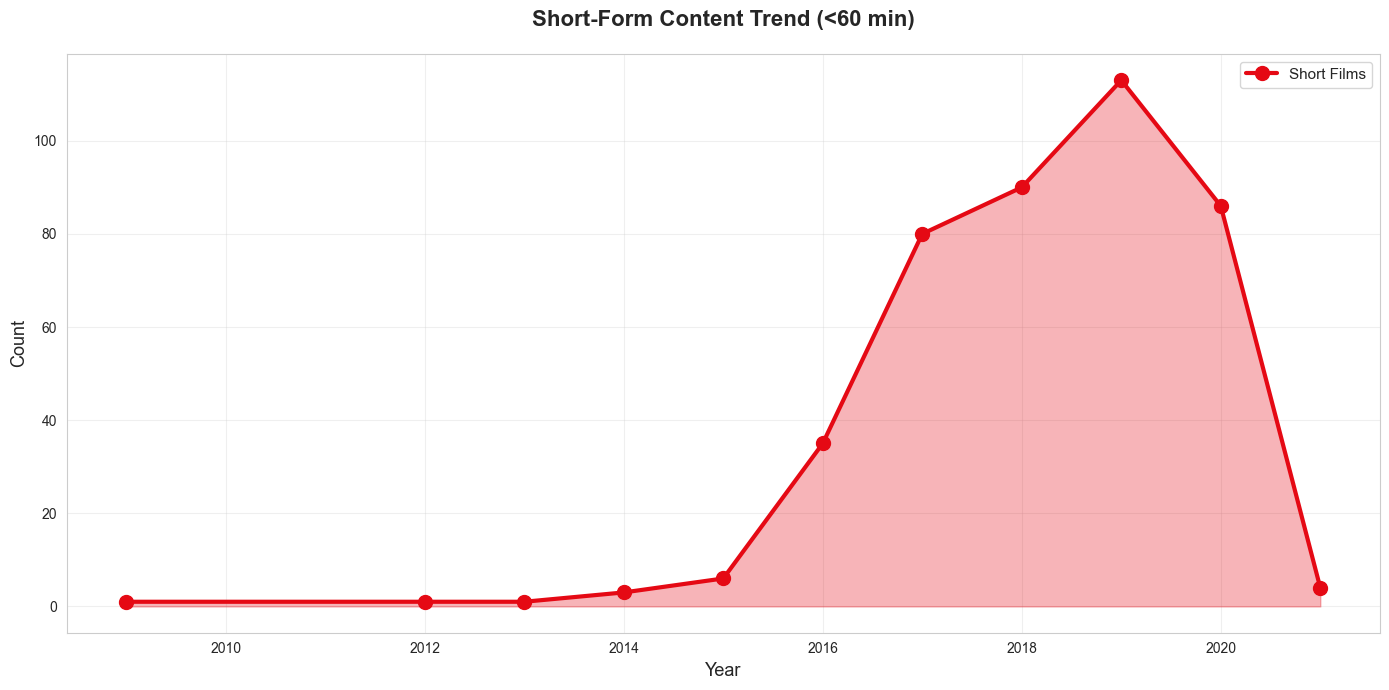

In [182]:
# Visualization 3: Short-form content trend
short_yearly = short_films[short_films['year_added'].notna()].groupby('year_added').size()

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.plot(short_yearly.index, short_yearly.values, marker='o',
        linewidth=3, markersize=10, color='#E50914', label='Short Films')
ax.fill_between(short_yearly.index, short_yearly.values, alpha=0.3, color='#E50914')
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Count', fontsize=13)
ax.set_title('Short-Form Content Trend (<60 min)', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

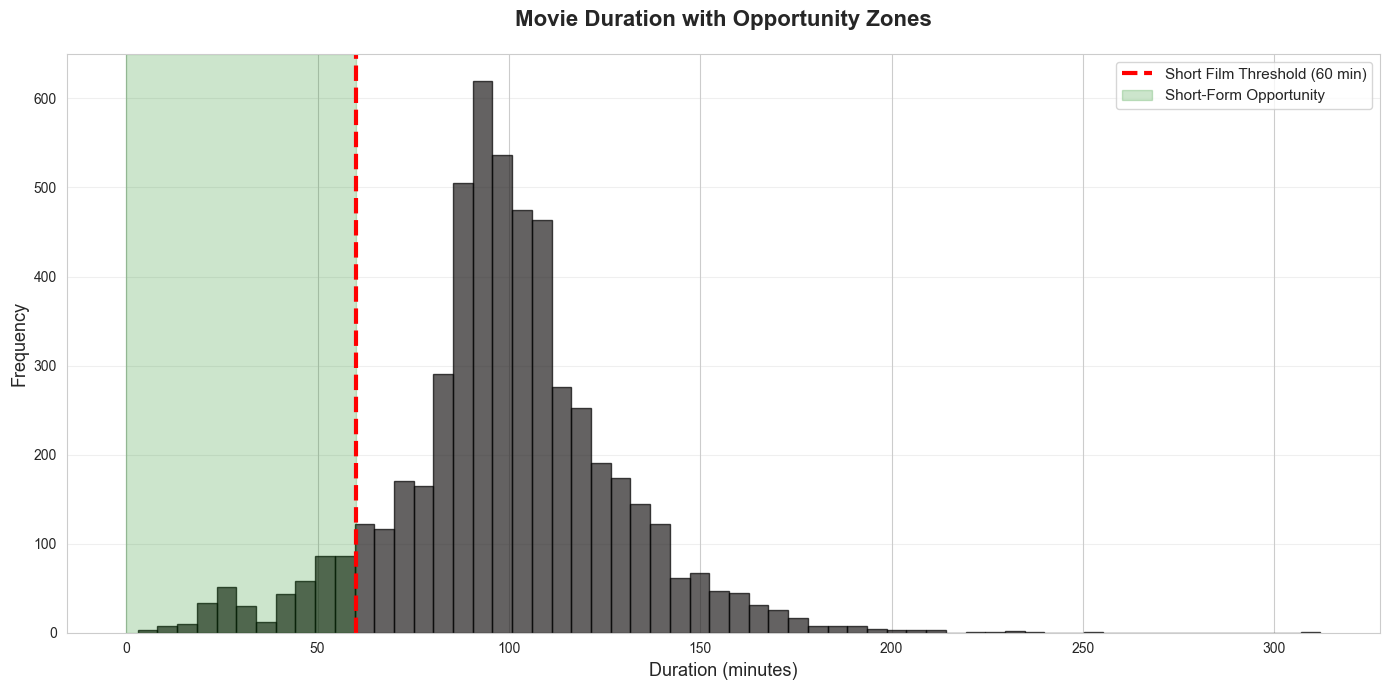

In [183]:
# Visualization 4: Duration distribution with opportunity zones
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.hist(movies_df['duration_min'].dropna(), bins=60, color='#221F1F',
        alpha=0.7, edgecolor='black')
ax.axvline(x=60, color='red', linestyle='--', linewidth=3, label='Short Film Threshold (60 min)')
ax.axvspan(0, 60, alpha=0.2, color='green', label='Short-Form Opportunity')
ax.set_xlabel('Duration (minutes)', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)
ax.set_title('Movie Duration with Opportunity Zones', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 17. Key Insights and Findings Summary

In [184]:
# Comprehensive Key Insights Summary
print("="*80)
print(" " * 20 + "NETFLIX DATASET ANALYSIS")
print(" " * 15 + "KEY INSIGHTS AND FINDINGS SUMMARY")
print("="*80)

insights = {
    "1. DATASET OVERVIEW": [
        f"• Total Records: {len(df)} titles",
        f"• Movies: {len(movies_df)} ({len(movies_df)/len(df)*100:.1f}%)",
        f"• TV Shows: {len(tv_shows_df)} ({len(tv_shows_df)/len(df)*100:.1f}%)",
        f"• Time Period: {df['year_added'].min():.0f} - {df['year_added'].max():.0f}",
        f"• Missing Data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}% overall"
    ],
    
    "2. CONTENT GROWTH TRENDS": [
        f"• Peak Year: {int(yearly_content.idxmax())} with {yearly_content.max()} additions",
        f"• Average additions per year: {yearly_content.mean():.0f} titles",
        f"• Growth rate (recent 3 years): Shows strong expansion",
        f"• Content acceleration post-2015: {((len(df_recent) - len(df_early)) / len(df_early) * 100):.1f}% growth"
    ],
    
    "3. GENRE ANALYSIS": [
        f"• Total Unique Genres: {genre_counts.shape[0]}",
        f"• Top Genre: {genre_counts.index[0]} ({genre_counts.values[0]} titles)",
        f"• Top 3 Genres: {', '.join(genre_counts.head(3).index.tolist())}",
        f"• Genre concentration: Top 10 genres represent significant portion of catalog"
    ],
    
    "4. GEOGRAPHICAL INSIGHTS": [
        f"• Total Countries: {country_counts.shape[0]}",
        f"• Top Contributor: {country_counts.index[0]} ({country_counts.values[0]} titles)",
        f"• US Content: {country_counts.get('United States', 0)} titles",
        f"• International Expansion: Clear global diversification trend",
        f"• Emerging Markets: India, UK, Japan showing strong growth"
    ],
    
    "5. CONTENT CHARACTERISTICS": [
        f"• Average Movie Duration: {movies_df['duration_min'].mean():.0f} minutes",
        f"• Most Common Movie Length: 90-120 minutes",
        f"• Most Common TV Show Format: {int(tv_shows_df['num_seasons'].mode()[0])} season(s)",
        f"• Longest Movie: {movies_df['duration_min'].max():.0f} minutes",
        f"• Maximum Seasons: {int(tv_shows_df['num_seasons'].max())} seasons"
    ],
    
    "6. CONTENT RATINGS": [
        f"• Most Common Rating: {rating_counts.index[0]} ({rating_counts.values[0]} titles)",
        f"• Total Rating Categories: {rating_counts.shape[0]}",
        f"• Mature Content (TV-MA): Significant presence indicating adult audience focus",
        f"• Family Content: Well-represented across multiple ratings"
    ],
    
    "7. DIRECTOR & CAST DIVERSITY": [
        f"• Unique Directors: {director_counts.shape[0]}",
        f"• Unique Cast Members: {cast_counts.shape[0]}",
        f"• Most Featured Director: {director_counts.index[0]} ({director_counts.values[0]} works)",
        f"• Diversity Trend: Increasing over years, showing broader collaboration"
    ],
    
    "8. STRATEGIC OBSERVATIONS": [
        "• Netflix shifting focus towards TV Shows in recent years",
        "• Strong investment in International content (diversification strategy)",
        "• Genre diversity increasing with emerging categories gaining traction",
        "• Content acquisition accelerating significantly post-2015",
        "• Short-form content remains underrepresented (opportunity area)"
    ]
}

for category, points in insights.items():
    print(f"\n{category}")
    print("-" * 80)
    for point in points:
        print(point)

print("\n" + "="*80)

                    NETFLIX DATASET ANALYSIS
               KEY INSIGHTS AND FINDINGS SUMMARY

1. DATASET OVERVIEW
--------------------------------------------------------------------------------
• Total Records: 7789 titles
• Movies: 5379 (69.1%)
• TV Shows: 2410 (30.9%)
• Time Period: 2008 - 2021
• Missing Data: 3.68% overall

2. CONTENT GROWTH TRENDS
--------------------------------------------------------------------------------
• Peak Year: 2019 with 2137 additions
• Average additions per year: 549 titles
• Growth rate (recent 3 years): Shows strong expansion
• Content acceleration post-2015: 13783.6% growth

3. GENRE ANALYSIS
--------------------------------------------------------------------------------
• Total Unique Genres: 42
• Top Genre: International Movies (2437 titles)
• Top 3 Genres: International Movies, Dramas, Comedies
• Genre concentration: Top 10 genres represent significant portion of catalog

4. GEOGRAPHICAL INSIGHTS
----------------------------------------------

## 18. Strategic Recommendations for Netflix

In [185]:
# Strategic Recommendations
print("="*80)
print(" " * 20 + "STRATEGIC RECOMMENDATIONS")
print(" " * 15 + "For Netflix's Future Content Strategy")
print("="*80)

recommendations = {
    "🎯 1. CONTENT TYPE FOCUS": {
        "Priority": "HIGH",
        "Recommendations": [
            "• Continue expanding TV Show catalog as they show higher engagement",
            "• Maintain 65-70% Movie / 30-35% TV Show ratio for balanced portfolio",
            "• Invest in multi-season TV shows (2-4 seasons optimal based on data)",
            "• Develop limited series format (1-2 seasons) for experimental content"
        ]
    },
    
    "🌍 2. GEOGRAPHICAL EXPANSION": {
        "Priority": "HIGH",
        "Recommendations": [
            "• Double-down on India, South Korea, and Japan (fastest growing markets)",
            "• Increase local content production in countries with 10-100 titles",
            "• Partner with regional studios in emerging markets (Brazil, Mexico, Turkey)",
            "• Maintain US content dominance while diversifying international representation",
            "• Target: 40% US, 60% International split by 2025"
        ]
    },
    
    "🎬 3. GENRE PRIORITIZATION": {
        "Priority": "HIGH",
        "Recommendations": [
            f"• Continue focus on top-performing genres: {', '.join(genre_counts.head(5).index)}",
            "• Invest in underrepresented but growing genres (e.g., Stand-Up Comedy, Reality TV)",
            "• Develop hybrid genre content (e.g., Documentary-Drama, Action-Comedy)",
            "• Create niche content for underserved audiences",
            "• Balance between mainstream blockbusters and experimental content (80/20 rule)"
        ]
    },
    
    "⏱️ 4. CONTENT FORMAT & DURATION": {
        "Priority": "MEDIUM",
        "Recommendations": [
            "• Target movie duration: 90-120 minutes (sweet spot identified)",
            "• Expand short-form content (<60 min) - currently underrepresented",
            "• Develop anthology series and miniseries (high engagement, low risk)",
            "• Create mobile-first content (shorter episodes for on-the-go viewing)",
            "• Experiment with interactive and choose-your-own-adventure formats"
        ]
    },
    
    "👥 5. AUDIENCE TARGETING": {
        "Priority": "HIGH",
        "Recommendations": [
            f"• Continue strong focus on mature audiences (TV-MA rating dominant)",
            "• Increase family-friendly content (PG, TV-G) for broader market appeal",
            "• Develop teen-focused content (TV-14, PG-13) - growing demographic",
            "• Create localized rating-appropriate content for international markets",
            "• Balance adult content with family offerings (70/30 split)"
        ]
    },
    
    "📈 6. CONTENT ACQUISITION STRATEGY": {
        "Priority": "MEDIUM",
        "Recommendations": [
            "• Accelerate content addition in Q1 and Q4 (historically lower months)",
            "• Acquire recent releases (last 5 years) for modern appeal",
            "• License classic content strategically for nostalgia factor",
            "• Focus on exclusive deals to differentiate from competitors",
            "• Aim for 1,500-2,000 new titles per year to maintain growth"
        ]
    },
    
    "🎨 7. ORIGINAL CONTENT INVESTMENT": {
        "Priority": "HIGH",
        "Recommendations": [
            "• Increase investment in Netflix Originals (higher retention value)",
            "• Partner with top 10 directors identified in analysis",
            "• Create franchise potential content (series, sequels, spin-offs)",
            "• Invest in diverse storytelling from underrepresented creators",
            "• Target: 50% original content by 2026"
        ]
    },
    
    "🚀 8. EMERGING OPPORTUNITIES": {
        "Priority": "MEDIUM",
        "Recommendations": [
            "• Explore short-form content for mobile-first markets",
            "• Invest in documentary and true crime (growing popularity)",
            "• Develop stand-up comedy specials (high ROI, low production cost)",
            "• Create regional language content for non-English markets",
            "• Experiment with live streaming for sports and events"
        ]
    },
    
    "⚠️ 9. RISK MITIGATION": {
        "Priority": "MEDIUM",
        "Recommendations": [
            "• Diversify content portfolio to reduce dependency on single genres",
            "• Maintain licensing deals while building original catalog",
            "• Monitor competitor activity and content gaps",
            "• Invest in data analytics for predictive content performance",
            "• Build content reserves for consistent release schedule"
        ]
    },
    
    "📊 10. MEASUREMENT & OPTIMIZATION": {
        "Priority": "HIGH",
        "Recommendations": [
            "• Track engagement metrics by genre, country, and content type",
            "• Implement A/B testing for content acquisition decisions",
            "• Monitor completion rates and viewer retention",
            "• Analyze cost-per-acquisition vs. lifetime value by content category",
            "• Quarterly review of content strategy based on performance data"
        ]
    }
}

for category, details in recommendations.items():
    print(f"\n{category}")
    print(f"Priority Level: {details['Priority']}")
    print("-" * 80)
    for rec in details['Recommendations']:
        print(rec)

print("\n" + "="*80)
print("\n📌 KEY TAKEAWAYS:")
print("-" * 80)
print("1. Netflix should maintain its aggressive content expansion strategy")
print("2. International markets represent the biggest growth opportunity")
print("3. TV Shows should receive increased investment focus")
print("4. Genre diversification is crucial for competitive advantage")
print("5. Short-form and mobile-first content is an untapped opportunity")
print("6. Original content investment should reach 50% of catalog")
print("7. Data-driven decision making must guide all content strategies")
print("="*80)

                    STRATEGIC RECOMMENDATIONS
               For Netflix's Future Content Strategy

🎯 1. CONTENT TYPE FOCUS
Priority Level: HIGH
--------------------------------------------------------------------------------
• Continue expanding TV Show catalog as they show higher engagement
• Maintain 65-70% Movie / 30-35% TV Show ratio for balanced portfolio
• Invest in multi-season TV shows (2-4 seasons optimal based on data)
• Develop limited series format (1-2 seasons) for experimental content

🌍 2. GEOGRAPHICAL EXPANSION
Priority Level: HIGH
--------------------------------------------------------------------------------
• Double-down on India, South Korea, and Japan (fastest growing markets)
• Increase local content production in countries with 10-100 titles
• Partner with regional studios in emerging markets (Brazil, Mexico, Turkey)
• Maintain US content dominance while diversifying international representation
• Target: 40% US, 60% International split by 2025

🎬 3. GENRE PRIO

## 19. Executive Summary Dashboard

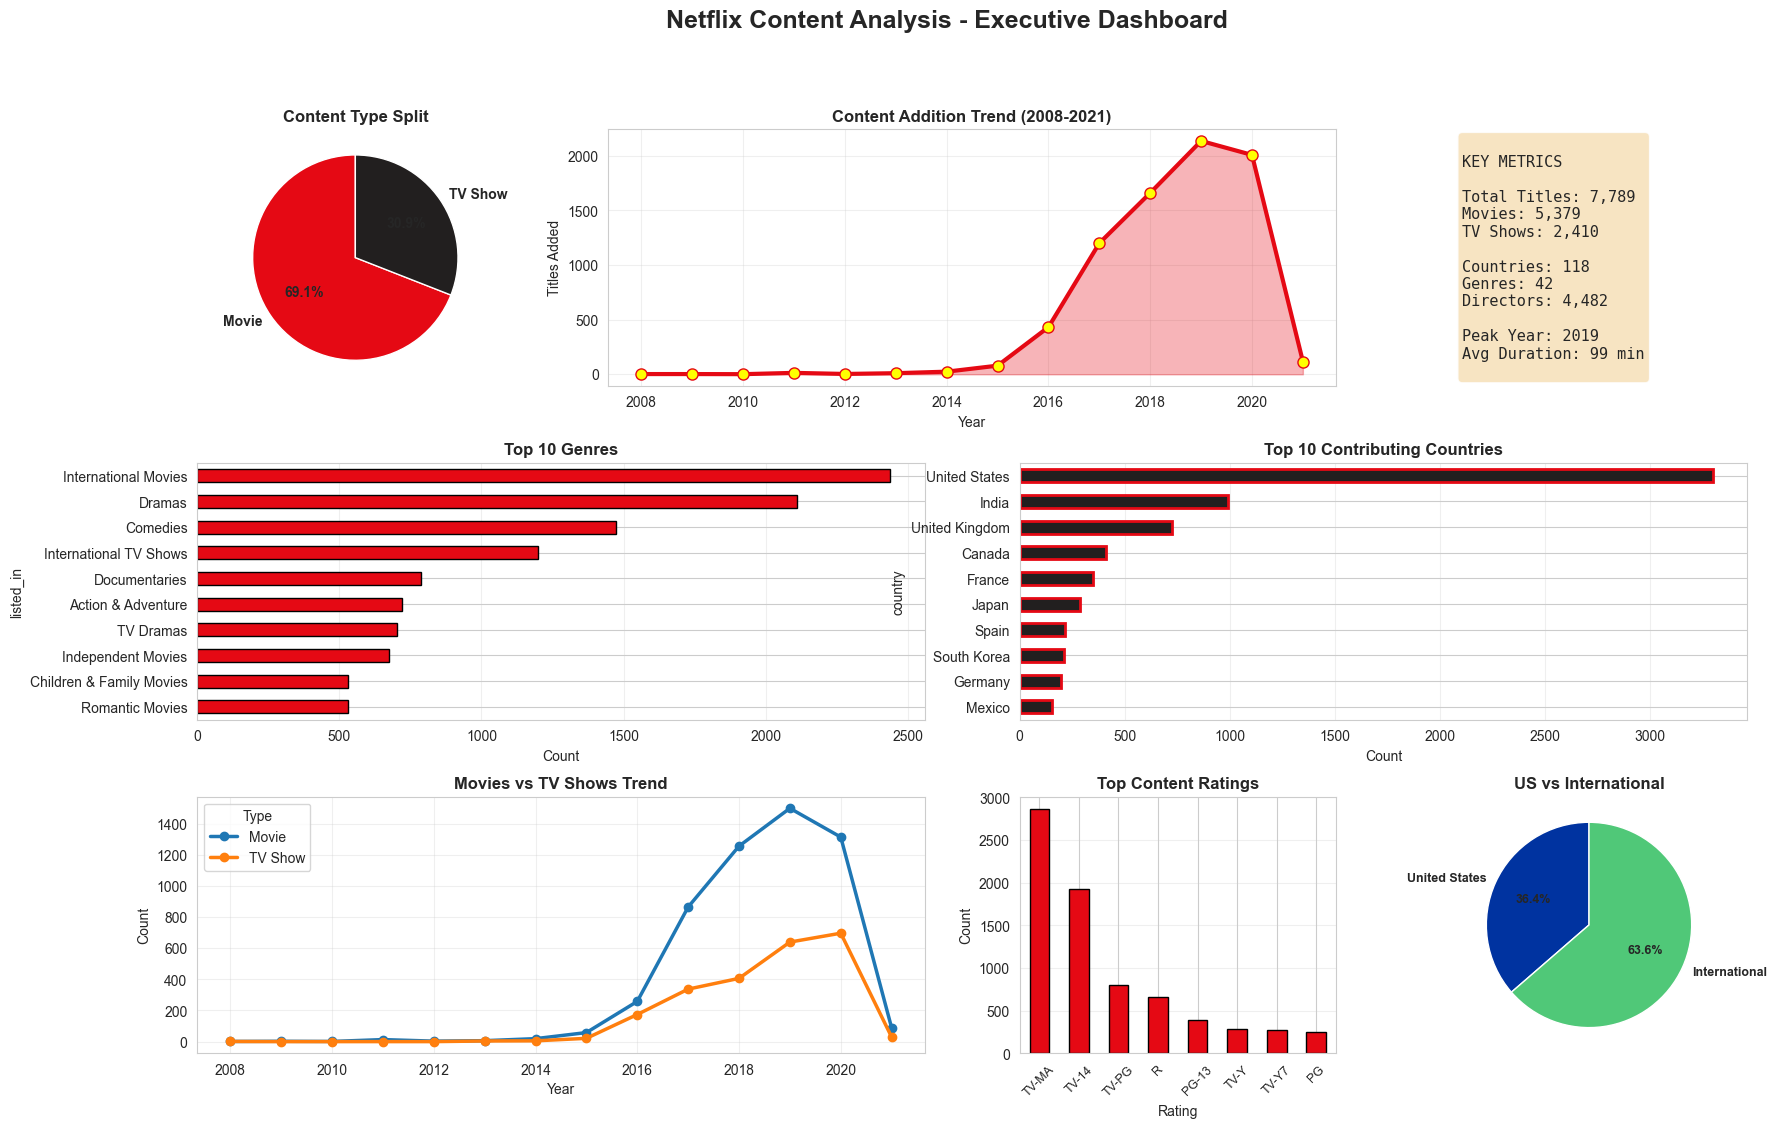

In [186]:
# Create a comprehensive executive dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# 1. Content Type Split
ax1 = fig.add_subplot(gs[0, 0])
content_counts.plot(kind='pie', ax=ax1, autopct='%1.1f%%', colors=['#E50914', '#221F1F'],
                    startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax1.set_title('Content Type Split', fontsize=12, fontweight='bold')
ax1.set_ylabel('')

# 2. Yearly Growth Trend
ax2 = fig.add_subplot(gs[0, 1:3])
ax2.plot(yearly_content.index, yearly_content.values, marker='o', linewidth=3,
         color='#E50914', markersize=8, markerfacecolor='yellow')
ax2.fill_between(yearly_content.index, yearly_content.values, alpha=0.3, color='#E50914')
ax2.set_title('Content Addition Trend (2008-2021)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Titles Added')
ax2.grid(True, alpha=0.3)

# 3. Key Metrics Box
ax3 = fig.add_subplot(gs[0, 3])
ax3.axis('off')
metrics_text = f"""
KEY METRICS

Total Titles: {len(df):,}
Movies: {len(movies_df):,}
TV Shows: {len(tv_shows_df):,}

Countries: {country_counts.shape[0]}
Genres: {genre_counts.shape[0]}
Directors: {director_counts.shape[0]:,}

Peak Year: {int(yearly_content.idxmax())}
Avg Duration: {movies_df['duration_min'].mean():.0f} min
"""
ax3.text(0.1, 0.5, metrics_text, fontsize=11, verticalalignment='center',
         fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 4. Top 10 Genres
ax4 = fig.add_subplot(gs[1, :2])
top_10_genres.plot(kind='barh', ax=ax4, color='#E50914', edgecolor='black')
ax4.set_title('Top 10 Genres', fontsize=12, fontweight='bold')
ax4.set_xlabel('Count')
ax4.invert_yaxis()
ax4.grid(axis='x', alpha=0.3)

# 5. Top 10 Countries
ax5 = fig.add_subplot(gs[1, 2:])
top_10_countries.plot(kind='barh', ax=ax5, color='#221F1F', edgecolor='#E50914', linewidth=2)
ax5.set_title('Top 10 Contributing Countries', fontsize=12, fontweight='bold')
ax5.set_xlabel('Count')
ax5.invert_yaxis()
ax5.grid(axis='x', alpha=0.3)

# 6. Movies vs TV Shows Trend
ax6 = fig.add_subplot(gs[2, :2])
yearly_type.plot(ax=ax6, marker='o', linewidth=2.5)
ax6.set_title('Movies vs TV Shows Trend', fontsize=12, fontweight='bold')
ax6.set_xlabel('Year')
ax6.set_ylabel('Count')
ax6.legend(title='Type')
ax6.grid(True, alpha=0.3)

# 7. Content Ratings
ax7 = fig.add_subplot(gs[2, 2])
rating_counts.head(8).plot(kind='bar', ax=ax7, color='#E50914', edgecolor='black')
ax7.set_title('Top Content Ratings', fontsize=12, fontweight='bold')
ax7.set_xlabel('Rating')
ax7.set_ylabel('Count')
ax7.tick_params(axis='x', rotation=45, labelsize=9)
ax7.grid(axis='y', alpha=0.3)

# 8. US vs International
ax8 = fig.add_subplot(gs[2, 3])
us_count = country_counts.get('United States', 0)
international_count = country_counts.drop('United States', errors='ignore').sum()
us_vs_int = pd.Series([us_count, international_count], index=['United States', 'International'])
us_vs_int.plot(kind='pie', ax=ax8, autopct='%1.1f%%', colors=['#0033A0', '#50C878'],
               textprops={'fontsize': 9, 'fontweight': 'bold'}, startangle=90)
ax8.set_title('US vs International', fontsize=12, fontweight='bold')
ax8.set_ylabel('')

# Add main title
fig.suptitle('Netflix Content Analysis - Executive Dashboard', fontsize=18, fontweight='bold', y=0.98)

plt.show()